In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report
import pandas as pd
import json
import importlib
import math



try:
    from IPython import get_ipython
    if 'IPKernelApp' not in get_ipython().config:  # Not in a notebook
        from tqdm import tqdm
    else:  # In a notebook
        from tqdm.notebook import tqdm
except ImportError:  # IPython is not installed
    from tqdm import tqdm
import utils
from utils import *

# importlib.reload(utils)


# 2. set up for using GPU if available (with printed confirmation)  
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# 3. checking environment 
try:
    from google.colab import drive
    drive.mount('/content/drive')
    IN_COLAB = True
except:
    IN_COLAB = False

Using cuda device


In [2]:
torch.manual_seed(0)

batch_size = 64

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform)

num_validation_samples = 25000
num_train_samples = len(train_data) - num_validation_samples
train_data, val_data = random_split(train_data, [num_train_samples, num_validation_samples])

print(len(train_data)) # 50000 training egs  
print(len(val_data)) # 10000 test egs
print(len(test_data)) # 10000 test egs

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
25000
25000
10000


DR:  0
DR:  0
seed: 1
Epoch [1/50] - Train Loss: 2.1604, Acc: 0.1974 | Val Loss: 1.8985, Acc: 0.3199
Epoch [2/50] - Train Loss: 1.7328, Acc: 0.3725 | Val Loss: 1.5974, Acc: 0.4157
Epoch [3/50] - Train Loss: 1.5301, Acc: 0.4461 | Val Loss: 1.4992, Acc: 0.4593
Epoch [4/50] - Train Loss: 1.4015, Acc: 0.4924 | Val Loss: 1.3656, Acc: 0.5045
Epoch [5/50] - Train Loss: 1.2882, Acc: 0.5380 | Val Loss: 1.2561, Acc: 0.5570
Epoch [6/50] - Train Loss: 1.2033, Acc: 0.5704 | Val Loss: 1.1851, Acc: 0.5814
Epoch [7/50] - Train Loss: 1.1193, Acc: 0.6024 | Val Loss: 1.2262, Acc: 0.5710
Epoch [8/50] - Train Loss: 1.0536, Acc: 0.6243 | Val Loss: 1.1382, Acc: 0.5988
Epoch [9/50] - Train Loss: 0.9872, Acc: 0.6489 | Val Loss: 1.0719, Acc: 0.6273
Epoch [10/50] - Train Loss: 0.9263, Acc: 0.6707 | Val Loss: 1.0583, Acc: 0.6308
Epoch [11/50] - Train Loss: 0.8687, Acc: 0.6882 | Val Loss: 1.0688, Acc: 0.6348
Epoch [12/50] - Train Loss: 0.8229, Acc: 0.7062 | Val Loss: 1.0575, Acc: 0.6325
Epoch [13/50] - Train Loss:

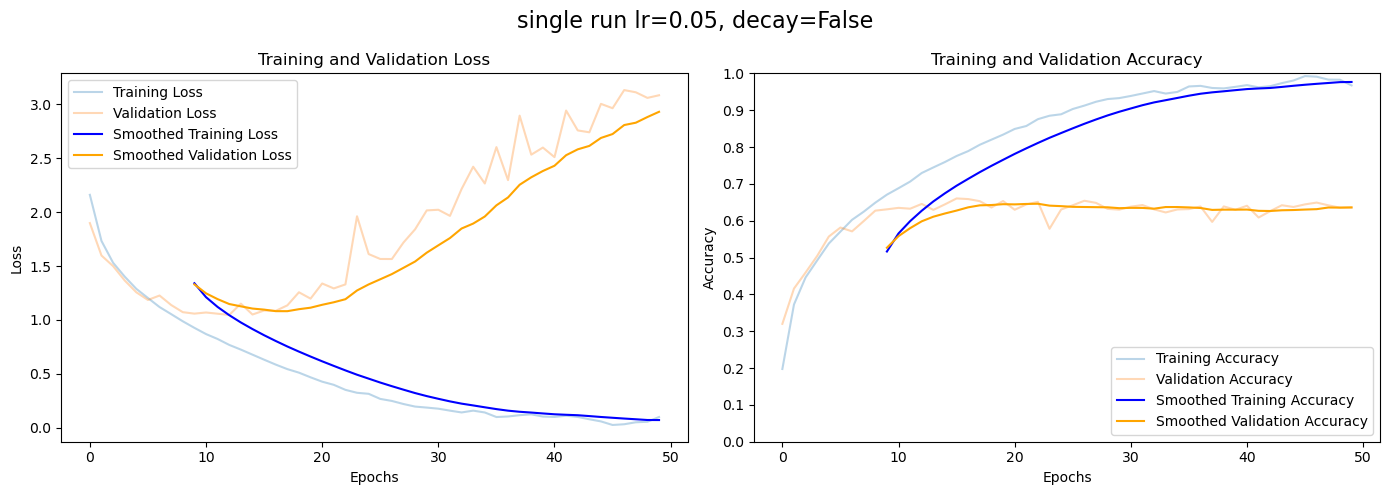

TESTING COMPLETE!!
Test Loss: 3.0576, Test Acc: 0.6328
              precision    recall  f1-score   support

       plane       0.67      0.70      0.68      1000
         car       0.77      0.76      0.76      1000
        bird       0.48      0.55      0.51      1000
         cat       0.49      0.30      0.38      1000
        deer       0.57      0.55      0.56      1000
         dog       0.56      0.53      0.55      1000
        frog       0.62      0.75      0.68      1000
       horse       0.68      0.70      0.69      1000
        ship       0.78      0.75      0.76      1000
       truck       0.68      0.75      0.71      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000

DR:  0
seed: 2
Epoch [1/50] - Train Loss: 2.1432, Acc: 0.2003 | Val Loss: 1.8785, Acc: 0.3190
Epoch [2/50] - Train Loss: 1.7457, Acc: 0.3627 | Val Loss: 1.6232, Acc: 0.4010
Epoch [3/50] 

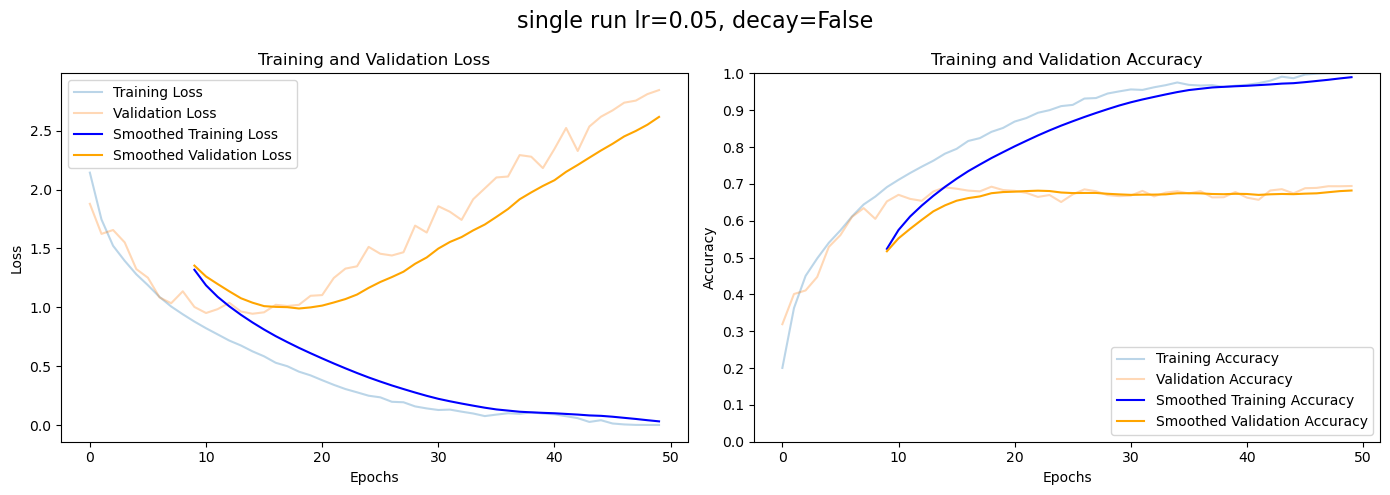

TESTING COMPLETE!!
Test Loss: 2.8621, Test Acc: 0.6920
              precision    recall  f1-score   support

       plane       0.72      0.75      0.74      1000
         car       0.80      0.82      0.81      1000
        bird       0.59      0.58      0.59      1000
         cat       0.47      0.51      0.49      1000
        deer       0.67      0.60      0.63      1000
         dog       0.59      0.58      0.58      1000
        frog       0.75      0.76      0.76      1000
       horse       0.74      0.75      0.74      1000
        ship       0.82      0.80      0.81      1000
       truck       0.77      0.78      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

DR:  0
seed: 3
Epoch [1/50] - Train Loss: 2.1741, Acc: 0.1953 | Val Loss: 1.9162, Acc: 0.3150
Epoch [2/50] - Train Loss: 1.7710, Acc: 0.3566 | Val Loss: 1.6469, Acc: 0.4161
Epoch [3/50] 

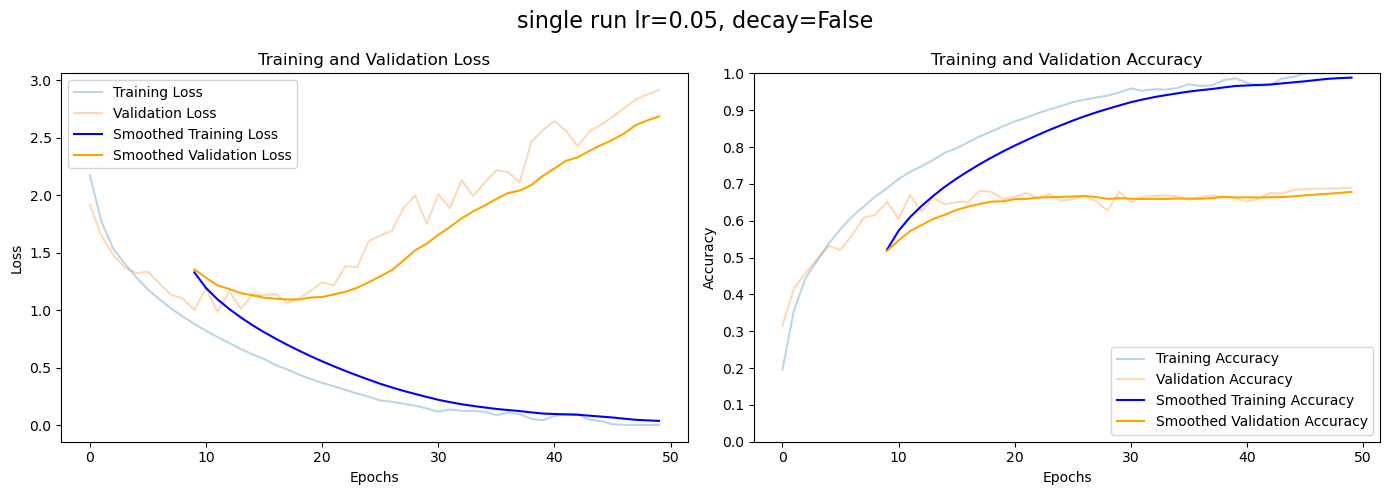

TESTING COMPLETE!!
Test Loss: 2.9159, Test Acc: 0.6887
              precision    recall  f1-score   support

       plane       0.73      0.73      0.73      1000
         car       0.82      0.81      0.81      1000
        bird       0.60      0.58      0.59      1000
         cat       0.50      0.50      0.50      1000
        deer       0.62      0.60      0.61      1000
         dog       0.59      0.59      0.59      1000
        frog       0.74      0.75      0.75      1000
       horse       0.72      0.74      0.73      1000
        ship       0.79      0.81      0.80      1000
       truck       0.76      0.76      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

DR:  0
seed: 4
Epoch [1/50] - Train Loss: 2.1662, Acc: 0.1890 | Val Loss: 1.9500, Acc: 0.2822
Epoch [2/50] - Train Loss: 1.7817, Acc: 0.3510 | Val Loss: 1.5780, Acc: 0.4186
Epoch [3/50] 

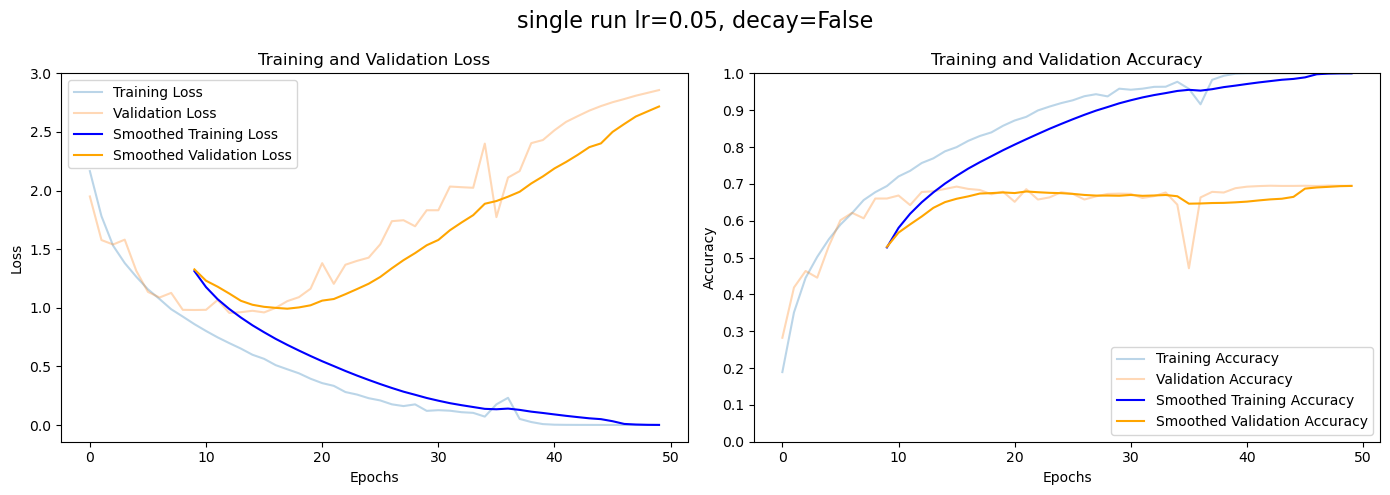

TESTING COMPLETE!!
Test Loss: 2.8588, Test Acc: 0.6868
              precision    recall  f1-score   support

       plane       0.73      0.73      0.73      1000
         car       0.81      0.81      0.81      1000
        bird       0.58      0.57      0.58      1000
         cat       0.49      0.48      0.49      1000
        deer       0.64      0.60      0.62      1000
         dog       0.59      0.60      0.60      1000
        frog       0.72      0.75      0.74      1000
       horse       0.73      0.74      0.74      1000
        ship       0.81      0.81      0.81      1000
       truck       0.76      0.77      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

DR:  0
seed: 5
Epoch [1/50] - Train Loss: 2.0747, Acc: 0.2360 | Val Loss: 1.8113, Acc: 0.3617
Epoch [2/50] - Train Loss: 1.6848, Acc: 0.3836 | Val Loss: 1.5889, Acc: 0.4199
Epoch [3/50] 

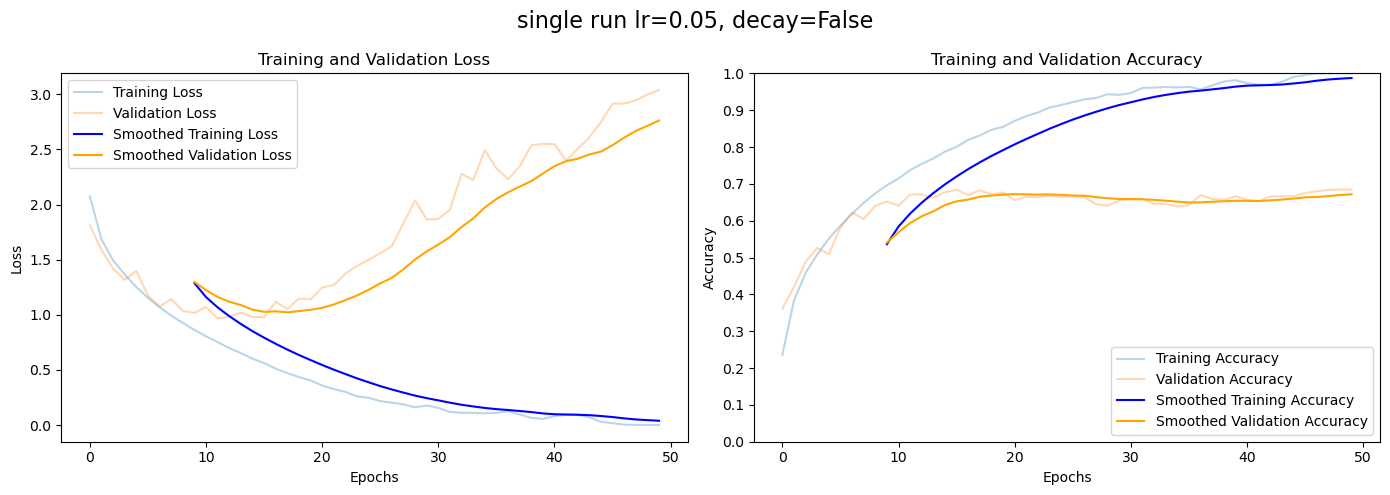

TESTING COMPLETE!!
Test Loss: 3.1064, Test Acc: 0.6724
              precision    recall  f1-score   support

       plane       0.70      0.72      0.71      1000
         car       0.82      0.81      0.81      1000
        bird       0.56      0.56      0.56      1000
         cat       0.47      0.48      0.47      1000
        deer       0.63      0.60      0.61      1000
         dog       0.57      0.55      0.56      1000
        frog       0.72      0.74      0.73      1000
       horse       0.72      0.73      0.72      1000
        ship       0.79      0.78      0.79      1000
       truck       0.75      0.75      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

average for 
DR:  0


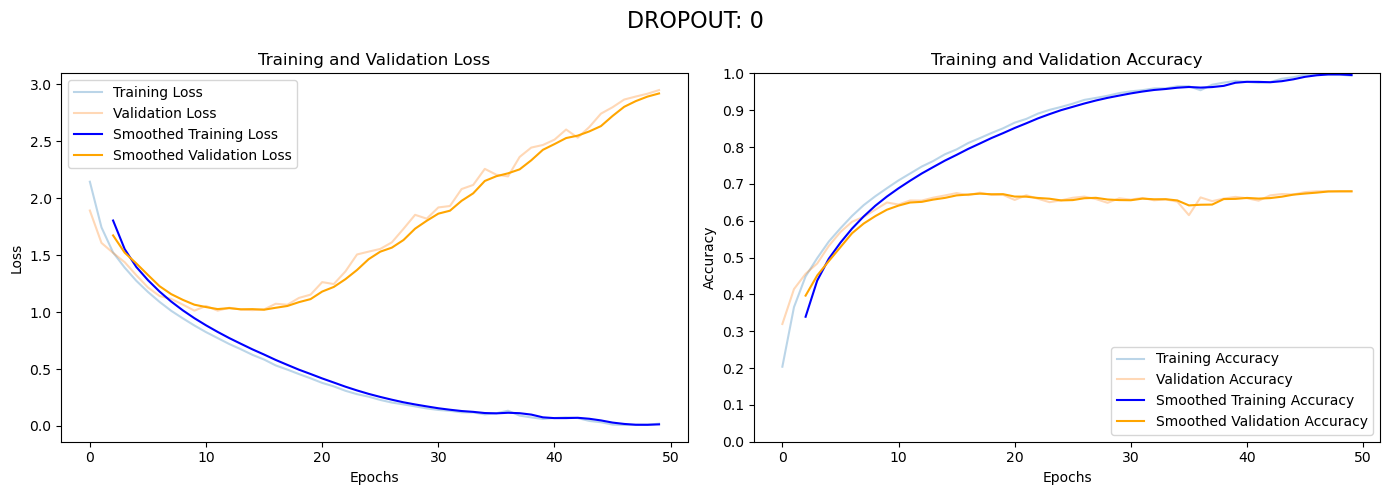

DR:  0.2
DR:  0.2
seed: 1
Epoch [1/50] - Train Loss: 2.1741, Acc: 0.1885 | Val Loss: 1.9279, Acc: 0.3047
Epoch [2/50] - Train Loss: 1.7847, Acc: 0.3502 | Val Loss: 1.6283, Acc: 0.4077
Epoch [3/50] - Train Loss: 1.5892, Acc: 0.4231 | Val Loss: 1.5287, Acc: 0.4484
Epoch [4/50] - Train Loss: 1.4724, Acc: 0.4635 | Val Loss: 1.3795, Acc: 0.4948
Epoch [5/50] - Train Loss: 1.3743, Acc: 0.5046 | Val Loss: 1.2916, Acc: 0.5438
Epoch [6/50] - Train Loss: 1.3010, Acc: 0.5336 | Val Loss: 1.2643, Acc: 0.5452
Epoch [7/50] - Train Loss: 1.2237, Acc: 0.5633 | Val Loss: 1.2270, Acc: 0.5606
Epoch [8/50] - Train Loss: 1.1632, Acc: 0.5838 | Val Loss: 1.1610, Acc: 0.5881
Epoch [9/50] - Train Loss: 1.1020, Acc: 0.6039 | Val Loss: 1.0733, Acc: 0.6224
Epoch [10/50] - Train Loss: 1.0477, Acc: 0.6263 | Val Loss: 1.0823, Acc: 0.6205
Epoch [11/50] - Train Loss: 0.9894, Acc: 0.6428 | Val Loss: 1.1197, Acc: 0.6130
Epoch [12/50] - Train Loss: 0.9473, Acc: 0.6616 | Val Loss: 1.0585, Acc: 0.6259
Epoch [13/50] - Train L

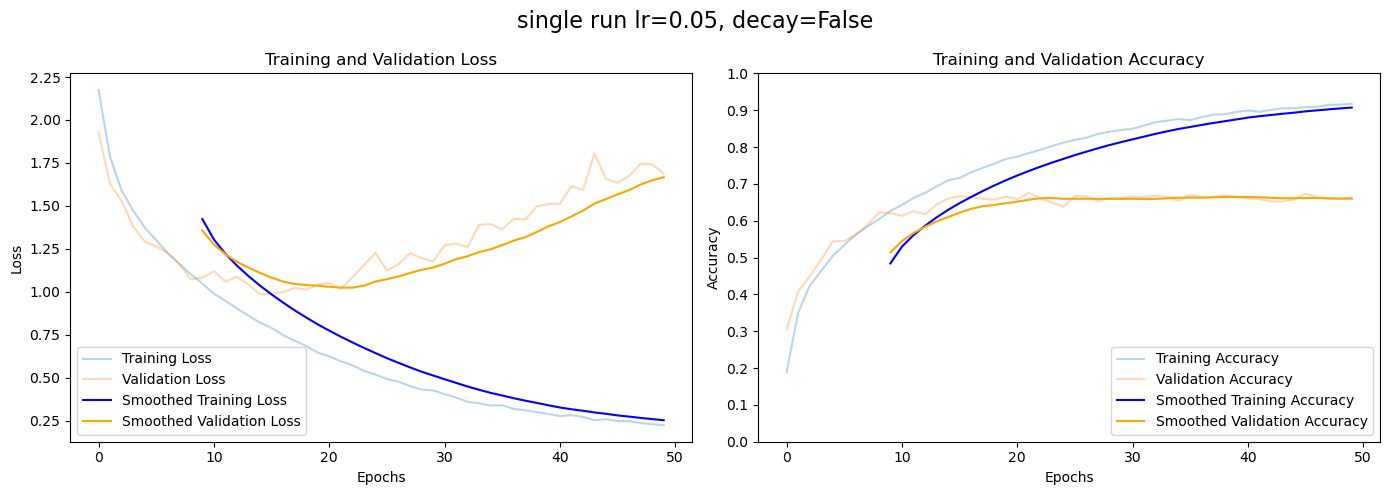

TESTING COMPLETE!!
Test Loss: 1.7616, Test Acc: 0.6515
              precision    recall  f1-score   support

       plane       0.67      0.74      0.70      1000
         car       0.74      0.81      0.77      1000
        bird       0.60      0.43      0.50      1000
         cat       0.49      0.43      0.46      1000
        deer       0.50      0.68      0.58      1000
         dog       0.55      0.54      0.55      1000
        frog       0.72      0.73      0.72      1000
       horse       0.70      0.70      0.70      1000
        ship       0.82      0.73      0.77      1000
       truck       0.74      0.72      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000

DR:  0.2
seed: 2
Epoch [1/50] - Train Loss: 2.1567, Acc: 0.1925 | Val Loss: 1.9052, Acc: 0.3118
Epoch [2/50] - Train Loss: 1.7957, Acc: 0.3377 | Val Loss: 1.6400, Acc: 0.3929
Epoch [3/50

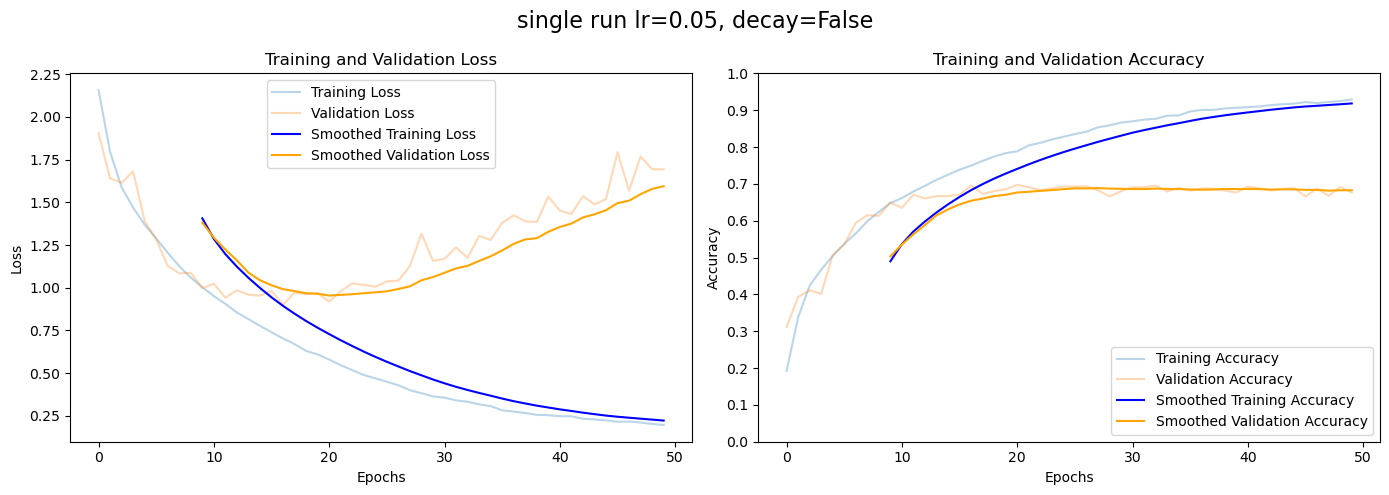

TESTING COMPLETE!!
Test Loss: 1.6713, Test Acc: 0.6796
              precision    recall  f1-score   support

       plane       0.80      0.61      0.69      1000
         car       0.78      0.83      0.80      1000
        bird       0.57      0.57      0.57      1000
         cat       0.48      0.48      0.48      1000
        deer       0.59      0.67      0.63      1000
         dog       0.60      0.56      0.58      1000
        frog       0.78      0.71      0.74      1000
       horse       0.68      0.78      0.73      1000
        ship       0.75      0.84      0.79      1000
       truck       0.78      0.75      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

DR:  0.2
seed: 3
Epoch [1/50] - Train Loss: 2.1889, Acc: 0.1889 | Val Loss: 1.9213, Acc: 0.3190
Epoch [2/50] - Train Loss: 1.8233, Acc: 0.3354 | Val Loss: 1.6756, Acc: 0.4044
Epoch [3/50

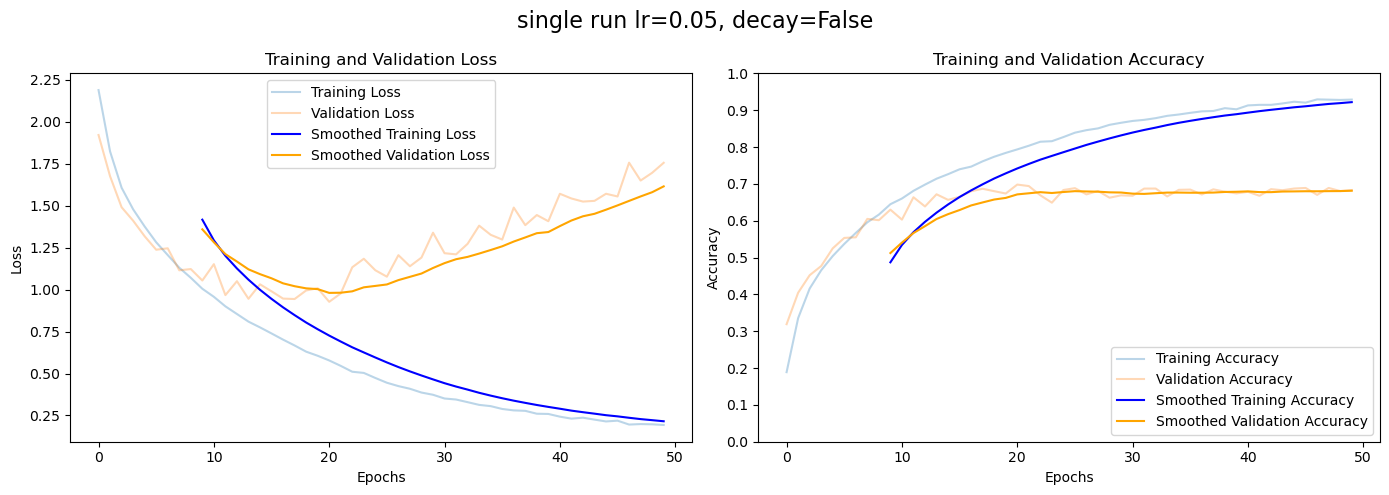

TESTING COMPLETE!!
Test Loss: 1.7226, Test Acc: 0.6891
              precision    recall  f1-score   support

       plane       0.75      0.76      0.76      1000
         car       0.82      0.79      0.81      1000
        bird       0.63      0.52      0.57      1000
         cat       0.49      0.51      0.50      1000
        deer       0.63      0.63      0.63      1000
         dog       0.57      0.62      0.60      1000
        frog       0.74      0.75      0.75      1000
       horse       0.67      0.78      0.72      1000
        ship       0.87      0.75      0.80      1000
       truck       0.75      0.77      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

DR:  0.2
seed: 4
Epoch [1/50] - Train Loss: 2.1739, Acc: 0.1853 | Val Loss: 1.9505, Acc: 0.2870
Epoch [2/50] - Train Loss: 1.8303, Acc: 0.3321 | Val Loss: 1.6255, Acc: 0.4067
Epoch [3/50

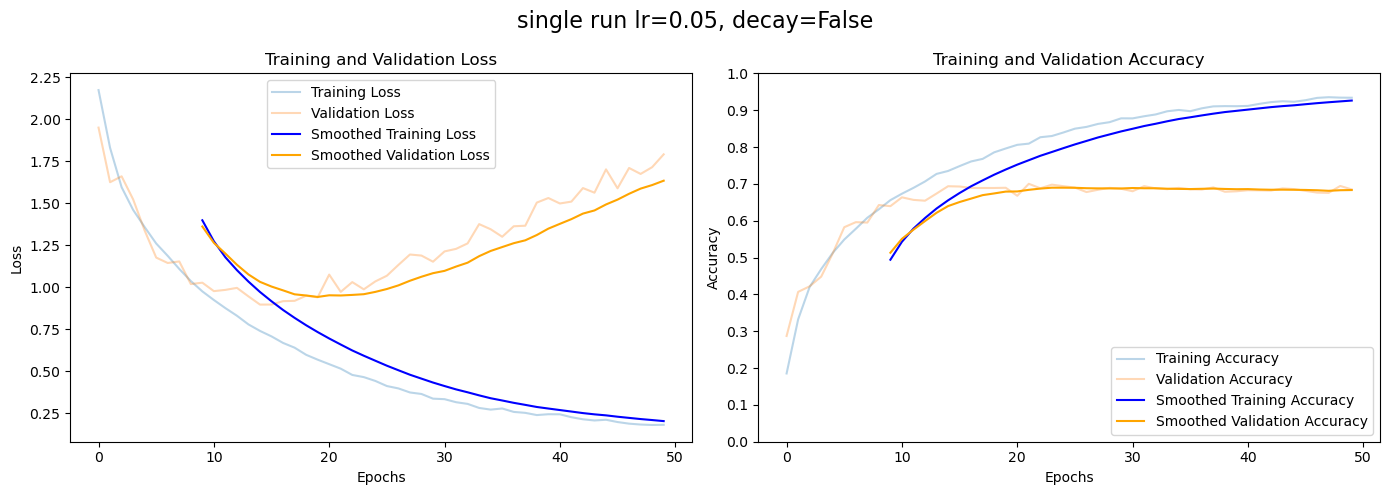

TESTING COMPLETE!!
Test Loss: 1.8367, Test Acc: 0.6779
              precision    recall  f1-score   support

       plane       0.72      0.68      0.70      1000
         car       0.82      0.78      0.80      1000
        bird       0.56      0.60      0.58      1000
         cat       0.47      0.55      0.50      1000
        deer       0.63      0.58      0.61      1000
         dog       0.60      0.58      0.59      1000
        frog       0.74      0.73      0.74      1000
       horse       0.73      0.74      0.73      1000
        ship       0.81      0.78      0.79      1000
       truck       0.75      0.76      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

DR:  0.2
seed: 5
Epoch [1/50] - Train Loss: 2.0965, Acc: 0.2258 | Val Loss: 1.8457, Acc: 0.3512
Epoch [2/50] - Train Loss: 1.7366, Acc: 0.3596 | Val Loss: 1.6158, Acc: 0.4080
Epoch [3/50

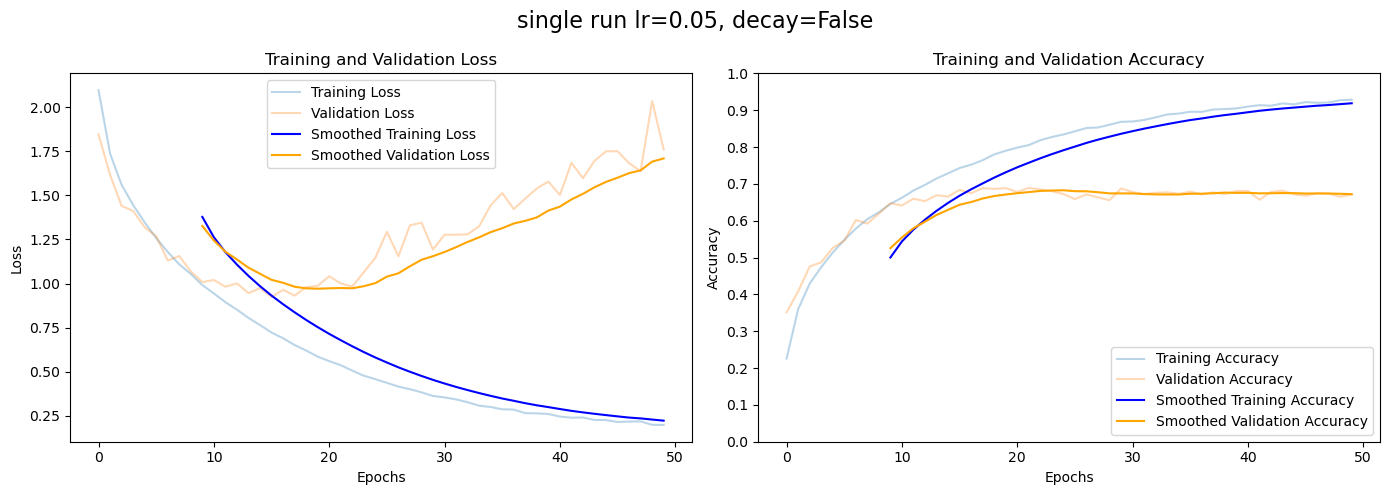

TESTING COMPLETE!!
Test Loss: 1.7506, Test Acc: 0.6690
              precision    recall  f1-score   support

       plane       0.70      0.73      0.72      1000
         car       0.75      0.86      0.80      1000
        bird       0.61      0.50      0.55      1000
         cat       0.48      0.46      0.47      1000
        deer       0.65      0.57      0.61      1000
         dog       0.49      0.66      0.56      1000
        frog       0.73      0.73      0.73      1000
       horse       0.77      0.65      0.70      1000
        ship       0.82      0.78      0.80      1000
       truck       0.75      0.75      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

average for 
DR:  0.2


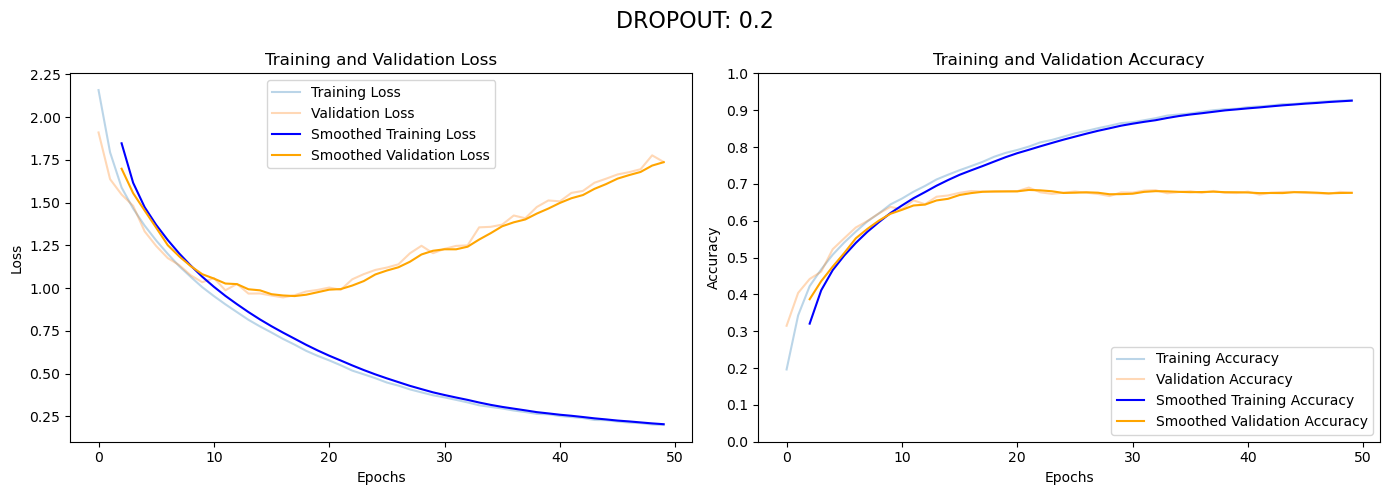

DR:  0.4
DR:  0.4
seed: 1
Epoch [1/50] - Train Loss: 2.1904, Acc: 0.1808 | Val Loss: 1.9464, Acc: 0.3013
Epoch [2/50] - Train Loss: 1.8333, Acc: 0.3300 | Val Loss: 1.6574, Acc: 0.4021
Epoch [3/50] - Train Loss: 1.6541, Acc: 0.3961 | Val Loss: 1.5589, Acc: 0.4413
Epoch [4/50] - Train Loss: 1.5466, Acc: 0.4351 | Val Loss: 1.4043, Acc: 0.4839
Epoch [5/50] - Train Loss: 1.4577, Acc: 0.4712 | Val Loss: 1.3275, Acc: 0.5235
Epoch [6/50] - Train Loss: 1.3902, Acc: 0.4996 | Val Loss: 1.2844, Acc: 0.5402
Epoch [7/50] - Train Loss: 1.3212, Acc: 0.5229 | Val Loss: 1.2512, Acc: 0.5504
Epoch [8/50] - Train Loss: 1.2639, Acc: 0.5440 | Val Loss: 1.2079, Acc: 0.5683
Epoch [9/50] - Train Loss: 1.2021, Acc: 0.5703 | Val Loss: 1.1577, Acc: 0.5834
Epoch [10/50] - Train Loss: 1.1539, Acc: 0.5883 | Val Loss: 1.1153, Acc: 0.6078
Epoch [11/50] - Train Loss: 1.0965, Acc: 0.6059 | Val Loss: 1.1628, Acc: 0.5970
Epoch [12/50] - Train Loss: 1.0519, Acc: 0.6253 | Val Loss: 1.1110, Acc: 0.6083
Epoch [13/50] - Train L

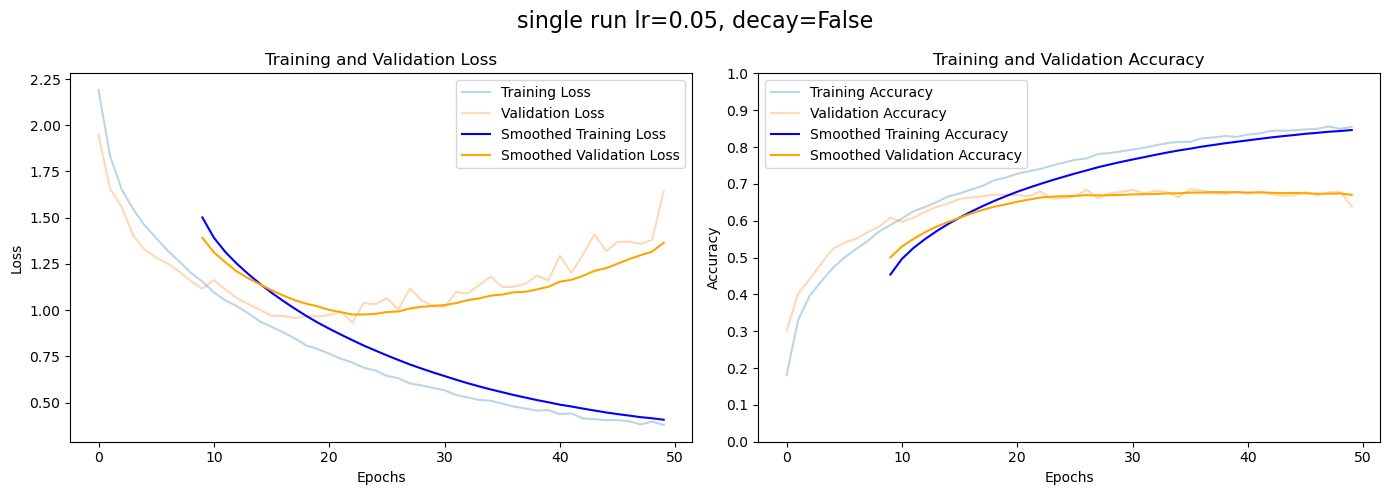

TESTING COMPLETE!!
Test Loss: 1.6527, Test Acc: 0.6414
              precision    recall  f1-score   support

       plane       0.76      0.65      0.70      1000
         car       0.92      0.53      0.67      1000
        bird       0.60      0.46      0.52      1000
         cat       0.51      0.44      0.47      1000
        deer       0.49      0.75      0.59      1000
         dog       0.56      0.56      0.56      1000
        frog       0.62      0.83      0.71      1000
       horse       0.70      0.72      0.71      1000
        ship       0.87      0.70      0.78      1000
       truck       0.64      0.77      0.70      1000

    accuracy                           0.64     10000
   macro avg       0.67      0.64      0.64     10000
weighted avg       0.67      0.64      0.64     10000

DR:  0.4
seed: 2
Epoch [1/50] - Train Loss: 2.1728, Acc: 0.1845 | Val Loss: 1.9428, Acc: 0.3002
Epoch [2/50] - Train Loss: 1.8565, Acc: 0.3179 | Val Loss: 1.7016, Acc: 0.3738
Epoch [3/50

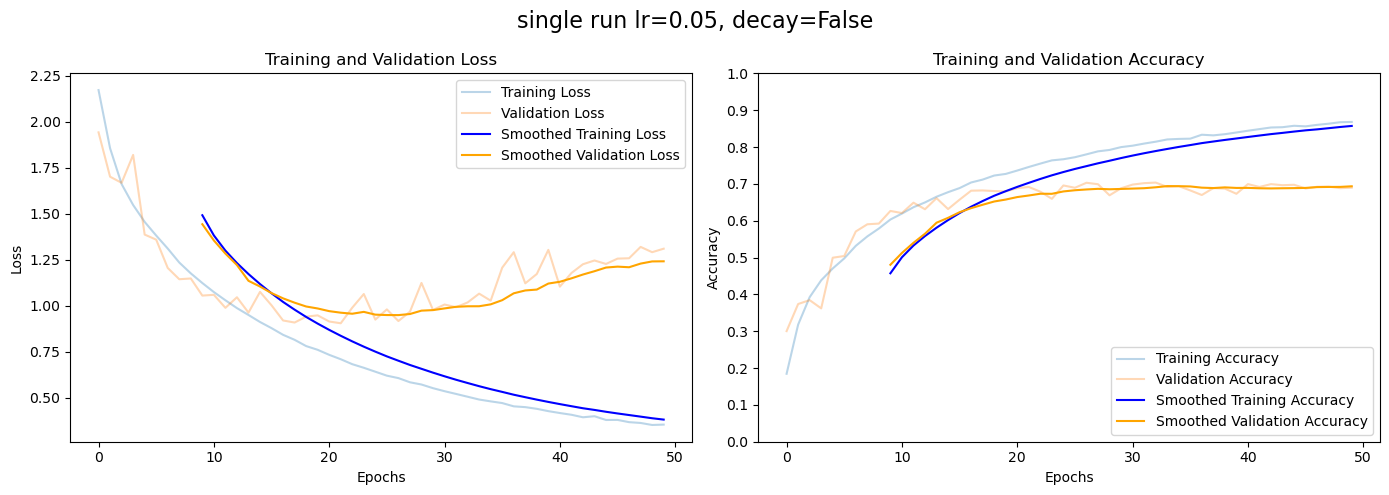

TESTING COMPLETE!!
Test Loss: 1.3295, Test Acc: 0.6833
              precision    recall  f1-score   support

       plane       0.78      0.64      0.70      1000
         car       0.82      0.81      0.81      1000
        bird       0.63      0.55      0.58      1000
         cat       0.42      0.60      0.50      1000
        deer       0.71      0.52      0.60      1000
         dog       0.58      0.58      0.58      1000
        frog       0.75      0.77      0.76      1000
       horse       0.75      0.74      0.75      1000
        ship       0.79      0.81      0.80      1000
       truck       0.72      0.82      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000

DR:  0.4
seed: 3
Epoch [1/50] - Train Loss: 2.2075, Acc: 0.1788 | Val Loss: 1.9457, Acc: 0.3107
Epoch [2/50] - Train Loss: 1.8806, Acc: 0.3093 | Val Loss: 1.7182, Acc: 0.3966
Epoch [3/50

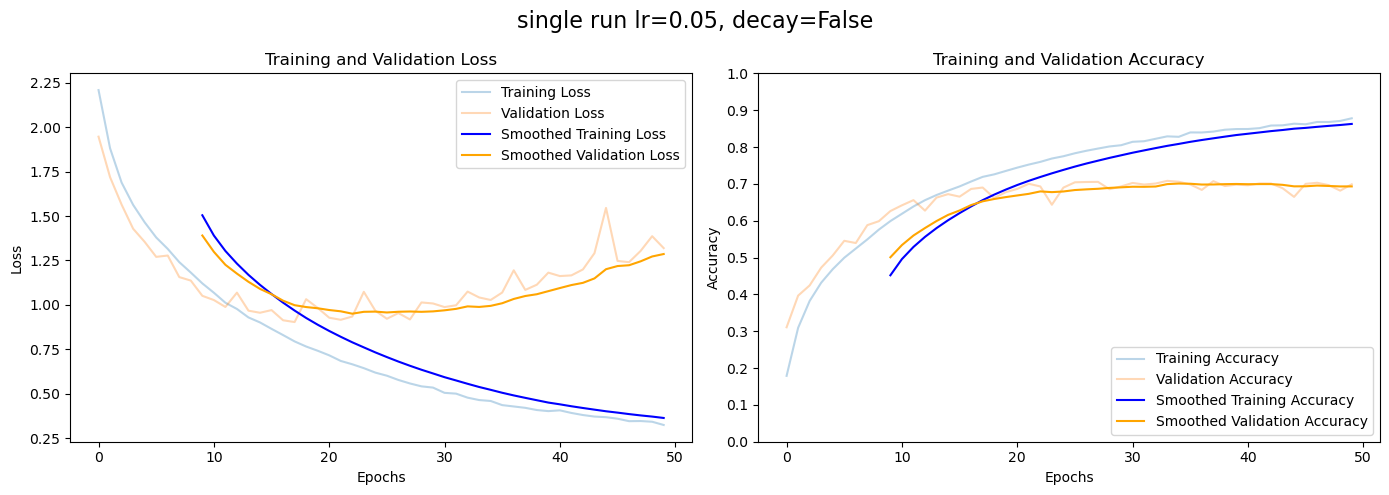

TESTING COMPLETE!!
Test Loss: 1.3298, Test Acc: 0.6915
              precision    recall  f1-score   support

       plane       0.73      0.73      0.73      1000
         car       0.84      0.80      0.82      1000
        bird       0.69      0.48      0.57      1000
         cat       0.45      0.60      0.51      1000
        deer       0.70      0.56      0.62      1000
         dog       0.61      0.56      0.58      1000
        frog       0.77      0.74      0.76      1000
       horse       0.69      0.80      0.74      1000
        ship       0.77      0.83      0.80      1000
       truck       0.74      0.81      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

DR:  0.4
seed: 4
Epoch [1/50] - Train Loss: 2.1920, Acc: 0.1767 | Val Loss: 1.9769, Acc: 0.2761
Epoch [2/50] - Train Loss: 1.8825, Acc: 0.3052 | Val Loss: 1.6940, Acc: 0.3869
Epoch [3/50

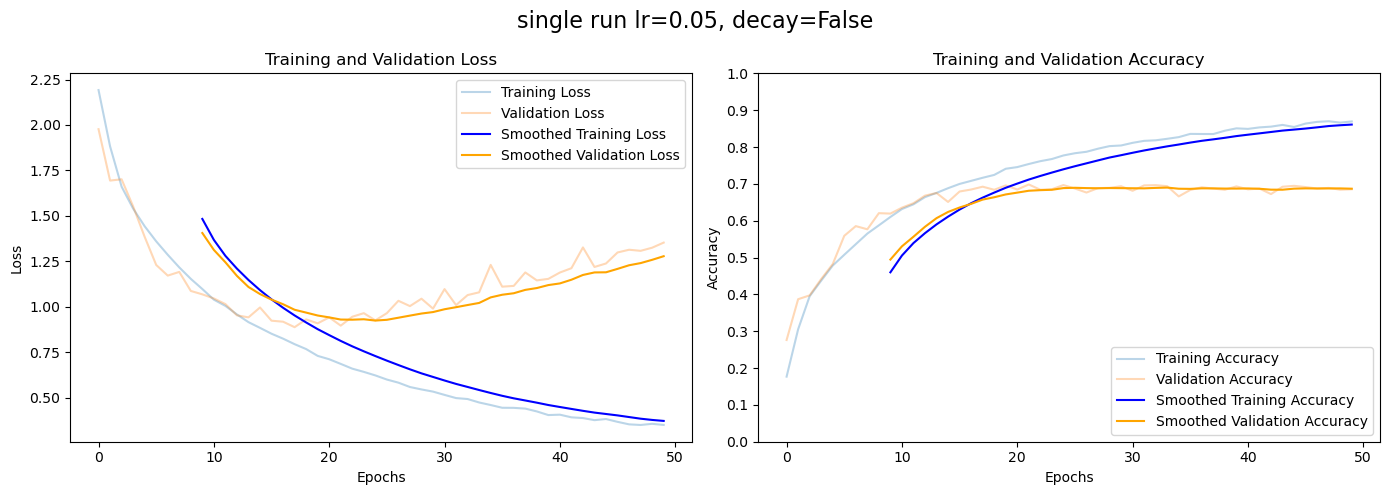

TESTING COMPLETE!!
Test Loss: 1.3491, Test Acc: 0.6921
              precision    recall  f1-score   support

       plane       0.66      0.80      0.72      1000
         car       0.83      0.84      0.84      1000
        bird       0.53      0.64      0.58      1000
         cat       0.50      0.50      0.50      1000
        deer       0.66      0.60      0.63      1000
         dog       0.58      0.59      0.59      1000
        frog       0.75      0.78      0.77      1000
       horse       0.79      0.69      0.74      1000
        ship       0.84      0.79      0.81      1000
       truck       0.87      0.70      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

DR:  0.4
seed: 5
Epoch [1/50] - Train Loss: 2.1208, Acc: 0.2149 | Val Loss: 1.8805, Acc: 0.3397
Epoch [2/50] - Train Loss: 1.7898, Acc: 0.3372 | Val Loss: 1.6574, Acc: 0.3944
Epoch [3/50

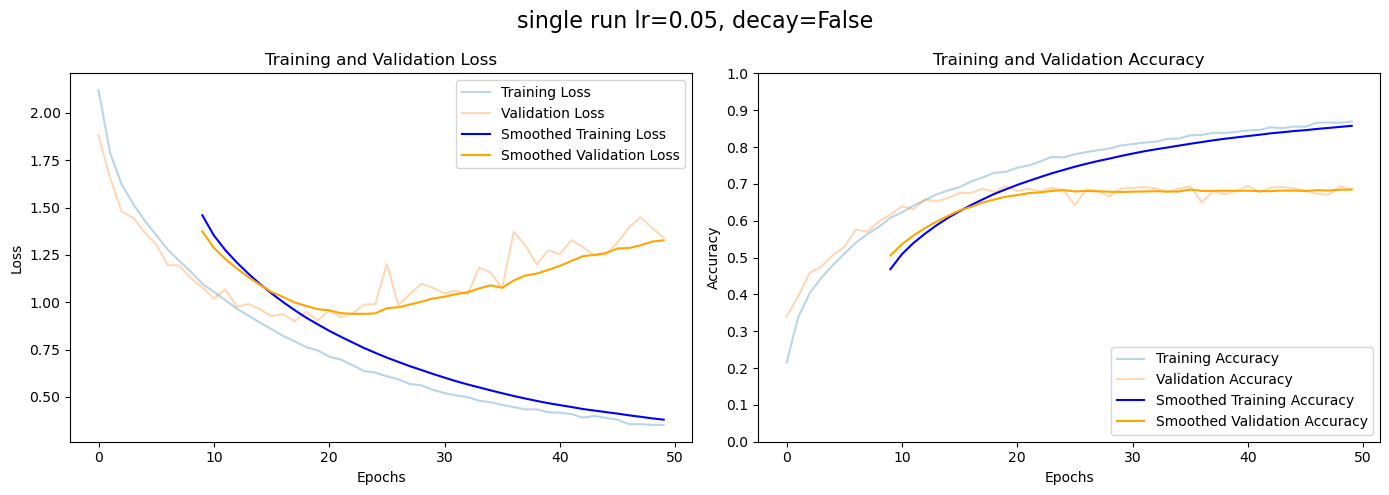

TESTING COMPLETE!!
Test Loss: 1.3526, Test Acc: 0.6827
              precision    recall  f1-score   support

       plane       0.72      0.75      0.74      1000
         car       0.84      0.75      0.79      1000
        bird       0.62      0.51      0.56      1000
         cat       0.50      0.52      0.51      1000
        deer       0.63      0.61      0.62      1000
         dog       0.54      0.64      0.58      1000
        frog       0.78      0.70      0.74      1000
       horse       0.69      0.78      0.73      1000
        ship       0.79      0.83      0.81      1000
       truck       0.76      0.74      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

average for 
DR:  0.4


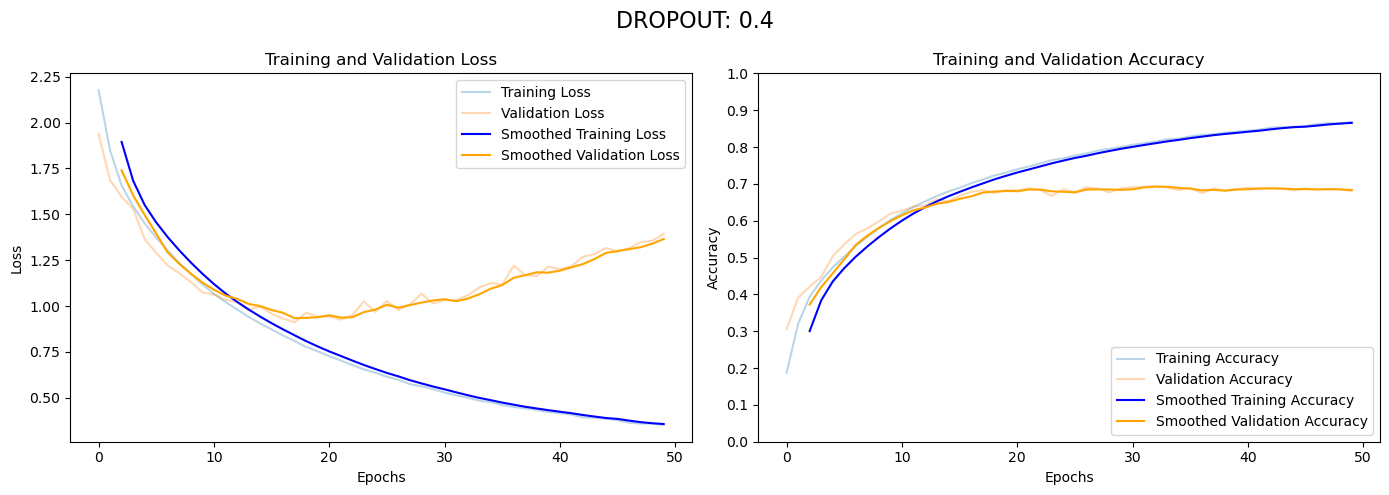

DR:  0.6
DR:  0.6
seed: 1
Epoch [1/50] - Train Loss: 2.2132, Acc: 0.1643 | Val Loss: 1.9839, Acc: 0.2891
Epoch [2/50] - Train Loss: 1.8944, Acc: 0.3005 | Val Loss: 1.7035, Acc: 0.3902
Epoch [3/50] - Train Loss: 1.7367, Acc: 0.3652 | Val Loss: 1.5814, Acc: 0.4348
Epoch [4/50] - Train Loss: 1.6394, Acc: 0.3968 | Val Loss: 1.4779, Acc: 0.4636
Epoch [5/50] - Train Loss: 1.5570, Acc: 0.4296 | Val Loss: 1.3861, Acc: 0.5024
Epoch [6/50] - Train Loss: 1.5023, Acc: 0.4546 | Val Loss: 1.3478, Acc: 0.5164
Epoch [7/50] - Train Loss: 1.4480, Acc: 0.4742 | Val Loss: 1.3095, Acc: 0.5286
Epoch [8/50] - Train Loss: 1.4013, Acc: 0.4883 | Val Loss: 1.3227, Acc: 0.5219
Epoch [9/50] - Train Loss: 1.3423, Acc: 0.5190 | Val Loss: 1.2224, Acc: 0.5578
Epoch [10/50] - Train Loss: 1.2985, Acc: 0.5329 | Val Loss: 1.2120, Acc: 0.5756
Epoch [11/50] - Train Loss: 1.2565, Acc: 0.5477 | Val Loss: 1.3508, Acc: 0.5480
Epoch [12/50] - Train Loss: 1.2071, Acc: 0.5683 | Val Loss: 1.1988, Acc: 0.5710
Epoch [13/50] - Train L

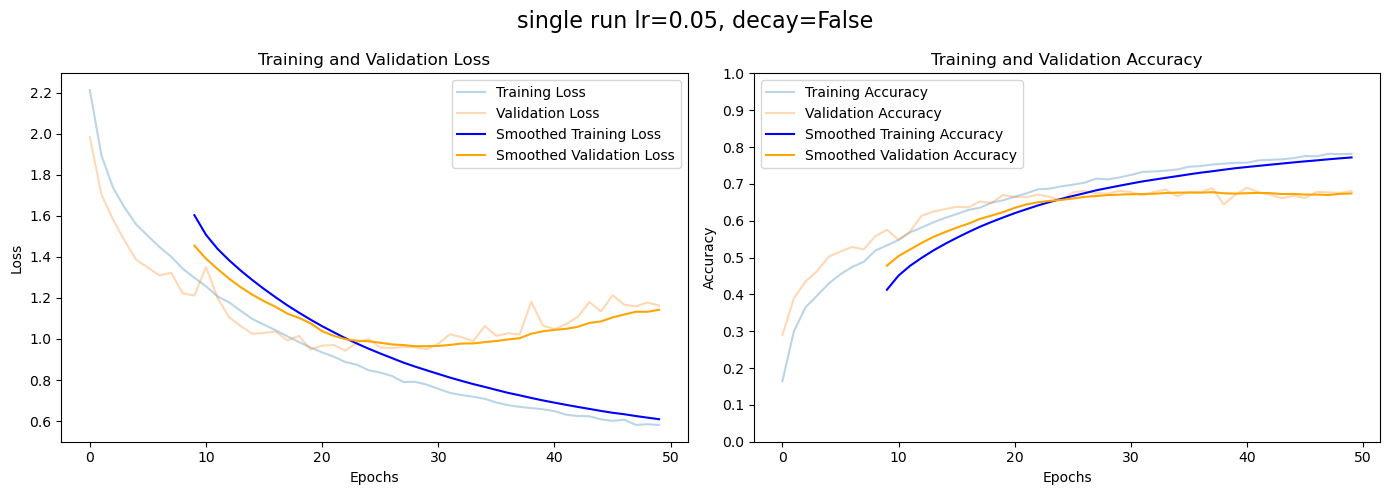

TESTING COMPLETE!!
Test Loss: 1.1755, Test Acc: 0.6831
              precision    recall  f1-score   support

       plane       0.74      0.69      0.71      1000
         car       0.85      0.80      0.82      1000
        bird       0.60      0.52      0.56      1000
         cat       0.53      0.45      0.49      1000
        deer       0.56      0.66      0.61      1000
         dog       0.57      0.58      0.57      1000
        frog       0.66      0.83      0.74      1000
       horse       0.76      0.71      0.73      1000
        ship       0.76      0.86      0.80      1000
       truck       0.81      0.75      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

DR:  0.6
seed: 2
Epoch [1/50] - Train Loss: 2.1947, Acc: 0.1728 | Val Loss: 1.9539, Acc: 0.3039
Epoch [2/50] - Train Loss: 1.9262, Acc: 0.2852 | Val Loss: 1.7274, Acc: 0.3670
Epoch [3/50

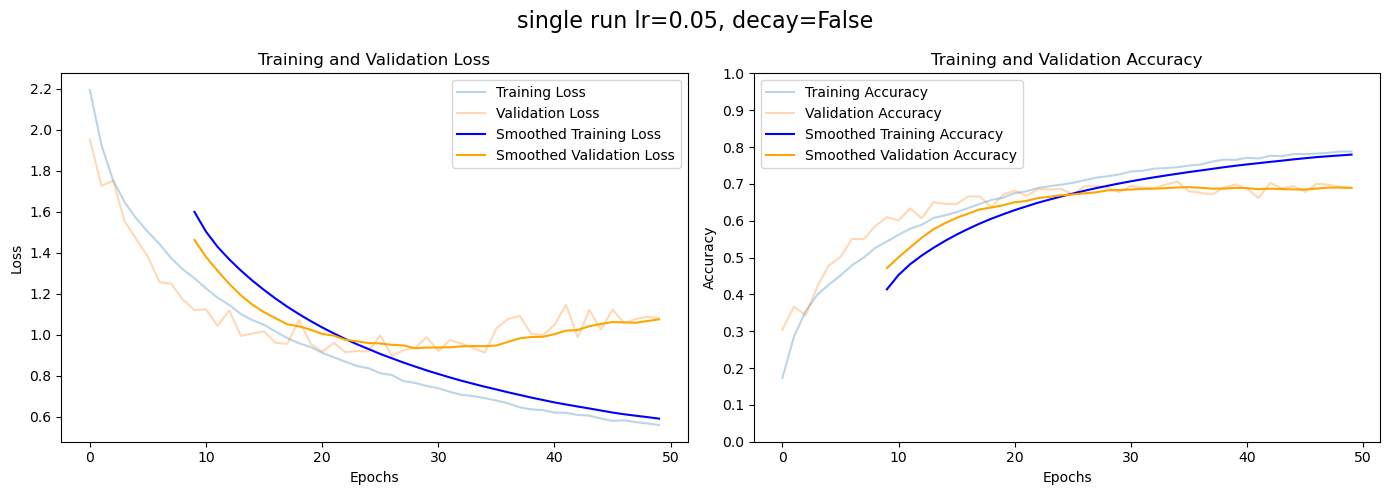

TESTING COMPLETE!!
Test Loss: 1.1041, Test Acc: 0.6853
              precision    recall  f1-score   support

       plane       0.75      0.69      0.72      1000
         car       0.81      0.86      0.83      1000
        bird       0.55      0.58      0.57      1000
         cat       0.46      0.53      0.49      1000
        deer       0.65      0.62      0.63      1000
         dog       0.57      0.58      0.58      1000
        frog       0.71      0.78      0.74      1000
       horse       0.73      0.75      0.74      1000
        ship       0.84      0.77      0.80      1000
       truck       0.84      0.71      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

DR:  0.6
seed: 3
Epoch [1/50] - Train Loss: 2.2289, Acc: 0.1681 | Val Loss: 1.9983, Acc: 0.3001
Epoch [2/50] - Train Loss: 1.9389, Acc: 0.2785 | Val Loss: 1.7625, Acc: 0.3786
Epoch [3/50

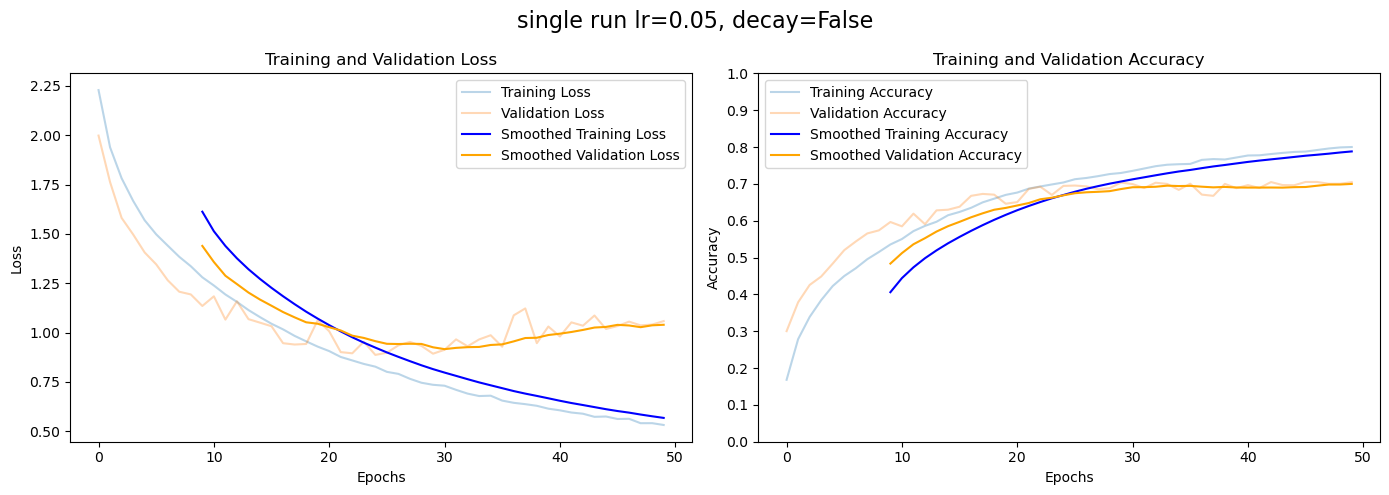

TESTING COMPLETE!!
Test Loss: 1.0638, Test Acc: 0.6951
              precision    recall  f1-score   support

       plane       0.70      0.77      0.73      1000
         car       0.80      0.84      0.82      1000
        bird       0.62      0.54      0.57      1000
         cat       0.48      0.54      0.51      1000
        deer       0.65      0.63      0.64      1000
         dog       0.61      0.60      0.60      1000
        frog       0.71      0.79      0.75      1000
       horse       0.76      0.74      0.75      1000
        ship       0.85      0.73      0.79      1000
       truck       0.79      0.77      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

DR:  0.6
seed: 4
Epoch [1/50] - Train Loss: 2.2158, Acc: 0.1616 | Val Loss: 2.0048, Acc: 0.2726
Epoch [2/50] - Train Loss: 1.9507, Acc: 0.2755 | Val Loss: 1.7385, Acc: 0.3626
Epoch [3/50

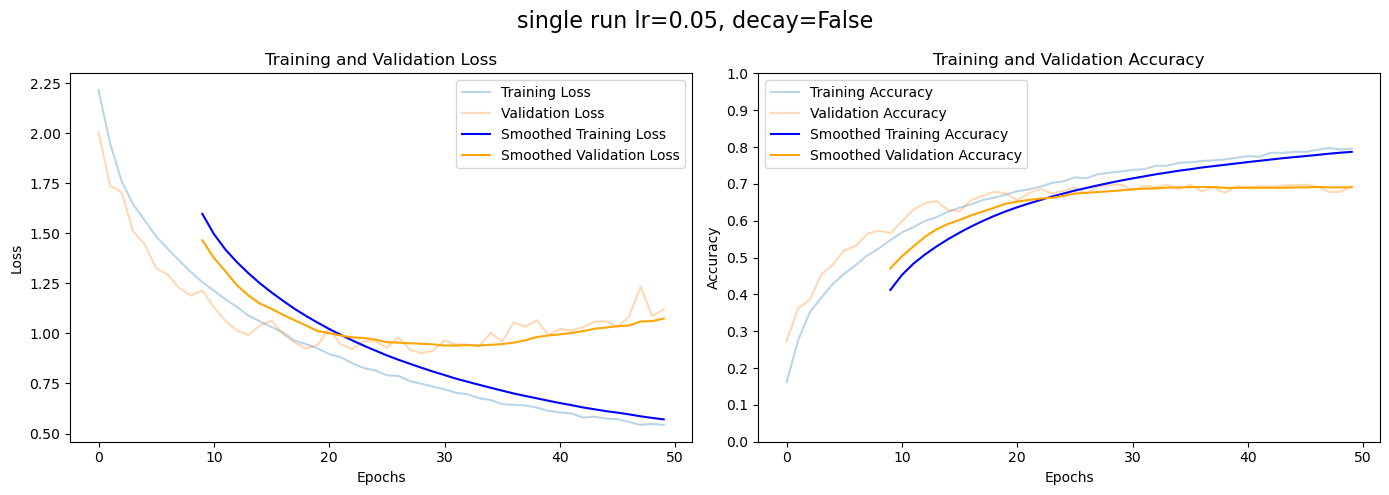

TESTING COMPLETE!!
Test Loss: 1.1184, Test Acc: 0.6955
              precision    recall  f1-score   support

       plane       0.71      0.76      0.73      1000
         car       0.83      0.81      0.82      1000
        bird       0.62      0.54      0.58      1000
         cat       0.53      0.46      0.49      1000
        deer       0.67      0.58      0.62      1000
         dog       0.53      0.69      0.60      1000
        frog       0.72      0.80      0.76      1000
       horse       0.72      0.73      0.73      1000
        ship       0.83      0.80      0.81      1000
       truck       0.80      0.77      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

DR:  0.6
seed: 5
Epoch [1/50] - Train Loss: 2.1515, Acc: 0.1958 | Val Loss: 1.9498, Acc: 0.3084
Epoch [2/50] - Train Loss: 1.8639, Acc: 0.3039 | Val Loss: 1.7167, Acc: 0.3756
Epoch [3/50

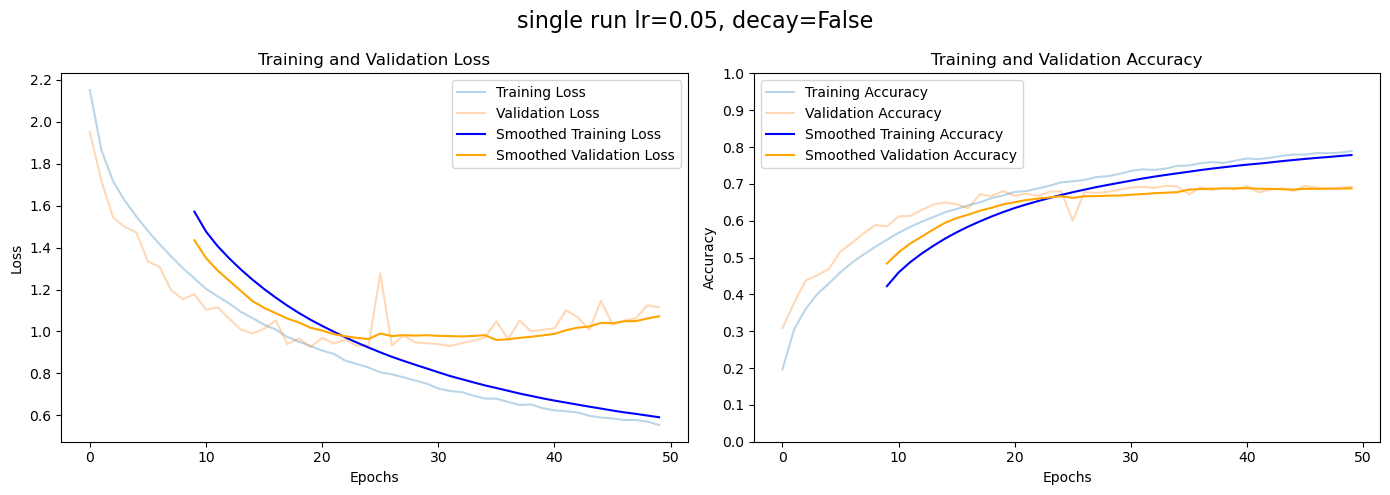

TESTING COMPLETE!!
Test Loss: 1.1499, Test Acc: 0.6876
              precision    recall  f1-score   support

       plane       0.73      0.75      0.74      1000
         car       0.78      0.85      0.81      1000
        bird       0.68      0.45      0.54      1000
         cat       0.46      0.53      0.49      1000
        deer       0.61      0.62      0.62      1000
         dog       0.53      0.65      0.59      1000
        frog       0.75      0.75      0.75      1000
       horse       0.75      0.75      0.75      1000
        ship       0.88      0.77      0.82      1000
       truck       0.79      0.74      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

average for 
DR:  0.6


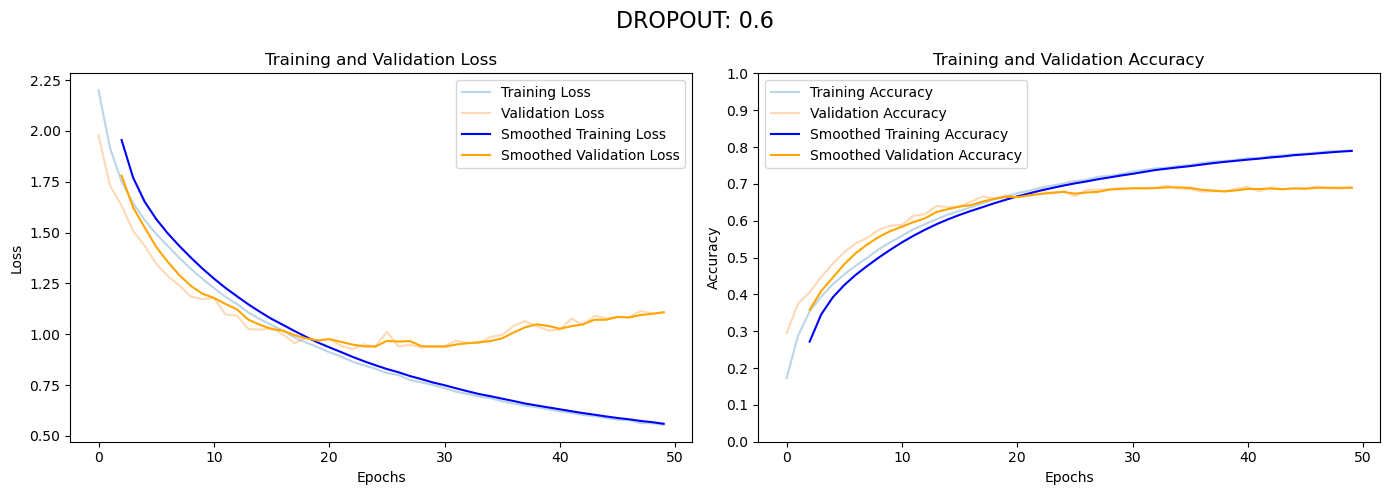

DR:  0.8
DR:  0.8
seed: 1
Epoch [1/50] - Train Loss: 2.2434, Acc: 0.1478 | Val Loss: 2.0623, Acc: 0.2535
Epoch [2/50] - Train Loss: 2.0071, Acc: 0.2426 | Val Loss: 1.8006, Acc: 0.3544
Epoch [3/50] - Train Loss: 1.8924, Acc: 0.2805 | Val Loss: 1.7030, Acc: 0.4009
Epoch [4/50] - Train Loss: 1.8069, Acc: 0.3070 | Val Loss: 1.6396, Acc: 0.4190
Epoch [5/50] - Train Loss: 1.7495, Acc: 0.3354 | Val Loss: 1.5440, Acc: 0.4574
Epoch [6/50] - Train Loss: 1.7041, Acc: 0.3533 | Val Loss: 1.5174, Acc: 0.4670
Epoch [7/50] - Train Loss: 1.6532, Acc: 0.3743 | Val Loss: 1.4369, Acc: 0.4805
Epoch [8/50] - Train Loss: 1.6156, Acc: 0.3919 | Val Loss: 1.5144, Acc: 0.4630
Epoch [9/50] - Train Loss: 1.5704, Acc: 0.4078 | Val Loss: 1.3590, Acc: 0.5034
Epoch [10/50] - Train Loss: 1.5388, Acc: 0.4202 | Val Loss: 1.3611, Acc: 0.5245
Epoch [11/50] - Train Loss: 1.4986, Acc: 0.4396 | Val Loss: 1.2950, Acc: 0.5443
Epoch [12/50] - Train Loss: 1.4603, Acc: 0.4525 | Val Loss: 1.2758, Acc: 0.5483
Epoch [13/50] - Train L

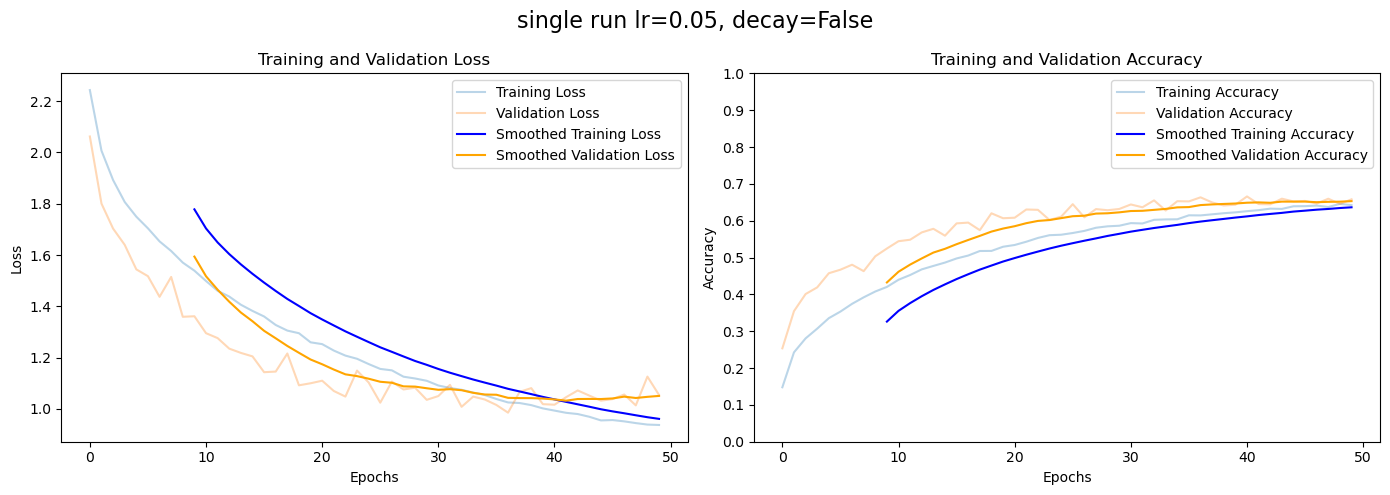

TESTING COMPLETE!!
Test Loss: 1.0679, Test Acc: 0.6575
              precision    recall  f1-score   support

       plane       0.74      0.61      0.67      1000
         car       0.81      0.79      0.80      1000
        bird       0.56      0.45      0.50      1000
         cat       0.41      0.55      0.47      1000
        deer       0.60      0.57      0.59      1000
         dog       0.58      0.56      0.57      1000
        frog       0.80      0.67      0.73      1000
       horse       0.72      0.72      0.72      1000
        ship       0.71      0.87      0.78      1000
       truck       0.72      0.78      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

DR:  0.8
seed: 2
Epoch [1/50] - Train Loss: 2.2320, Acc: 0.1506 | Val Loss: 2.0327, Acc: 0.2811
Epoch [2/50] - Train Loss: 2.0428, Acc: 0.2281 | Val Loss: 1.8484, Acc: 0.3286
Epoch [3/50

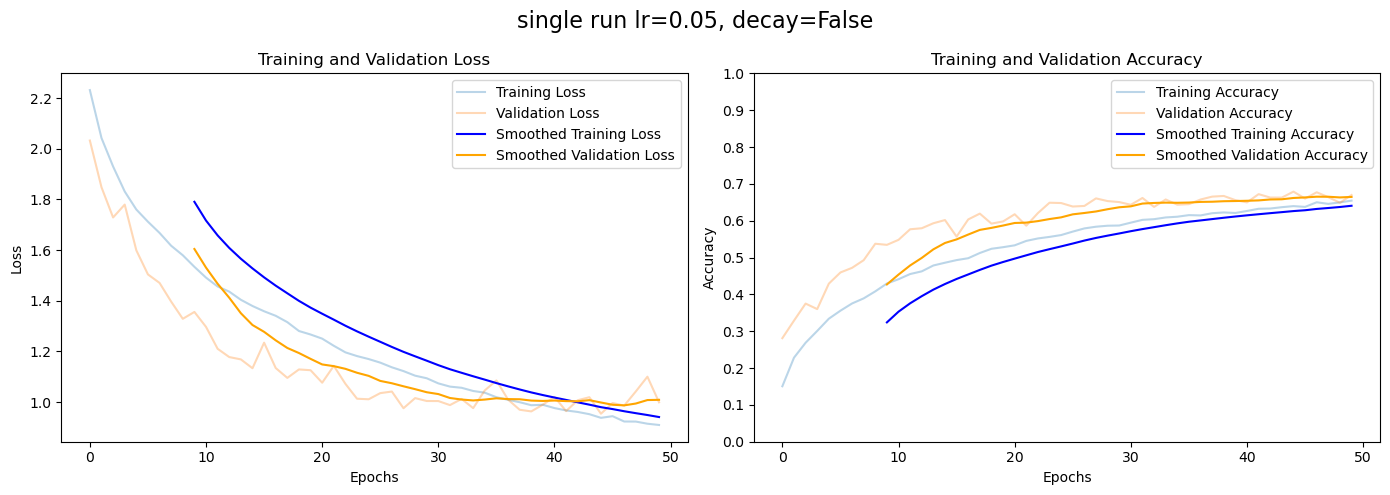

TESTING COMPLETE!!
Test Loss: 0.9928, Test Acc: 0.6730
              precision    recall  f1-score   support

       plane       0.75      0.70      0.72      1000
         car       0.78      0.88      0.83      1000
        bird       0.57      0.52      0.54      1000
         cat       0.41      0.62      0.49      1000
        deer       0.60      0.59      0.59      1000
         dog       0.64      0.45      0.53      1000
        frog       0.79      0.72      0.76      1000
       horse       0.68      0.78      0.72      1000
        ship       0.88      0.70      0.78      1000
       truck       0.79      0.77      0.78      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000

DR:  0.8
seed: 3
Epoch [1/50] - Train Loss: 2.2689, Acc: 0.1387 | Val Loss: 2.1196, Acc: 0.2588
Epoch [2/50] - Train Loss: 2.0574, Acc: 0.2216 | Val Loss: 1.8682, Acc: 0.3374
Epoch [3/50

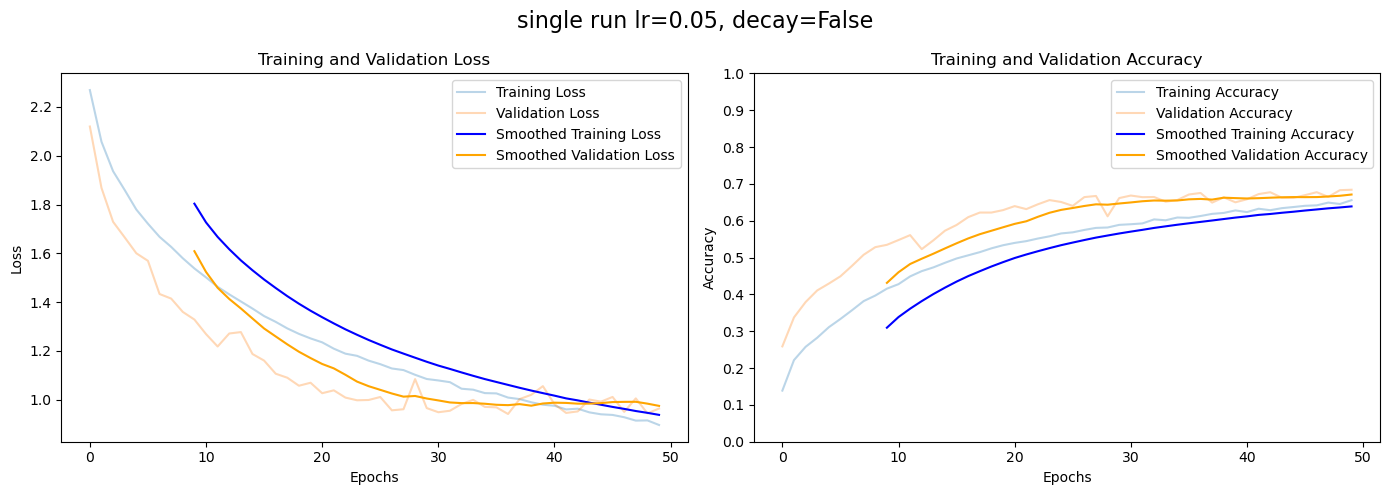

TESTING COMPLETE!!
Test Loss: 0.9844, Test Acc: 0.6814
              precision    recall  f1-score   support

       plane       0.73      0.70      0.71      1000
         car       0.83      0.84      0.83      1000
        bird       0.53      0.49      0.51      1000
         cat       0.44      0.46      0.45      1000
        deer       0.64      0.59      0.61      1000
         dog       0.60      0.54      0.57      1000
        frog       0.71      0.80      0.75      1000
       horse       0.72      0.78      0.75      1000
        ship       0.79      0.85      0.82      1000
       truck       0.81      0.76      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

DR:  0.8
seed: 4
Epoch [1/50] - Train Loss: 2.2571, Acc: 0.1355 | Val Loss: 2.0845, Acc: 0.2608
Epoch [2/50] - Train Loss: 2.0641, Acc: 0.2222 | Val Loss: 1.8865, Acc: 0.3253
Epoch [3/50

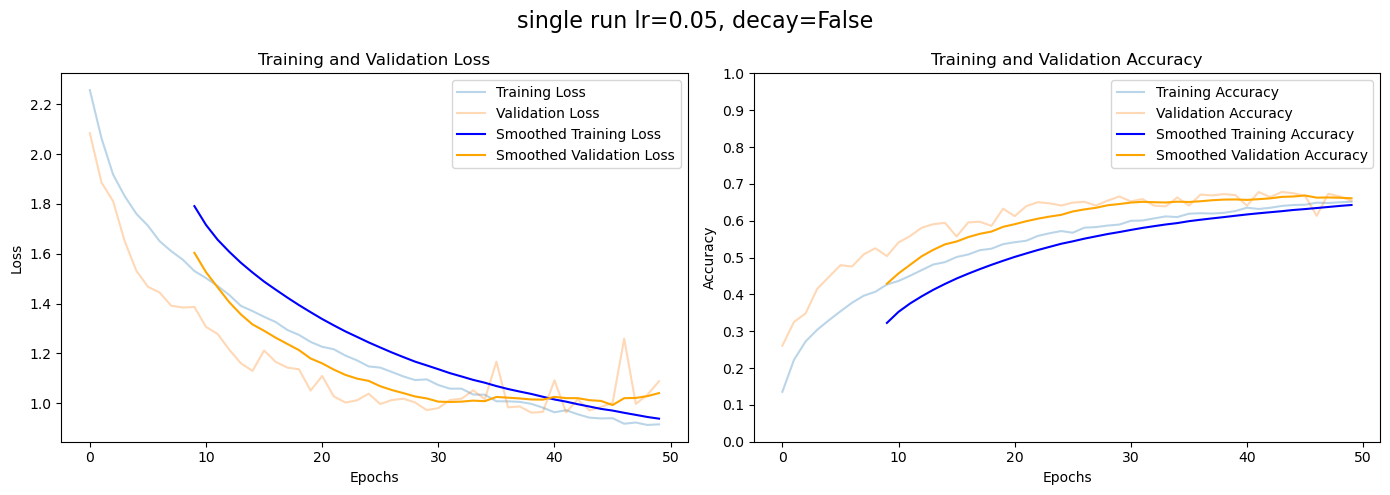

TESTING COMPLETE!!
Test Loss: 1.1100, Test Acc: 0.6457
              precision    recall  f1-score   support

       plane       0.69      0.70      0.70      1000
         car       0.82      0.81      0.81      1000
        bird       0.44      0.66      0.53      1000
         cat       0.40      0.49      0.44      1000
        deer       0.66      0.45      0.54      1000
         dog       0.60      0.49      0.54      1000
        frog       0.67      0.81      0.73      1000
       horse       0.87      0.58      0.70      1000
        ship       0.70      0.85      0.77      1000
       truck       0.88      0.61      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.65     10000
weighted avg       0.67      0.65      0.65     10000

DR:  0.8
seed: 5
Epoch [1/50] - Train Loss: 2.2019, Acc: 0.1705 | Val Loss: 2.0393, Acc: 0.2708
Epoch [2/50] - Train Loss: 1.9949, Acc: 0.2409 | Val Loss: 1.8002, Acc: 0.3543
Epoch [3/50

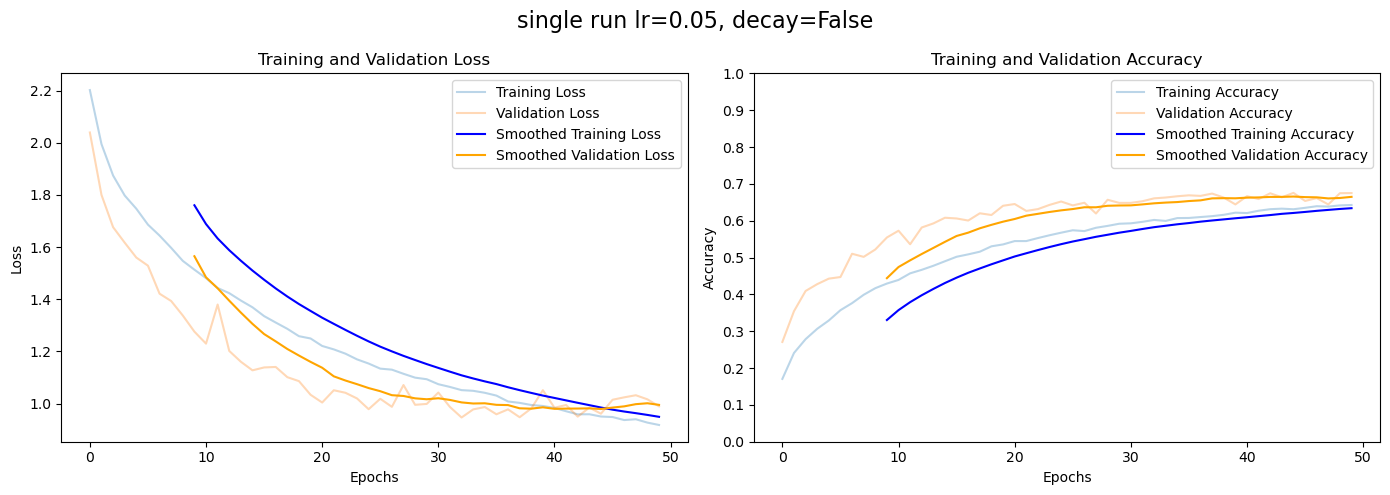

TESTING COMPLETE!!
Test Loss: 1.0088, Test Acc: 0.6742
              precision    recall  f1-score   support

       plane       0.74      0.72      0.73      1000
         car       0.81      0.84      0.83      1000
        bird       0.61      0.40      0.49      1000
         cat       0.40      0.47      0.43      1000
        deer       0.59      0.64      0.61      1000
         dog       0.58      0.57      0.57      1000
        frog       0.70      0.79      0.74      1000
       horse       0.71      0.77      0.74      1000
        ship       0.85      0.77      0.80      1000
       truck       0.78      0.77      0.78      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

average for 
DR:  0.8


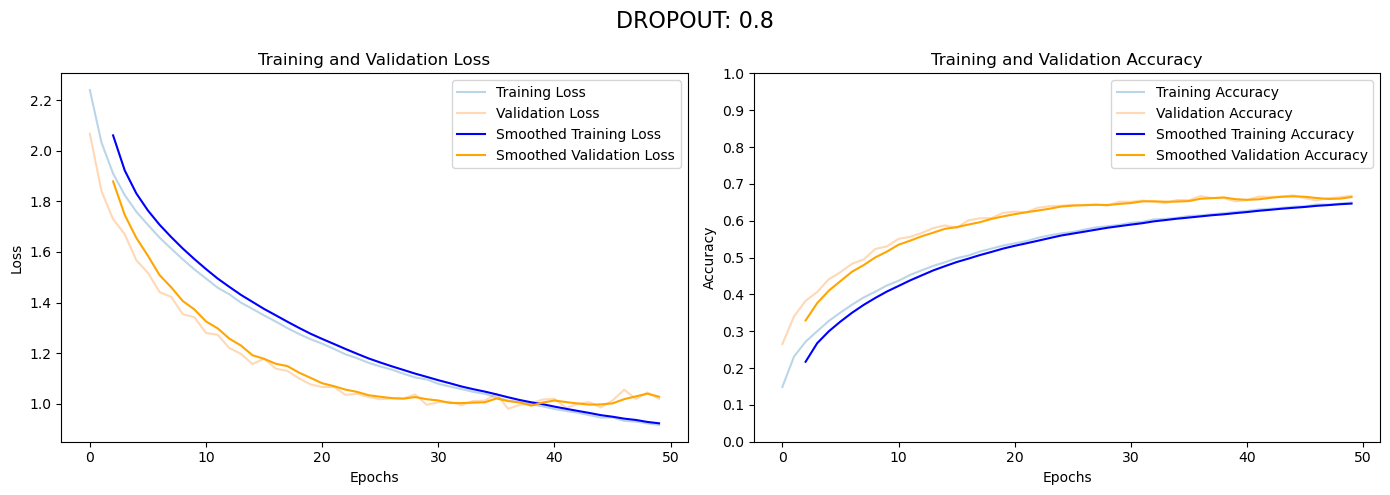

In [3]:
# 2.1 explore dropout rates

num_epochs = 50
learning_rate = 0.05

random_seeds = list(range(1, 6))
dropout_rates_for_experiment = [0, 0.2, 0.4, 0.6, 0.8]

averaged_results = {dr:{} for dr in dropout_rates_for_experiment}

path_to_save = f'./run_data/dropout/C2_final_dropout_rate_compatison_lr_{learning_rate}_{num_epochs}_epochs.json'
path_to_load = f'./run_data/dropout/C2_final_dropout_rate_compatison_lr_{learning_rate}_{num_epochs}_epochs.json'
save_experiment = True


for dropout_rate in dropout_rates_for_experiment:
    print('DR: ', dropout_rate) 
    epoch_train_losses_by_run = []
    epoch_val_losses_by_run = []
    epoch_train_accuracies_by_run = []
    epoch_val_accuracies_by_run = []
    test_losses = []
    test_accuracies = []
    reports = []
    
    for random_seed in random_seeds:
        print('DR: ', dropout_rate) 
        print('seed:', random_seed)
        torch.manual_seed(random_seed)
        
        model = DropoutNet(dropout_rate).to(device)
        criterion = nn.CrossEntropyLoss()
        optimiser = optim.SGD(model.parameters(), lr=learning_rate)

        model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, learning_rate, num_epochs, criterion, optimiser, train_dataloader, val_dataloader, metrics = False, manual_lr_schedule=False, plot=True)
        epoch_train_losses_by_run.append(train_epoch_losses)
        epoch_val_losses_by_run.append(val_epoch_losses)
        epoch_train_accuracies_by_run.append(train_epoch_accuracy)
        epoch_val_accuracies_by_run.append(val_epoch_accuracy)
        
        test_loss, test_accuracy, report = run_testing(model, device, criterion, test_dataloader)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)
        reports.append(report)
        
    average_train_losses = [sum(epoch_losses) / len(epoch_losses) for epoch_losses in zip(*epoch_train_losses_by_run)]
    average_val_losses = [sum(epoch_losses) / len(epoch_losses) for epoch_losses in zip(*epoch_val_losses_by_run)]
    average_train_accuracies = [sum(epoch_accuracies) / len(epoch_accuracies) for epoch_accuracies in zip(*epoch_train_accuracies_by_run)]
    average_val_accuracies =  [sum(epoch_accuracies) / len(epoch_accuracies) for epoch_accuracies in zip(*epoch_val_accuracies_by_run)]
    average_test_loss = sum(test_losses)/len(test_losses)
    average_test_accuracy = sum(test_accuracies)/len(test_accuracies)
    
    averaged_results[dropout_rate] = {'seeds':random_seeds,'av_train_losses': average_train_losses,
                                       'av_val_losses': average_val_losses,
                                       'av_train_acc': average_train_accuracies,
                                       'av_val_acc': average_val_accuracies,
                                       'all_train_losses':epoch_train_losses_by_run,
                                       'all_val_losses': epoch_val_losses_by_run,
                                       'all_train_accuracies': epoch_train_accuracies_by_run,
                                       'all_val_accuracies': epoch_val_accuracies_by_run,
                                       'all_test_losses':test_losses, 
                                       'all_test_accuracies':test_accuracies,
                                       'av_test_loss': average_test_loss,
                                       'av_test_accuracy':average_test_accuracy}
    print('average for ')
    print('DR: ', dropout_rate) 
    plot_single_train_val_smoothed(average_train_losses,average_val_losses,average_train_accuracies,average_val_accuracies, num_epochs, smoothing_window=3, title=f'DROPOUT: {dropout_rate}')

if save_experiment:
    with open(path_to_save, 'w') as file:
        json.dump(averaged_results, file, indent=4)  # 'indent' makes the output formatted and easier to read

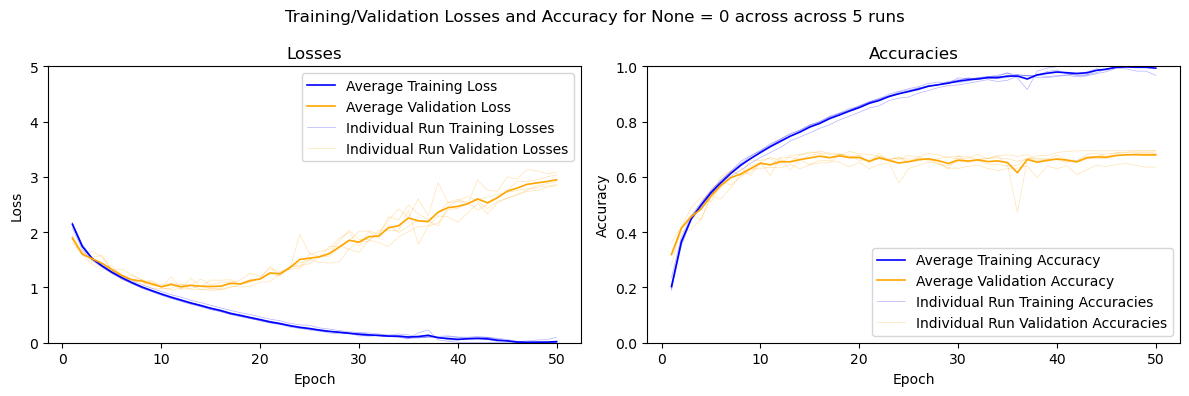

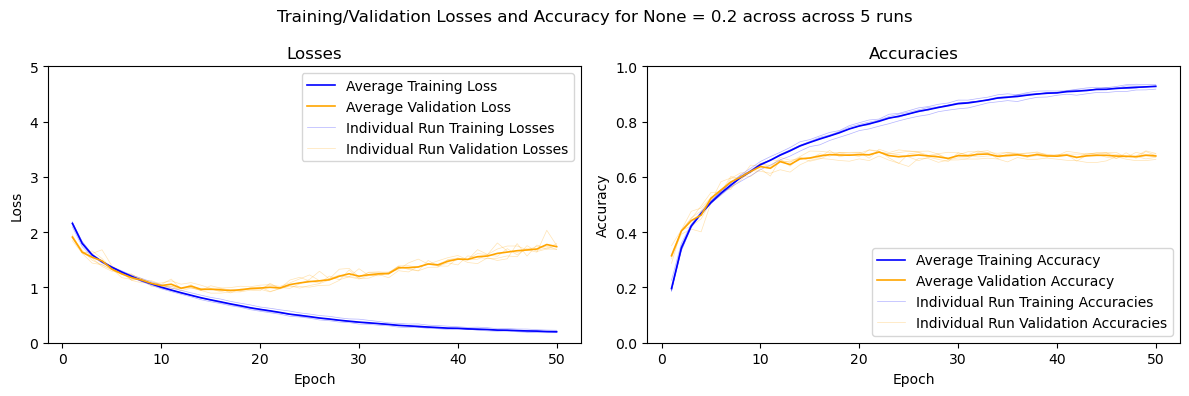

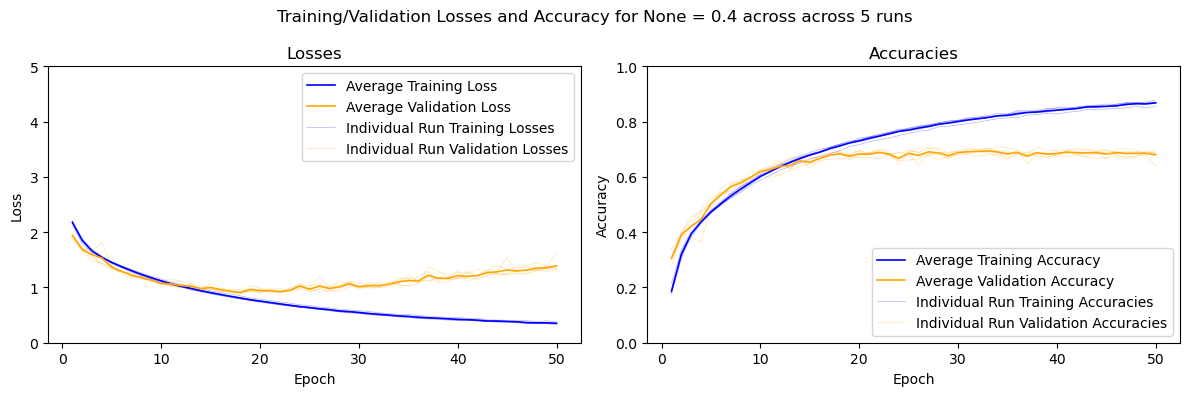

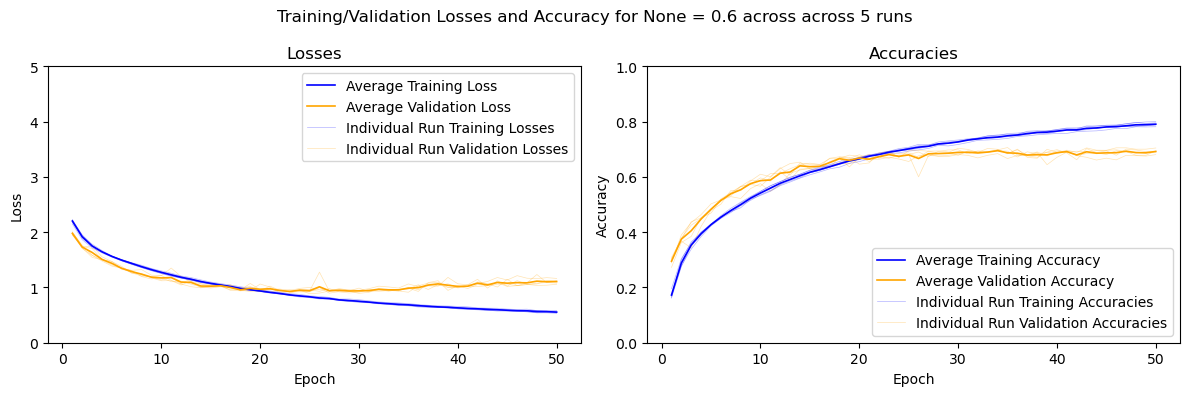

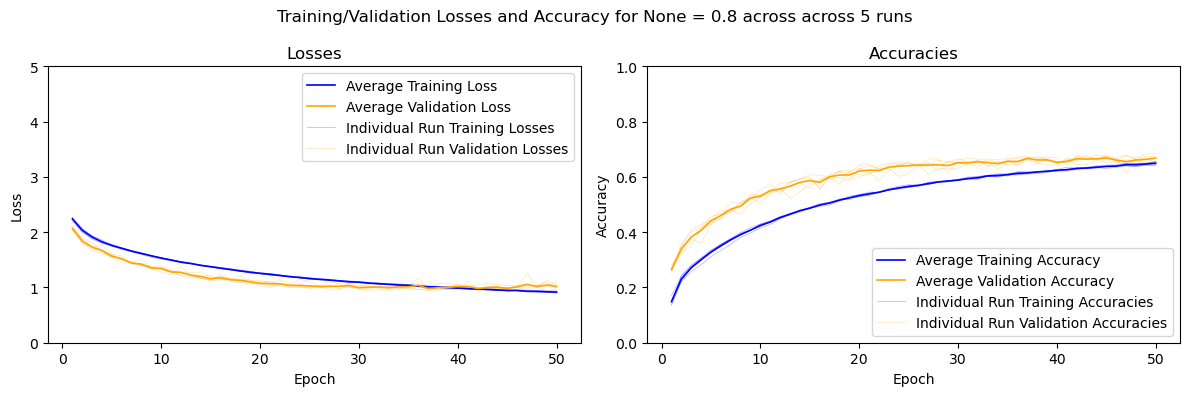

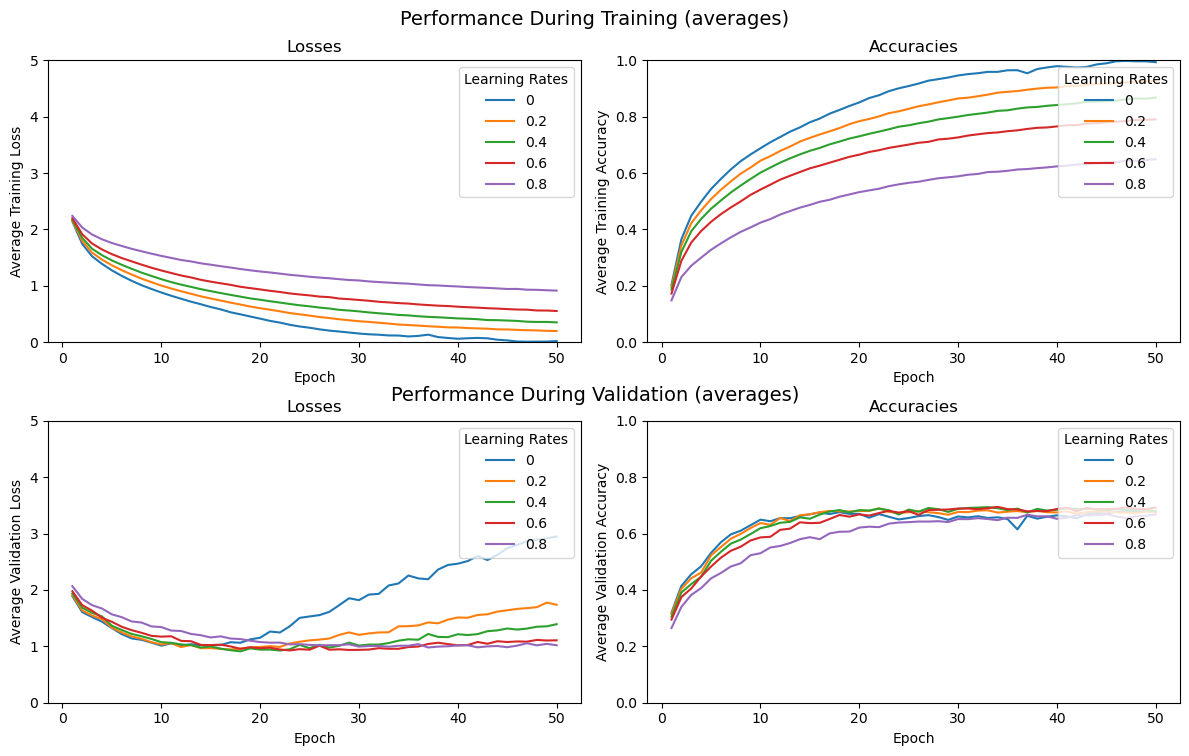

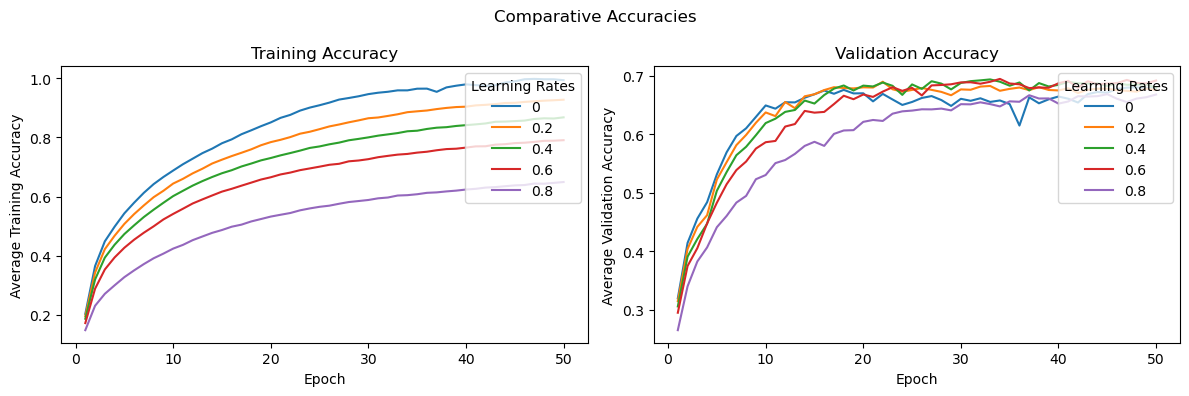

hi


In [4]:
dropout_data = path_to_load
plot_all_models_performance_from_disk(dropout_data, enforce_axis=True)
plot_performance_comparison_from_file(dropout_data, enforce_axis=True)
display_accuracy_heatmap(dropout_data)

In [6]:
# part 2 - TRANSFER LEARNINNG DATA
# To swap the datasets between the two dataloaders

torch.manual_seed(0)

batch_size = 64

original_train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
original_val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=True)

swapped_train_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
swapped_val_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


MODEL:  0
seed: 1
Epoch [1/50] - Train Loss: 2.1605, Acc: 0.1978 | Val Loss: 1.8994, Acc: 0.3193
Epoch [2/50] - Train Loss: 1.7321, Acc: 0.3717 | Val Loss: 1.5956, Acc: 0.4166
Epoch [3/50] - Train Loss: 1.5273, Acc: 0.4468 | Val Loss: 1.4781, Acc: 0.4671
Epoch [4/50] - Train Loss: 1.4001, Acc: 0.4930 | Val Loss: 1.3731, Acc: 0.5015
Epoch [5/50] - Train Loss: 1.2854, Acc: 0.5395 | Val Loss: 1.2435, Acc: 0.5610
Epoch [6/50] - Train Loss: 1.1983, Acc: 0.5732 | Val Loss: 1.1842, Acc: 0.5851
Epoch [7/50] - Train Loss: 1.1144, Acc: 0.6022 | Val Loss: 1.2052, Acc: 0.5774
Epoch [8/50] - Train Loss: 1.0479, Acc: 0.6251 | Val Loss: 1.1345, Acc: 0.5967
Epoch [9/50] - Train Loss: 0.9794, Acc: 0.6515 | Val Loss: 1.0825, Acc: 0.6234
Epoch [10/50] - Train Loss: 0.9189, Acc: 0.6730 | Val Loss: 1.0423, Acc: 0.6375
Epoch [11/50] - Train Loss: 0.8634, Acc: 0.6922 | Val Loss: 1.0364, Acc: 0.6411
Epoch [12/50] - Train Loss: 0.8150, Acc: 0.7100 | Val Loss: 1.0795, Acc: 0.6272
Epoch [13/50] - Train Loss: 0.7

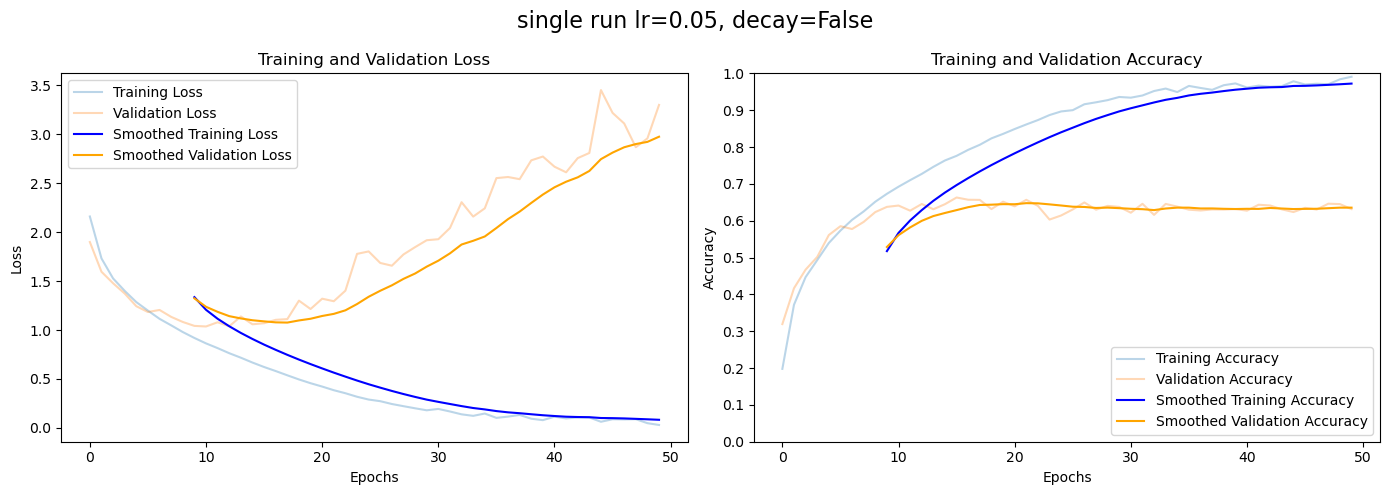

TESTING COMPLETE!!
Test Loss: 3.3271, Test Acc: 0.6196
              precision    recall  f1-score   support

       plane       0.70      0.57      0.63      1000
         car       0.71      0.78      0.74      1000
        bird       0.54      0.46      0.50      1000
         cat       0.45      0.45      0.45      1000
        deer       0.58      0.49      0.53      1000
         dog       0.54      0.54      0.54      1000
        frog       0.65      0.73      0.68      1000
       horse       0.71      0.63      0.67      1000
        ship       0.64      0.83      0.72      1000
       truck       0.66      0.72      0.69      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000

MODEL:  0
seed: 2
Epoch [1/50] - Train Loss: 2.1434, Acc: 0.1995 | Val Loss: 1.8843, Acc: 0.3178
Epoch [2/50] - Train Loss: 1.7472, Acc: 0.3631 | Val Loss: 1.6216, Acc: 0.4002
Epoch [3/5

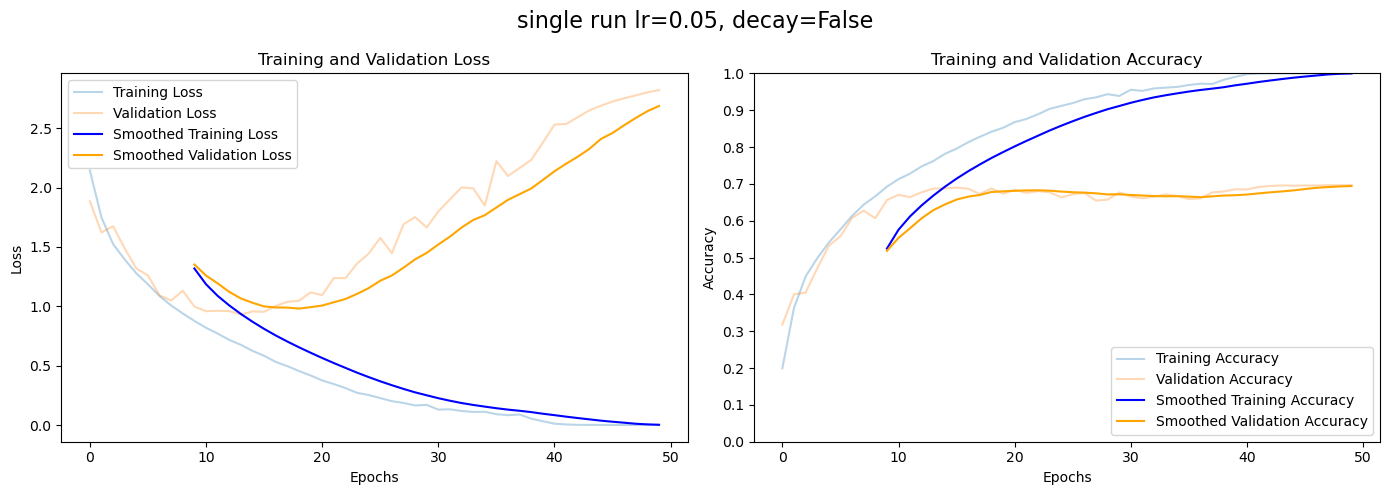

TESTING COMPLETE!!
Test Loss: 2.8587, Test Acc: 0.6941
              precision    recall  f1-score   support

       plane       0.72      0.74      0.73      1000
         car       0.81      0.82      0.82      1000
        bird       0.59      0.57      0.58      1000
         cat       0.51      0.52      0.51      1000
        deer       0.63      0.64      0.64      1000
         dog       0.59      0.59      0.59      1000
        frog       0.76      0.76      0.76      1000
       horse       0.74      0.73      0.74      1000
        ship       0.83      0.80      0.82      1000
       truck       0.77      0.77      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

MODEL:  0
seed: 3
Epoch [1/50] - Train Loss: 2.1737, Acc: 0.1945 | Val Loss: 1.9184, Acc: 0.3140
Epoch [2/50] - Train Loss: 1.7713, Acc: 0.3575 | Val Loss: 1.6637, Acc: 0.4101
Epoch [3/5

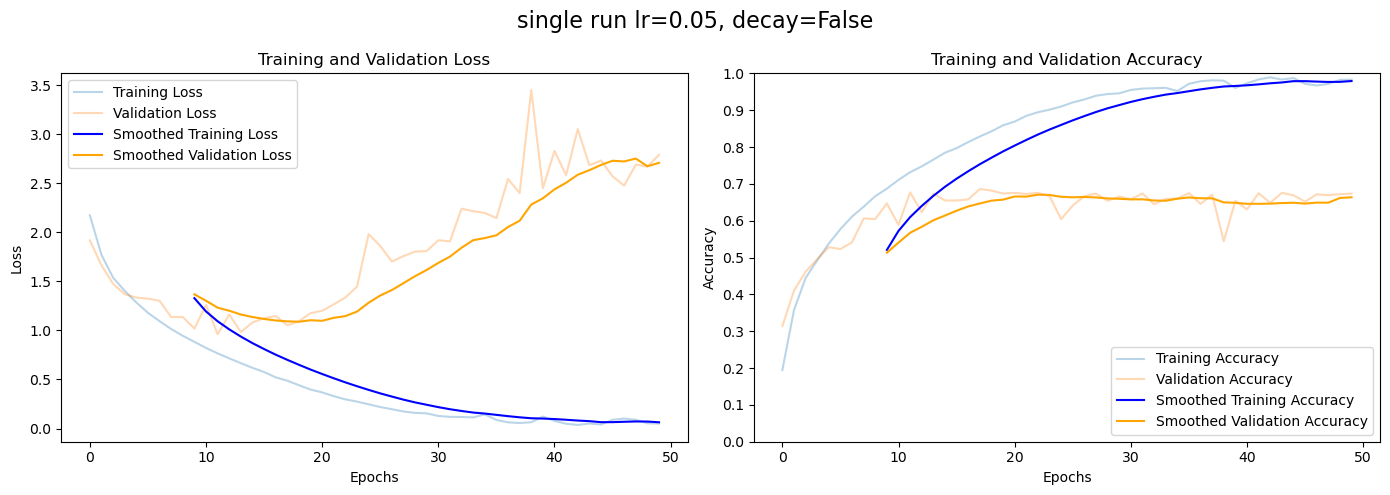

TESTING COMPLETE!!
Test Loss: 2.7860, Test Acc: 0.6712
              precision    recall  f1-score   support

       plane       0.74      0.70      0.72      1000
         car       0.79      0.81      0.80      1000
        bird       0.62      0.48      0.54      1000
         cat       0.53      0.43      0.47      1000
        deer       0.56      0.67      0.61      1000
         dog       0.56      0.59      0.57      1000
        frog       0.74      0.71      0.73      1000
       horse       0.69      0.73      0.71      1000
        ship       0.74      0.84      0.79      1000
       truck       0.72      0.75      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

MODEL:  0
seed: 4
Epoch [1/50] - Train Loss: 2.1665, Acc: 0.1891 | Val Loss: 1.9503, Acc: 0.2834
Epoch [2/50] - Train Loss: 1.7829, Acc: 0.3506 | Val Loss: 1.5831, Acc: 0.4182
Epoch [3/5

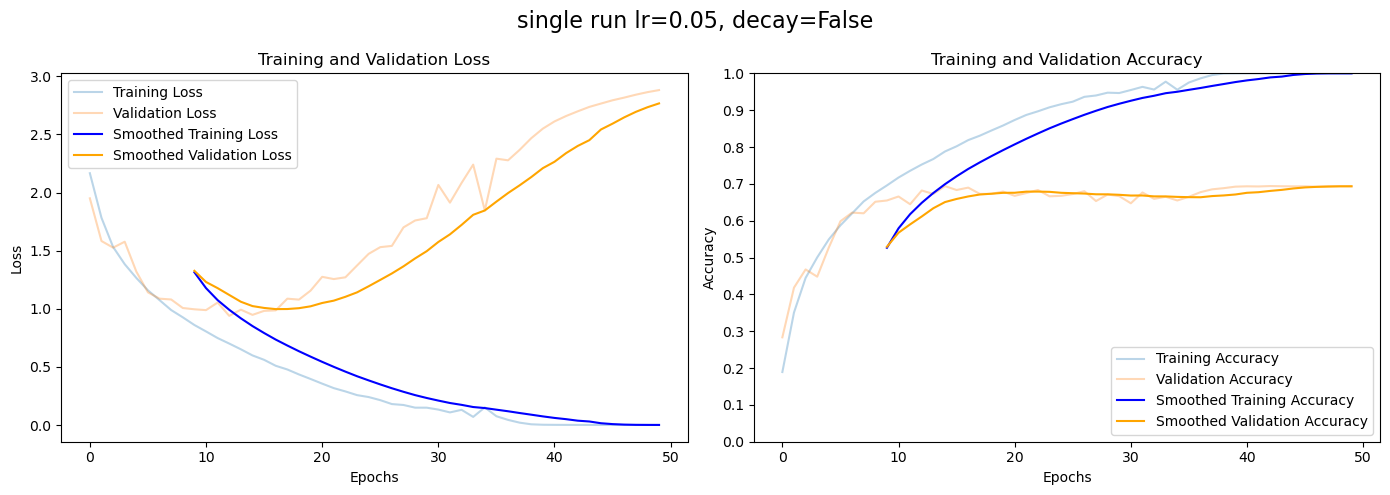

TESTING COMPLETE!!
Test Loss: 2.9351, Test Acc: 0.6838
              precision    recall  f1-score   support

       plane       0.74      0.74      0.74      1000
         car       0.81      0.83      0.82      1000
        bird       0.58      0.56      0.57      1000
         cat       0.47      0.46      0.46      1000
        deer       0.63      0.61      0.62      1000
         dog       0.56      0.57      0.57      1000
        frog       0.73      0.75      0.74      1000
       horse       0.73      0.73      0.73      1000
        ship       0.81      0.82      0.82      1000
       truck       0.78      0.77      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

MODEL:  0
seed: 5
Epoch [1/50] - Train Loss: 2.0745, Acc: 0.2370 | Val Loss: 1.8149, Acc: 0.3593
Epoch [2/50] - Train Loss: 1.6845, Acc: 0.3847 | Val Loss: 1.5757, Acc: 0.4246
Epoch [3/5

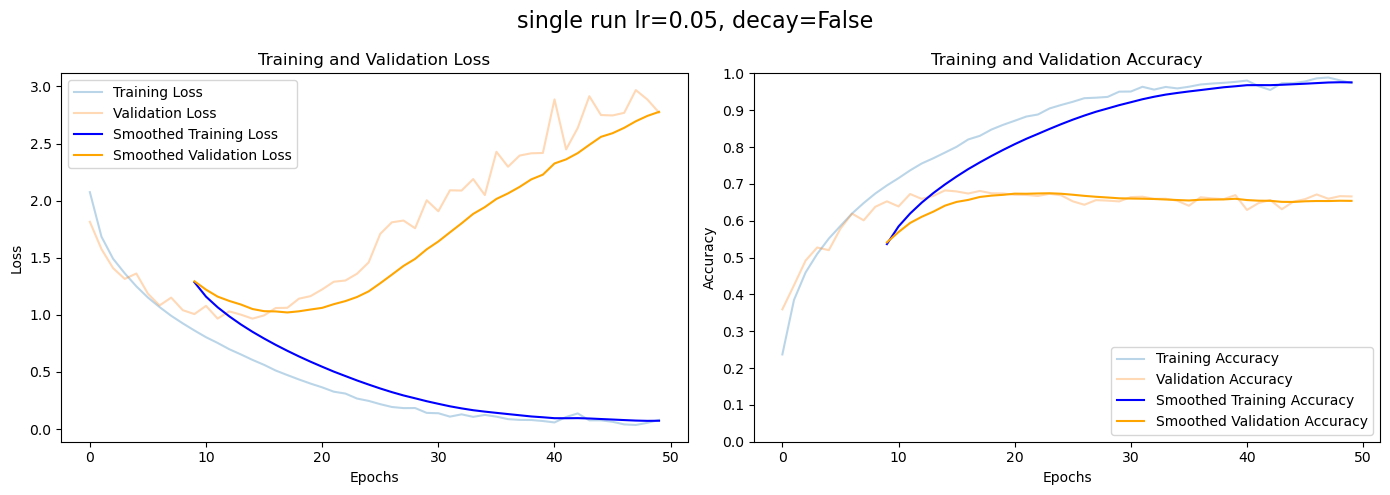

TESTING COMPLETE!!
Test Loss: 2.8433, Test Acc: 0.6566
              precision    recall  f1-score   support

       plane       0.67      0.73      0.69      1000
         car       0.77      0.81      0.79      1000
        bird       0.54      0.56      0.55      1000
         cat       0.47      0.47      0.47      1000
        deer       0.61      0.56      0.59      1000
         dog       0.58      0.51      0.54      1000
        frog       0.67      0.75      0.71      1000
       horse       0.71      0.72      0.71      1000
        ship       0.79      0.79      0.79      1000
       truck       0.77      0.68      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000

average for 
Model:  0


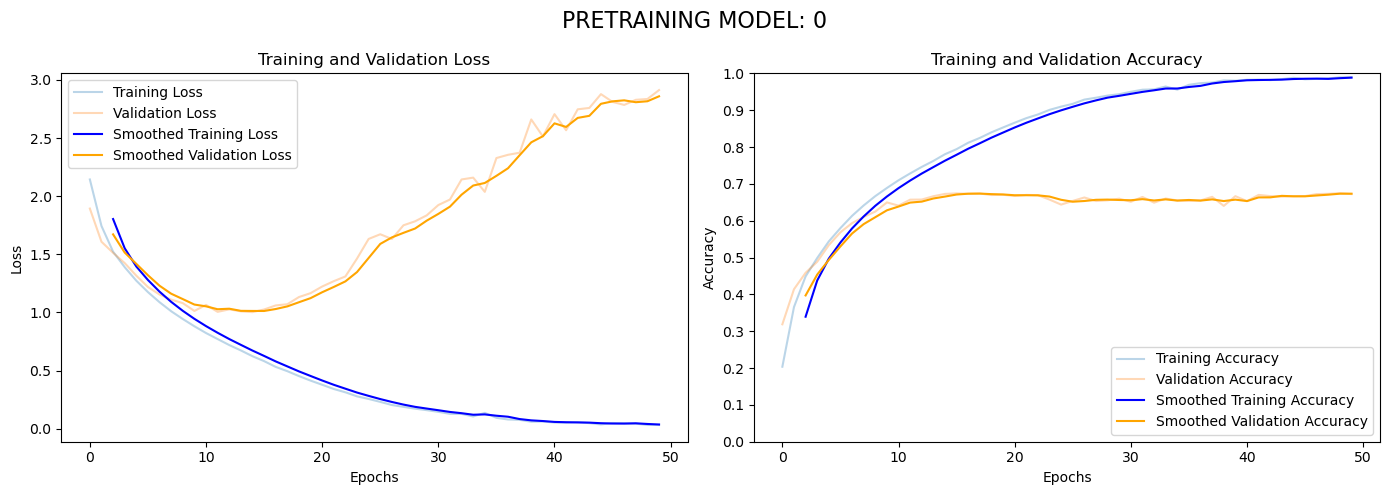

MODEL:  1
seed: 1
Epoch [1/50] - Train Loss: 2.2129, Acc: 0.1651 | Val Loss: 1.9847, Acc: 0.2878
Epoch [2/50] - Train Loss: 1.8966, Acc: 0.3006 | Val Loss: 1.7138, Acc: 0.3863
Epoch [3/50] - Train Loss: 1.7416, Acc: 0.3627 | Val Loss: 1.5896, Acc: 0.4317
Epoch [4/50] - Train Loss: 1.6426, Acc: 0.3956 | Val Loss: 1.4729, Acc: 0.4632
Epoch [5/50] - Train Loss: 1.5597, Acc: 0.4294 | Val Loss: 1.3817, Acc: 0.5017
Epoch [6/50] - Train Loss: 1.5046, Acc: 0.4521 | Val Loss: 1.3492, Acc: 0.5187
Epoch [7/50] - Train Loss: 1.4508, Acc: 0.4731 | Val Loss: 1.3233, Acc: 0.5263
Epoch [8/50] - Train Loss: 1.4035, Acc: 0.4858 | Val Loss: 1.3179, Acc: 0.5237
Epoch [9/50] - Train Loss: 1.3404, Acc: 0.5166 | Val Loss: 1.2146, Acc: 0.5622
Epoch [10/50] - Train Loss: 1.2993, Acc: 0.5338 | Val Loss: 1.2051, Acc: 0.5810
Epoch [11/50] - Train Loss: 1.2534, Acc: 0.5493 | Val Loss: 1.2923, Acc: 0.5618
Epoch [12/50] - Train Loss: 1.2024, Acc: 0.5694 | Val Loss: 1.1485, Acc: 0.5884
Epoch [13/50] - Train Loss: 1.1

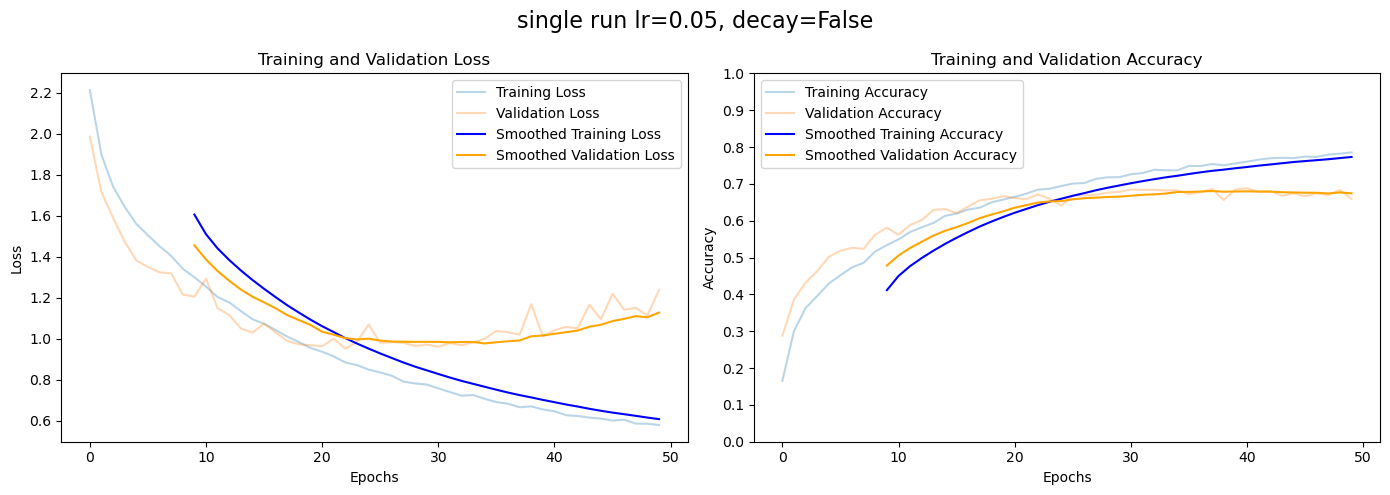

TESTING COMPLETE!!
Test Loss: 1.2510, Test Acc: 0.6630
              precision    recall  f1-score   support

       plane       0.70      0.70      0.70      1000
         car       0.89      0.70      0.78      1000
        bird       0.50      0.57      0.53      1000
         cat       0.53      0.42      0.47      1000
        deer       0.53      0.70      0.60      1000
         dog       0.60      0.52      0.56      1000
        frog       0.67      0.79      0.73      1000
       horse       0.75      0.69      0.72      1000
        ship       0.76      0.82      0.79      1000
       truck       0.79      0.71      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000

MODEL:  1
seed: 2
Epoch [1/50] - Train Loss: 2.1947, Acc: 0.1733 | Val Loss: 1.9541, Acc: 0.3047
Epoch [2/50] - Train Loss: 1.9269, Acc: 0.2878 | Val Loss: 1.7270, Acc: 0.3684
Epoch [3/5

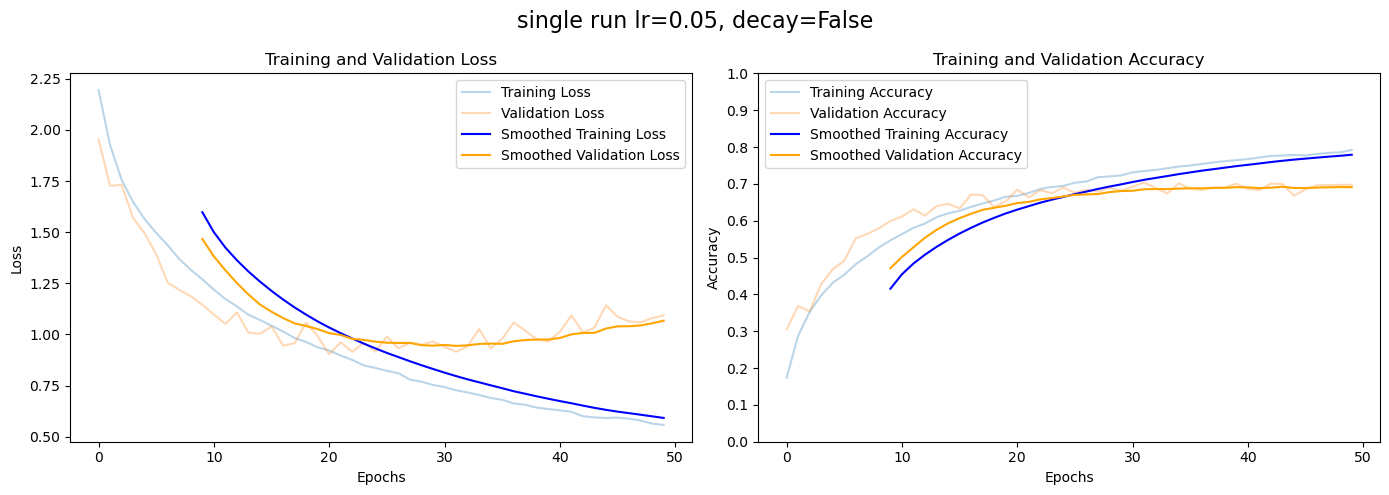

TESTING COMPLETE!!
Test Loss: 1.0843, Test Acc: 0.6964
              precision    recall  f1-score   support

       plane       0.78      0.68      0.72      1000
         car       0.82      0.86      0.84      1000
        bird       0.65      0.51      0.57      1000
         cat       0.47      0.52      0.49      1000
        deer       0.60      0.68      0.64      1000
         dog       0.59      0.58      0.58      1000
        frog       0.71      0.82      0.76      1000
       horse       0.78      0.74      0.76      1000
        ship       0.77      0.83      0.80      1000
       truck       0.85      0.73      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

MODEL:  1
seed: 3
Epoch [1/50] - Train Loss: 2.2296, Acc: 0.1675 | Val Loss: 2.0038, Acc: 0.2982
Epoch [2/50] - Train Loss: 1.9408, Acc: 0.2785 | Val Loss: 1.7504, Acc: 0.3794
Epoch [3/5

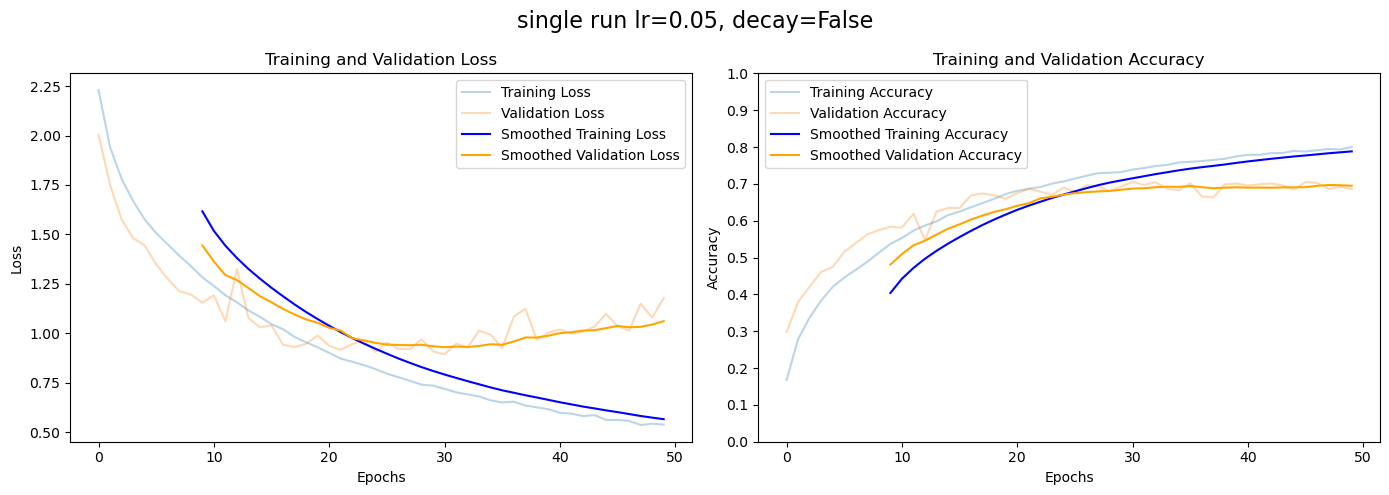

TESTING COMPLETE!!
Test Loss: 1.1871, Test Acc: 0.6842
              precision    recall  f1-score   support

       plane       0.73      0.73      0.73      1000
         car       0.76      0.87      0.81      1000
        bird       0.70      0.41      0.52      1000
         cat       0.51      0.47      0.48      1000
        deer       0.64      0.63      0.63      1000
         dog       0.56      0.62      0.58      1000
        frog       0.79      0.76      0.77      1000
       horse       0.61      0.83      0.70      1000
        ship       0.89      0.72      0.80      1000
       truck       0.74      0.81      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

MODEL:  1
seed: 4
Epoch [1/50] - Train Loss: 2.2149, Acc: 0.1624 | Val Loss: 2.0067, Acc: 0.2679
Epoch [2/50] - Train Loss: 1.9501, Acc: 0.2752 | Val Loss: 1.7451, Acc: 0.3632
Epoch [3/5

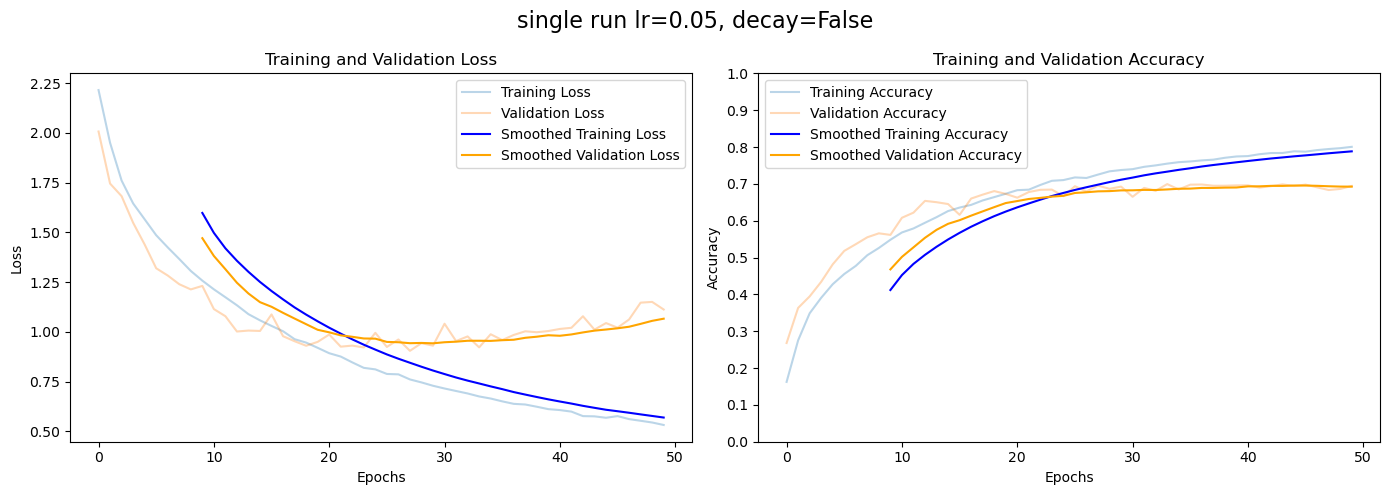

TESTING COMPLETE!!
Test Loss: 1.1058, Test Acc: 0.6956
              precision    recall  f1-score   support

       plane       0.73      0.76      0.75      1000
         car       0.85      0.78      0.81      1000
        bird       0.58      0.56      0.57      1000
         cat       0.52      0.49      0.51      1000
        deer       0.62      0.64      0.63      1000
         dog       0.61      0.57      0.59      1000
        frog       0.68      0.84      0.75      1000
       horse       0.73      0.74      0.74      1000
        ship       0.83      0.79      0.81      1000
       truck       0.81      0.77      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.69      0.69     10000

MODEL:  1
seed: 5
Epoch [1/50] - Train Loss: 2.1504, Acc: 0.1965 | Val Loss: 1.9531, Acc: 0.3072
Epoch [2/50] - Train Loss: 1.8605, Acc: 0.3057 | Val Loss: 1.6964, Acc: 0.3800
Epoch [3/5

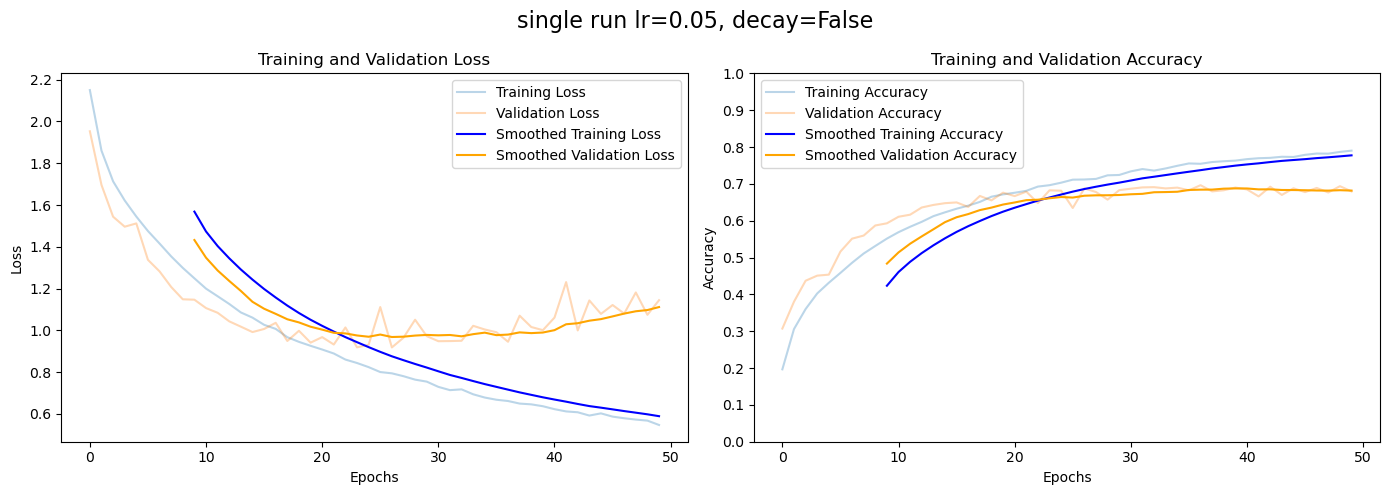

TESTING COMPLETE!!
Test Loss: 1.1464, Test Acc: 0.6819
              precision    recall  f1-score   support

       plane       0.67      0.80      0.73      1000
         car       0.78      0.85      0.82      1000
        bird       0.59      0.56      0.57      1000
         cat       0.48      0.48      0.48      1000
        deer       0.61      0.59      0.60      1000
         dog       0.54      0.68      0.60      1000
        frog       0.81      0.70      0.75      1000
       horse       0.72      0.76      0.74      1000
        ship       0.93      0.67      0.77      1000
       truck       0.82      0.73      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

average for 
Model:  1


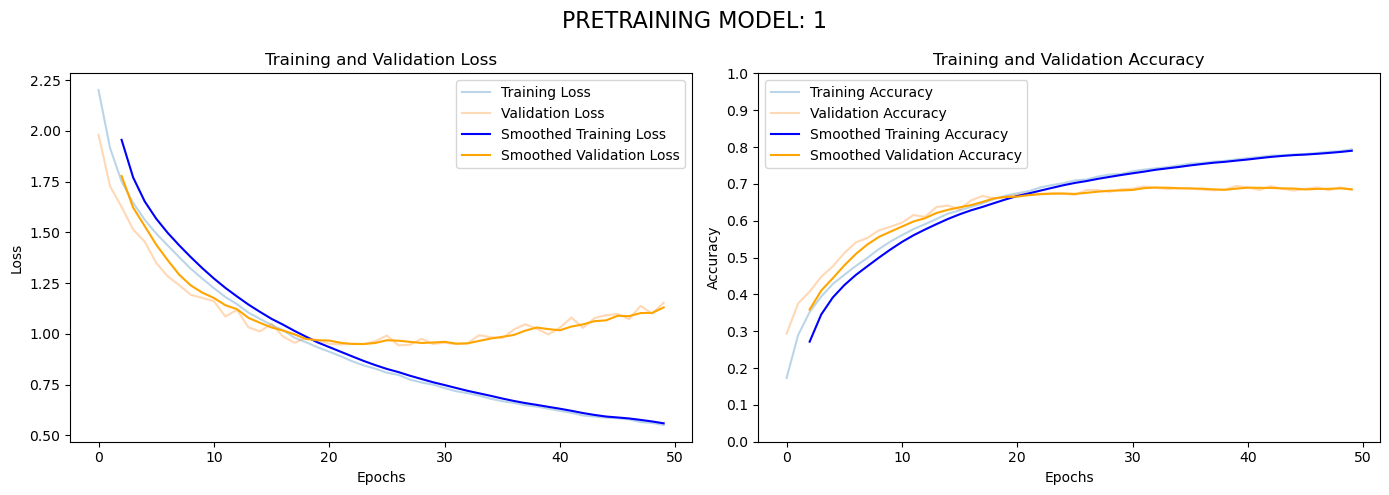

In [7]:
# get the non-dropout model (like inialise it fresh)
# train them on original data and save them as model

# train and save models ready for 

best_dropout_rate = 0.6

num_epochs = 50
learning_rate = 0.05

random_seeds = list(range(1, 6))


path_to_save = f'./run_data/transfer_learning/transfer_learn_original_dat_{num_epochs}_epochs_lr_{learning_rate}.json'
path_to_load = f'./run_data/transfer_learning/transfer_learn_original_dat_{num_epochs}_epochs_lr_{learning_rate}.json'

models = [0, 1]
averaged_results = {i:{} for i in models}

save_experiment = True

# train them both on the original data
for i, model in enumerate(models):
    epoch_train_losses_by_run = []
    epoch_val_losses_by_run = []
    epoch_train_accuracies_by_run = []
    epoch_val_accuracies_by_run = []
    test_losses = []
    test_accuracies = []
    reports = []
    
    for random_seed in random_seeds:
        print('MODEL: ', i) 
        print('seed:', random_seed)
        torch.manual_seed(random_seed)
        
        model = BaselineNet() if i == 0 else DropoutNet(dropout_rate=best_dropout_rate)
        model.to(device)
        
        criterion = nn.CrossEntropyLoss()
        optimiser = optim.SGD(model.parameters(), lr=learning_rate)
        
        model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, learning_rate, num_epochs, criterion, optimiser, original_train_dataloader, original_val_dataloader, metrics = False, manual_lr_schedule=False, plot=True)
        epoch_train_losses_by_run.append(train_epoch_losses)
        epoch_val_losses_by_run.append(val_epoch_losses)
        epoch_train_accuracies_by_run.append(train_epoch_accuracy)
        epoch_val_accuracies_by_run.append(val_epoch_accuracy)
        
        test_loss, test_accuracy, report = run_testing(model, device, criterion, test_dataloader)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)
        reports.append(report)
        
    average_train_losses = [sum(epoch_losses) / len(epoch_losses) for epoch_losses in zip(*epoch_train_losses_by_run)]
    average_val_losses = [sum(epoch_losses) / len(epoch_losses) for epoch_losses in zip(*epoch_val_losses_by_run)]
    average_train_accuracies = [sum(epoch_accuracies) / len(epoch_accuracies) for epoch_accuracies in zip(*epoch_train_accuracies_by_run)]
    average_val_accuracies =  [sum(epoch_accuracies) / len(epoch_accuracies) for epoch_accuracies in zip(*epoch_val_accuracies_by_run)]
    average_test_loss = sum(test_losses)/len(test_losses)
    average_test_accuracy = sum(test_accuracies)/len(test_accuracies)
    
    averaged_results[i] = {'seeds':random_seeds,'av_train_losses': average_train_losses,
                                       'av_val_losses': average_val_losses,
                                       'av_train_acc': average_train_accuracies,
                                       'av_val_acc': average_val_accuracies,
                                       'all_train_losses':epoch_train_losses_by_run,
                                       'all_val_losses': epoch_val_losses_by_run,
                                       'all_train_accuracies': epoch_train_accuracies_by_run,
                                       'all_val_accuracies': epoch_val_accuracies_by_run,
                                       'all_test_losses':test_losses, 
                                       'all_test_accuracies':test_accuracies,
                                       'av_test_loss': average_test_loss,
                                       'av_test_accuracy':average_test_accuracy}
    print('average for ')
    print('Model: ', i) 
    plot_single_train_val_smoothed(average_train_losses,average_val_losses,average_train_accuracies,average_val_accuracies, num_epochs, smoothing_window=3, title=f'PRETRAINING MODEL: {i}')
    
    # save last version of model to disk for retraining    
    torch.save(model, f'./models/trained_model_{i}.pth')

    
if save_experiment:
    with open(path_to_save, 'w') as file:
        json.dump(averaged_results, file, indent=4)  # 'indent' makes the output formatted and easier to read
        

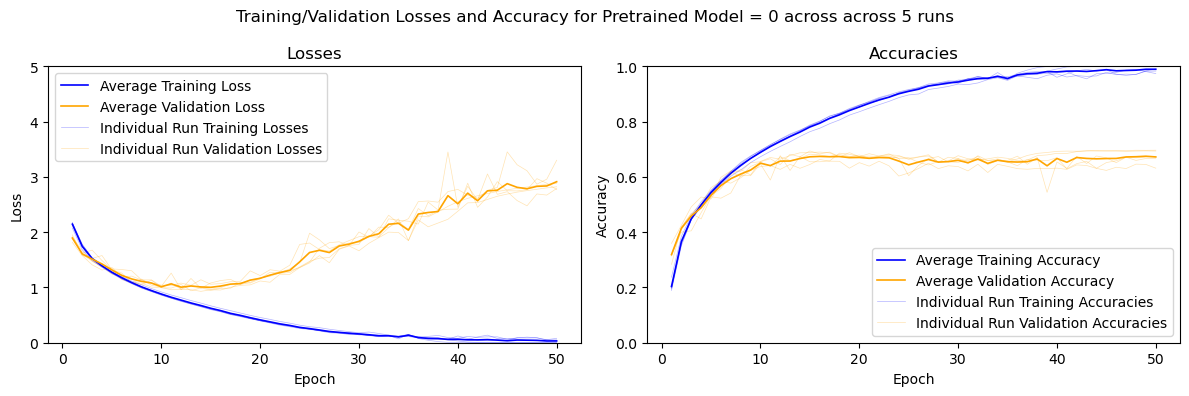

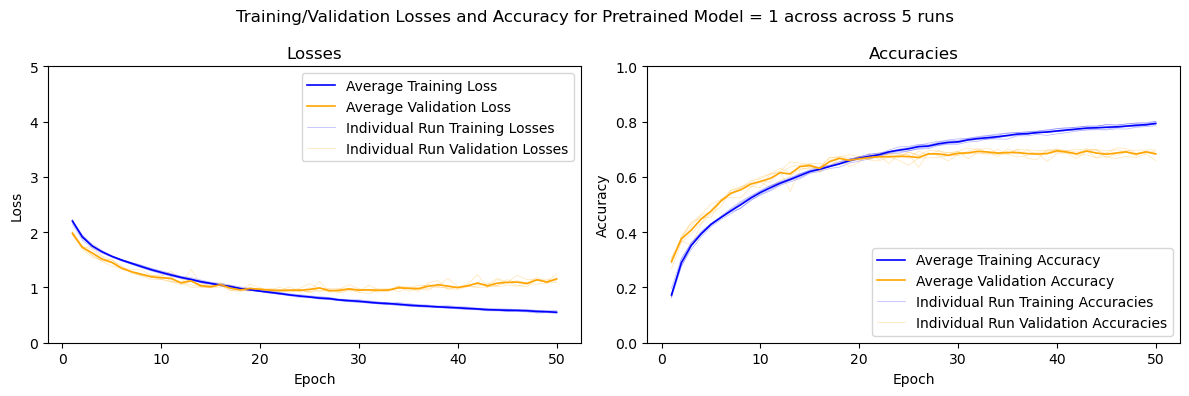

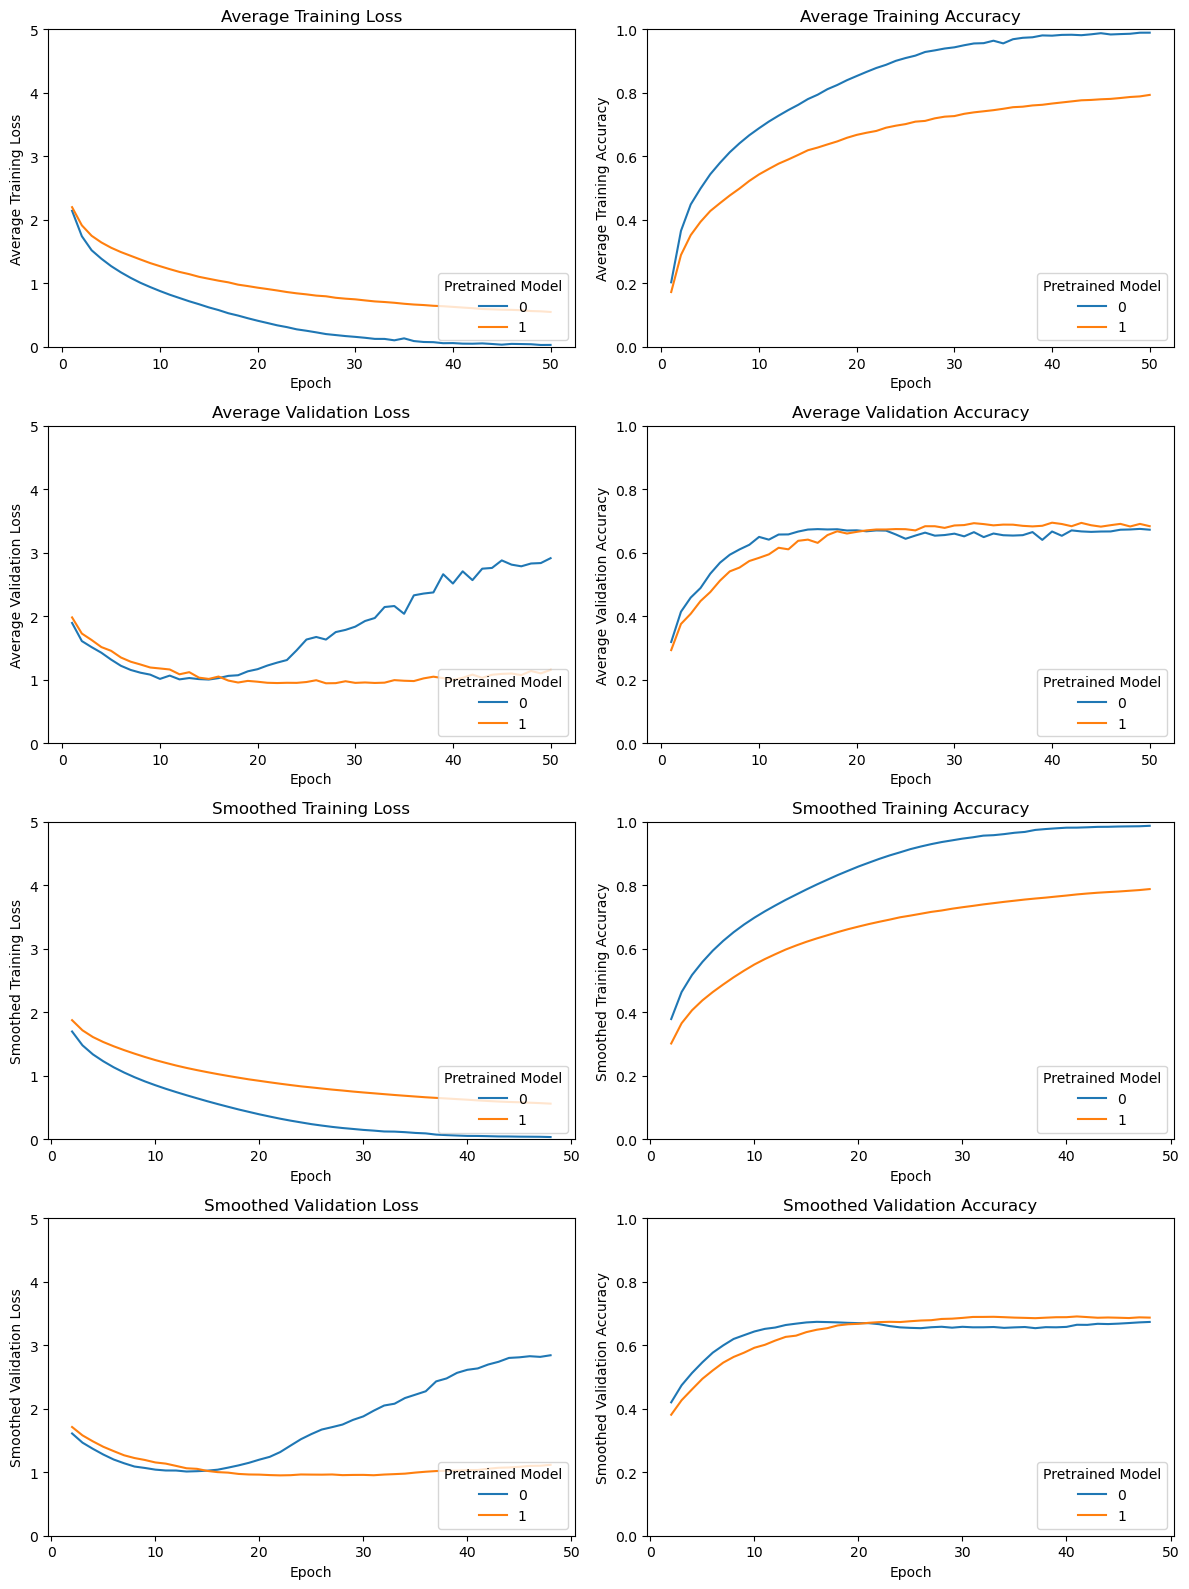

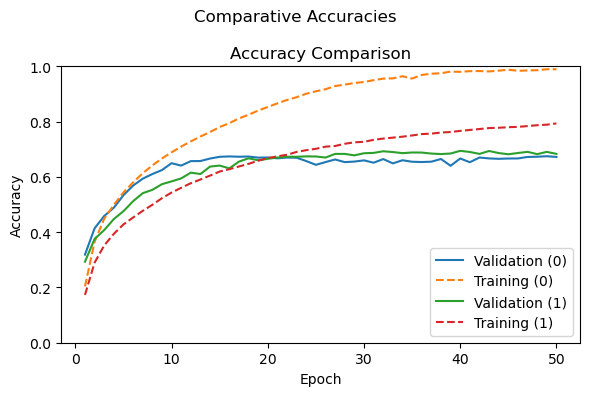

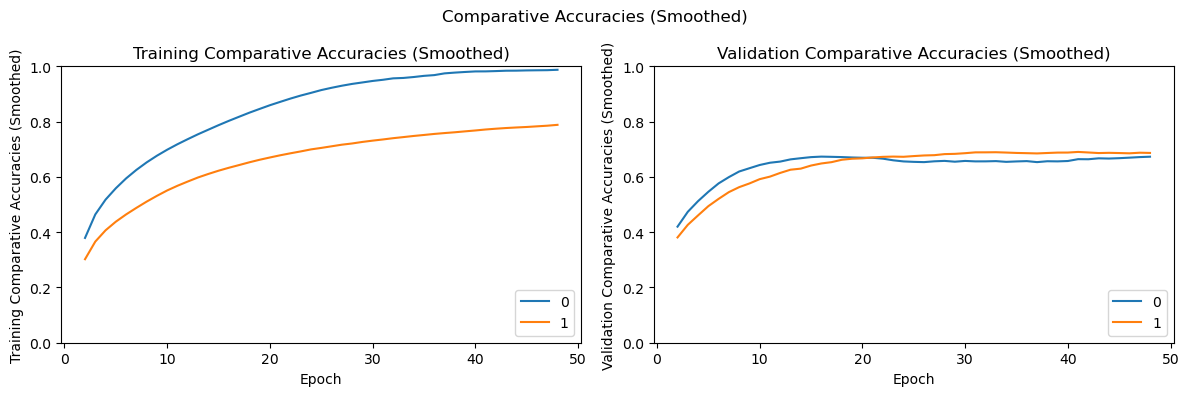

hi


In [2]:

best_dropout_rate = 0.6

num_epochs = 50
learning_rate = 0.05

random_seeds = list(range(1, 6))


path_to_save = f'./run_data/transfer_learning/transfer_learn_original_dat_{num_epochs}_epochs_lr_{learning_rate}.json'
path_to_load = f'./run_data/transfer_learning/transfer_learn_original_dat_{num_epochs}_epochs_lr_{learning_rate}.json'


pre_training_data = path_to_load
plot_all_models_performance_from_disk(pre_training_data, variable_name='Pretrained Model', enforce_axis=True)
plot_performance_comparison_from_file(pre_training_data, enforce_axis=True, variable_name='Pretrained Model')
display_accuracy_heatmap(pre_training_data)

MODEL:  0
seed: 1
Epoch [1/50] - Train Loss: 1.1200, Acc: 0.6039 | Val Loss: 0.9109, Acc: 0.6776
Epoch [2/50] - Train Loss: 0.8350, Acc: 0.7092 | Val Loss: 0.8165, Acc: 0.7112
Epoch [3/50] - Train Loss: 0.7233, Acc: 0.7447 | Val Loss: 0.8107, Acc: 0.7184
Epoch [4/50] - Train Loss: 0.6296, Acc: 0.7803 | Val Loss: 0.8850, Acc: 0.7043
Epoch [5/50] - Train Loss: 0.5481, Acc: 0.8073 | Val Loss: 0.8786, Acc: 0.7087
Epoch [6/50] - Train Loss: 0.4760, Acc: 0.8328 | Val Loss: 0.9598, Acc: 0.6960
Epoch [7/50] - Train Loss: 0.4059, Acc: 0.8573 | Val Loss: 0.9137, Acc: 0.7151
Epoch [8/50] - Train Loss: 0.3494, Acc: 0.8778 | Val Loss: 1.0240, Acc: 0.6991
Epoch [9/50] - Train Loss: 0.2974, Acc: 0.8950 | Val Loss: 1.0398, Acc: 0.7102
Epoch [10/50] - Train Loss: 0.2516, Acc: 0.9108 | Val Loss: 1.4162, Acc: 0.6558
Epoch [11/50] - Train Loss: 0.2087, Acc: 0.9273 | Val Loss: 1.5838, Acc: 0.6504
Epoch [12/50] - Train Loss: 0.1797, Acc: 0.9389 | Val Loss: 1.3978, Acc: 0.6914
Epoch [13/50] - Train Loss: 0.1

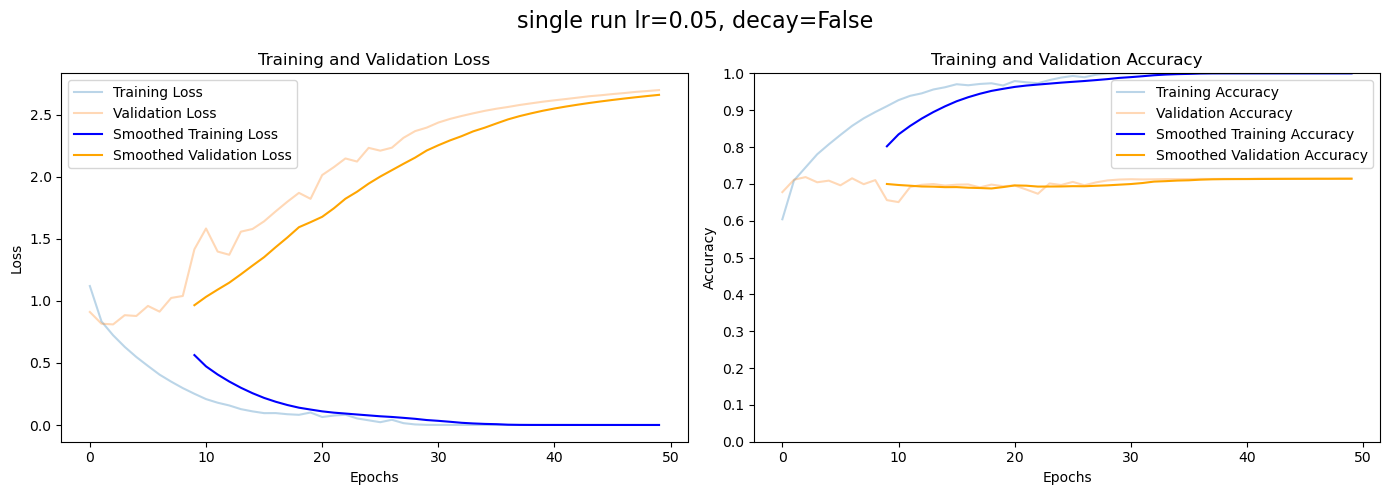

TESTING COMPLETE!!
Test Loss: 3.0811, Test Acc: 0.6979
              precision    recall  f1-score   support

       plane       0.71      0.76      0.74      1000
         car       0.81      0.82      0.82      1000
        bird       0.60      0.58      0.59      1000
         cat       0.50      0.51      0.50      1000
        deer       0.65      0.63      0.64      1000
         dog       0.58      0.58      0.58      1000
        frog       0.77      0.79      0.78      1000
       horse       0.76      0.73      0.74      1000
        ship       0.82      0.81      0.82      1000
       truck       0.79      0.77      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

MODEL:  0
seed: 2
Epoch [1/50] - Train Loss: 1.1210, Acc: 0.6073 | Val Loss: 0.9008, Acc: 0.6881
Epoch [2/50] - Train Loss: 0.8325, Acc: 0.7108 | Val Loss: 0.8138, Acc: 0.7151
Epoch [3/5

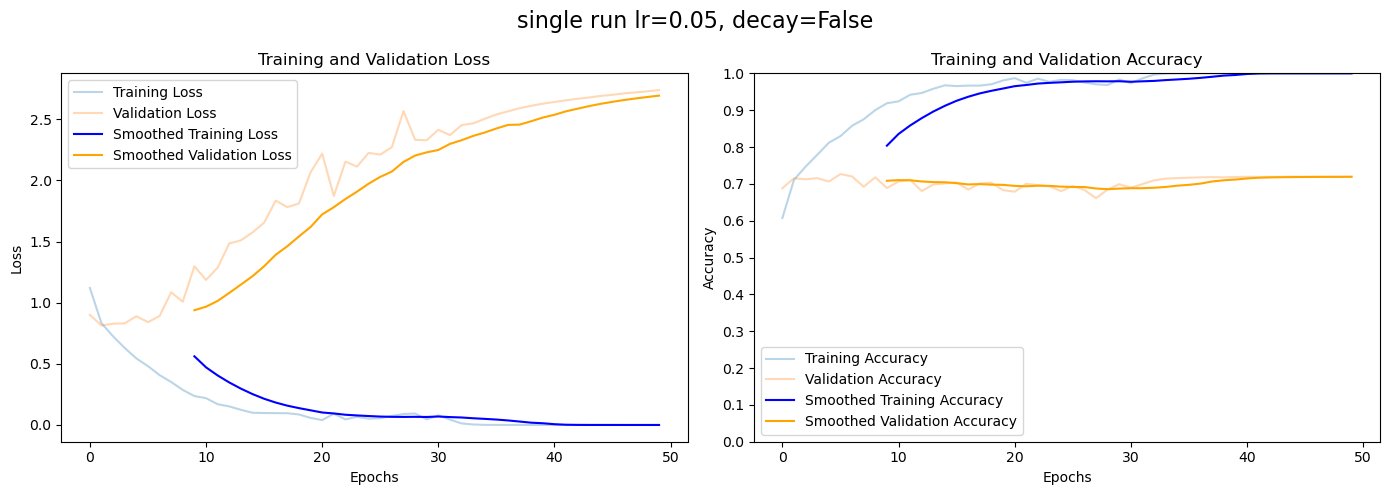

TESTING COMPLETE!!
Test Loss: 3.2401, Test Acc: 0.6914
              precision    recall  f1-score   support

       plane       0.74      0.76      0.75      1000
         car       0.81      0.82      0.82      1000
        bird       0.59      0.56      0.58      1000
         cat       0.48      0.47      0.48      1000
        deer       0.62      0.63      0.63      1000
         dog       0.58      0.59      0.59      1000
        frog       0.74      0.76      0.75      1000
       horse       0.74      0.75      0.75      1000
        ship       0.81      0.81      0.81      1000
       truck       0.78      0.76      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

MODEL:  0
seed: 3
Epoch [1/50] - Train Loss: 1.1215, Acc: 0.6067 | Val Loss: 0.9380, Acc: 0.6707
Epoch [2/50] - Train Loss: 0.8354, Acc: 0.7091 | Val Loss: 0.8353, Acc: 0.7067
Epoch [3/5

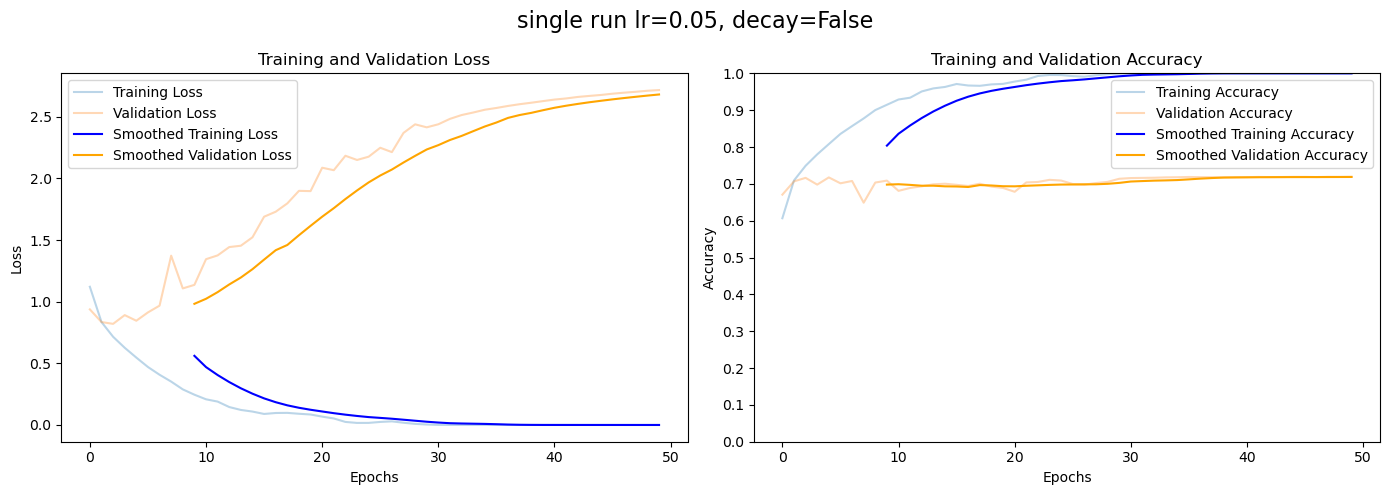

TESTING COMPLETE!!
Test Loss: 3.1193, Test Acc: 0.6990
              precision    recall  f1-score   support

       plane       0.74      0.76      0.75      1000
         car       0.81      0.83      0.82      1000
        bird       0.61      0.58      0.60      1000
         cat       0.49      0.50      0.50      1000
        deer       0.64      0.64      0.64      1000
         dog       0.57      0.60      0.58      1000
        frog       0.77      0.77      0.77      1000
       horse       0.75      0.73      0.74      1000
        ship       0.81      0.82      0.81      1000
       truck       0.80      0.76      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

MODEL:  0
seed: 4
Epoch [1/50] - Train Loss: 1.1243, Acc: 0.6033 | Val Loss: 0.9749, Acc: 0.6537
Epoch [2/50] - Train Loss: 0.8373, Acc: 0.7107 | Val Loss: 0.8058, Acc: 0.7183
Epoch [3/5

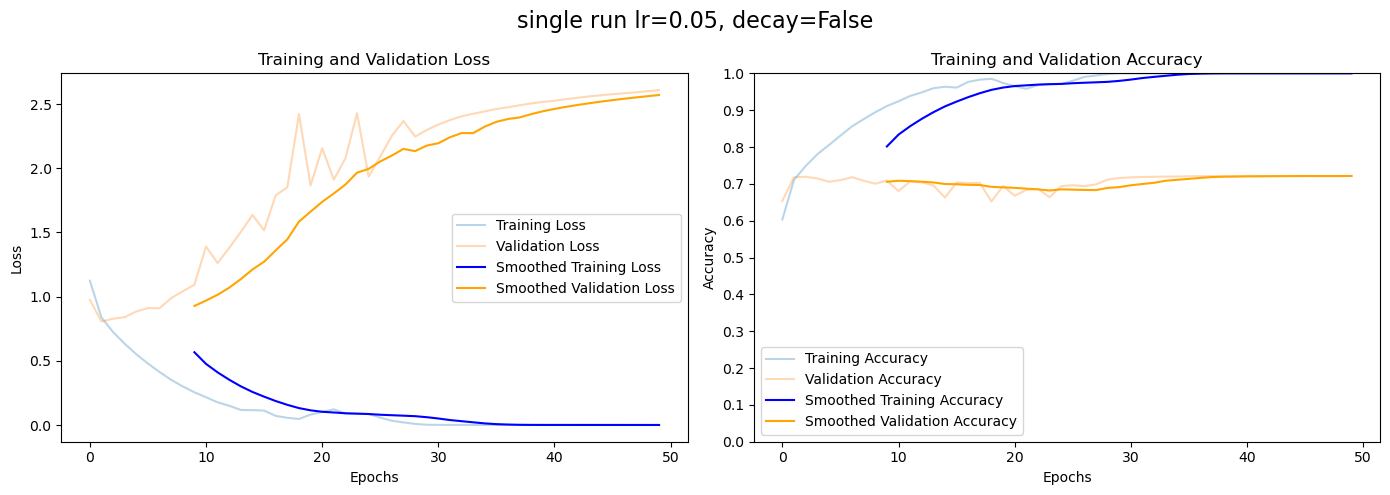

TESTING COMPLETE!!
Test Loss: 3.0699, Test Acc: 0.6945
              precision    recall  f1-score   support

       plane       0.72      0.73      0.73      1000
         car       0.83      0.82      0.82      1000
        bird       0.61      0.56      0.58      1000
         cat       0.51      0.50      0.51      1000
        deer       0.64      0.65      0.64      1000
         dog       0.59      0.59      0.59      1000
        frog       0.74      0.78      0.76      1000
       horse       0.73      0.73      0.73      1000
        ship       0.81      0.82      0.82      1000
       truck       0.77      0.77      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

MODEL:  0
seed: 5
Epoch [1/50] - Train Loss: 1.1138, Acc: 0.6117 | Val Loss: 0.9215, Acc: 0.6693
Epoch [2/50] - Train Loss: 0.8299, Acc: 0.7091 | Val Loss: 0.8195, Acc: 0.7144
Epoch [3/5

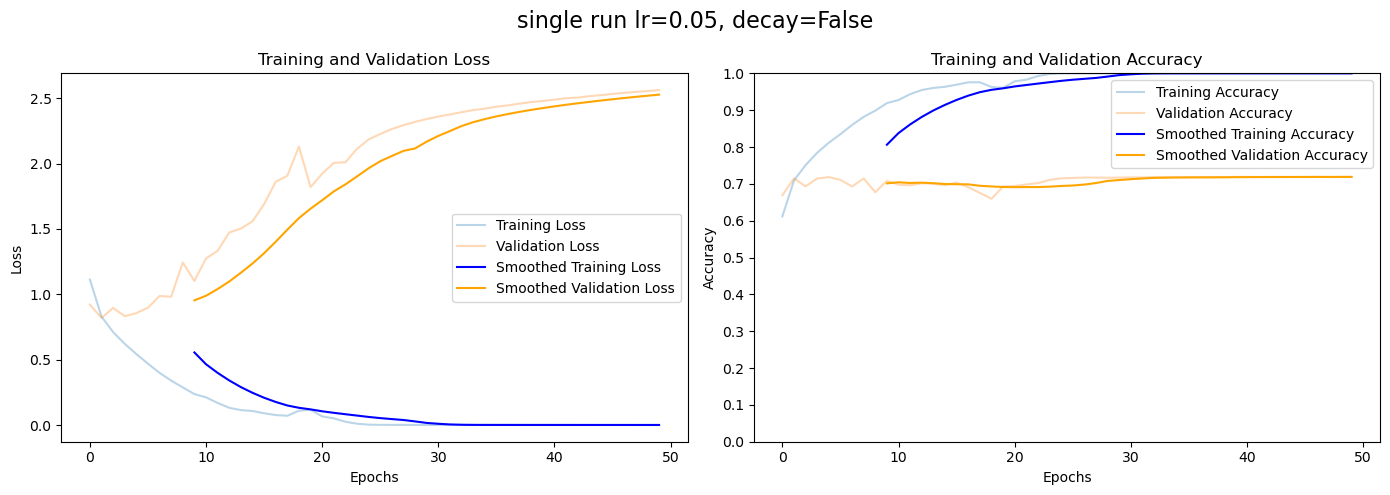

TESTING COMPLETE!!
Test Loss: 3.0294, Test Acc: 0.6980
              precision    recall  f1-score   support

       plane       0.75      0.77      0.76      1000
         car       0.82      0.82      0.82      1000
        bird       0.59      0.57      0.58      1000
         cat       0.50      0.49      0.49      1000
        deer       0.66      0.64      0.65      1000
         dog       0.57      0.57      0.57      1000
        frog       0.76      0.80      0.78      1000
       horse       0.74      0.74      0.74      1000
        ship       0.79      0.82      0.81      1000
       truck       0.78      0.77      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

average for 
Model:  0


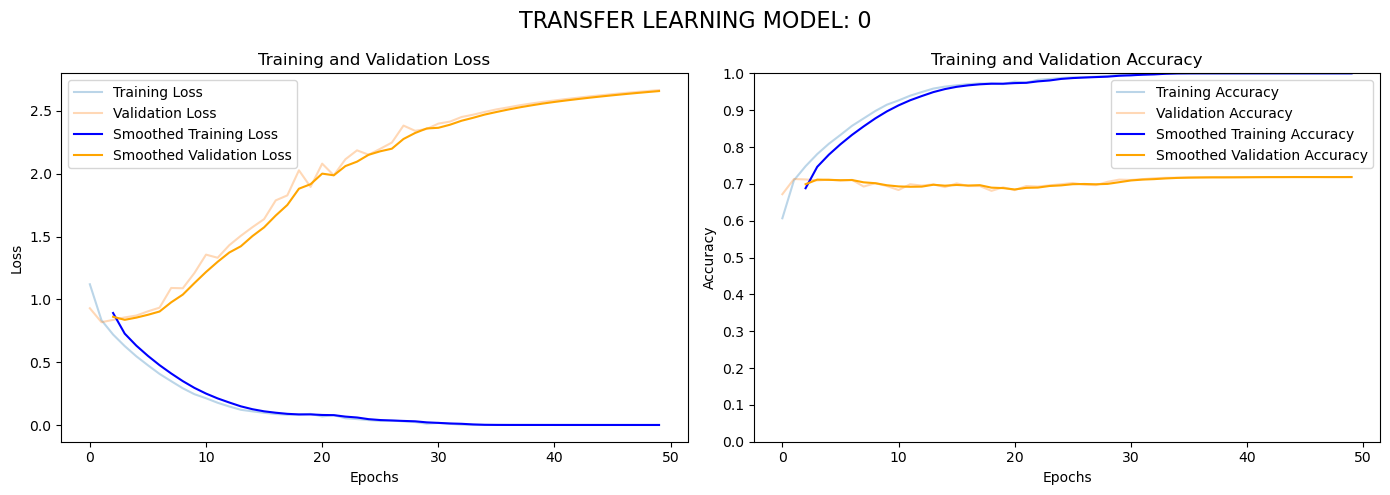

MODEL:  1
seed: 1
Epoch [1/50] - Train Loss: 1.3514, Acc: 0.5240 | Val Loss: 0.8681, Acc: 0.7127
Epoch [2/50] - Train Loss: 1.0735, Acc: 0.6305 | Val Loss: 0.7861, Acc: 0.7416
Epoch [3/50] - Train Loss: 0.9878, Acc: 0.6609 | Val Loss: 0.7526, Acc: 0.7390
Epoch [4/50] - Train Loss: 0.9350, Acc: 0.6775 | Val Loss: 0.7743, Acc: 0.7237
Epoch [5/50] - Train Loss: 0.8901, Acc: 0.6887 | Val Loss: 0.7200, Acc: 0.7544
Epoch [6/50] - Train Loss: 0.8514, Acc: 0.7044 | Val Loss: 0.6931, Acc: 0.7568
Epoch [7/50] - Train Loss: 0.8150, Acc: 0.7187 | Val Loss: 0.7434, Acc: 0.7359
Epoch [8/50] - Train Loss: 0.7881, Acc: 0.7255 | Val Loss: 0.7137, Acc: 0.7489
Epoch [9/50] - Train Loss: 0.7633, Acc: 0.7312 | Val Loss: 0.7383, Acc: 0.7412
Epoch [10/50] - Train Loss: 0.7332, Acc: 0.7427 | Val Loss: 0.7159, Acc: 0.7481
Epoch [11/50] - Train Loss: 0.7204, Acc: 0.7443 | Val Loss: 0.7304, Acc: 0.7449
Epoch [12/50] - Train Loss: 0.7113, Acc: 0.7482 | Val Loss: 0.7168, Acc: 0.7495
Epoch [13/50] - Train Loss: 0.6

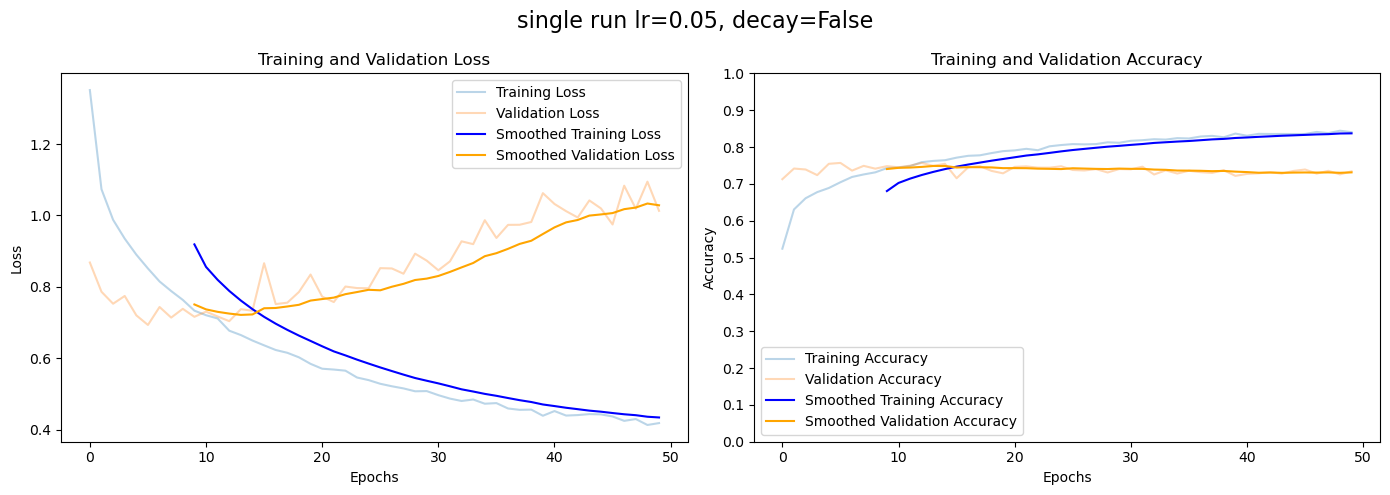

TESTING COMPLETE!!
Test Loss: 1.1727, Test Acc: 0.7137
              precision    recall  f1-score   support

       plane       0.74      0.78      0.76      1000
         car       0.84      0.85      0.84      1000
        bird       0.64      0.57      0.60      1000
         cat       0.52      0.54      0.53      1000
        deer       0.66      0.63      0.65      1000
         dog       0.58      0.64      0.61      1000
        frog       0.76      0.80      0.78      1000
       horse       0.79      0.71      0.75      1000
        ship       0.84      0.81      0.82      1000
       truck       0.80      0.80      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000

MODEL:  1
seed: 2
Epoch [1/50] - Train Loss: 1.3668, Acc: 0.5186 | Val Loss: 0.8973, Acc: 0.6981
Epoch [2/50] - Train Loss: 1.0722, Acc: 0.6325 | Val Loss: 0.8079, Acc: 0.7143
Epoch [3/5

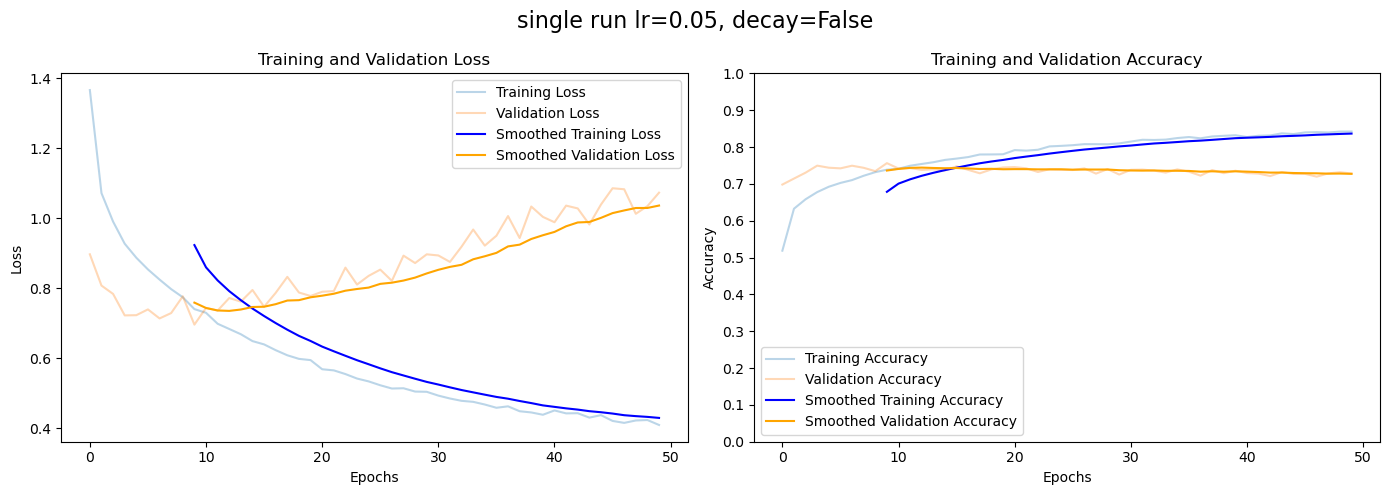

TESTING COMPLETE!!
Test Loss: 1.2495, Test Acc: 0.7085
              precision    recall  f1-score   support

       plane       0.74      0.76      0.75      1000
         car       0.85      0.84      0.85      1000
        bird       0.67      0.55      0.60      1000
         cat       0.48      0.56      0.52      1000
        deer       0.64      0.66      0.65      1000
         dog       0.60      0.59      0.60      1000
        frog       0.86      0.67      0.76      1000
       horse       0.73      0.76      0.74      1000
        ship       0.77      0.87      0.82      1000
       truck       0.79      0.81      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

MODEL:  1
seed: 3
Epoch [1/50] - Train Loss: 1.3591, Acc: 0.5202 | Val Loss: 0.8739, Acc: 0.7050
Epoch [2/50] - Train Loss: 1.0833, Acc: 0.6265 | Val Loss: 0.7941, Acc: 0.7278
Epoch [3/5

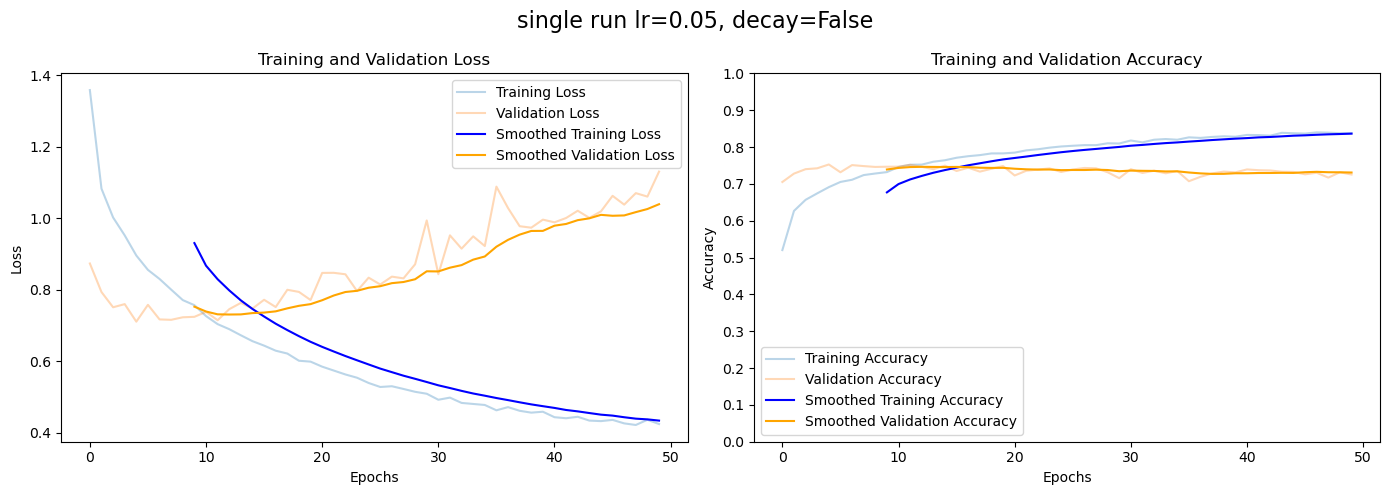

TESTING COMPLETE!!
Test Loss: 1.2877, Test Acc: 0.7034
              precision    recall  f1-score   support

       plane       0.75      0.76      0.75      1000
         car       0.86      0.81      0.83      1000
        bird       0.64      0.54      0.59      1000
         cat       0.50      0.55      0.52      1000
        deer       0.62      0.67      0.64      1000
         dog       0.66      0.53      0.59      1000
        frog       0.84      0.69      0.76      1000
       horse       0.66      0.83      0.73      1000
        ship       0.79      0.84      0.82      1000
       truck       0.75      0.82      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

MODEL:  1
seed: 4
Epoch [1/50] - Train Loss: 1.3364, Acc: 0.5248 | Val Loss: 0.9344, Acc: 0.6725
Epoch [2/50] - Train Loss: 1.0761, Acc: 0.6251 | Val Loss: 0.8064, Acc: 0.7227
Epoch [3/5

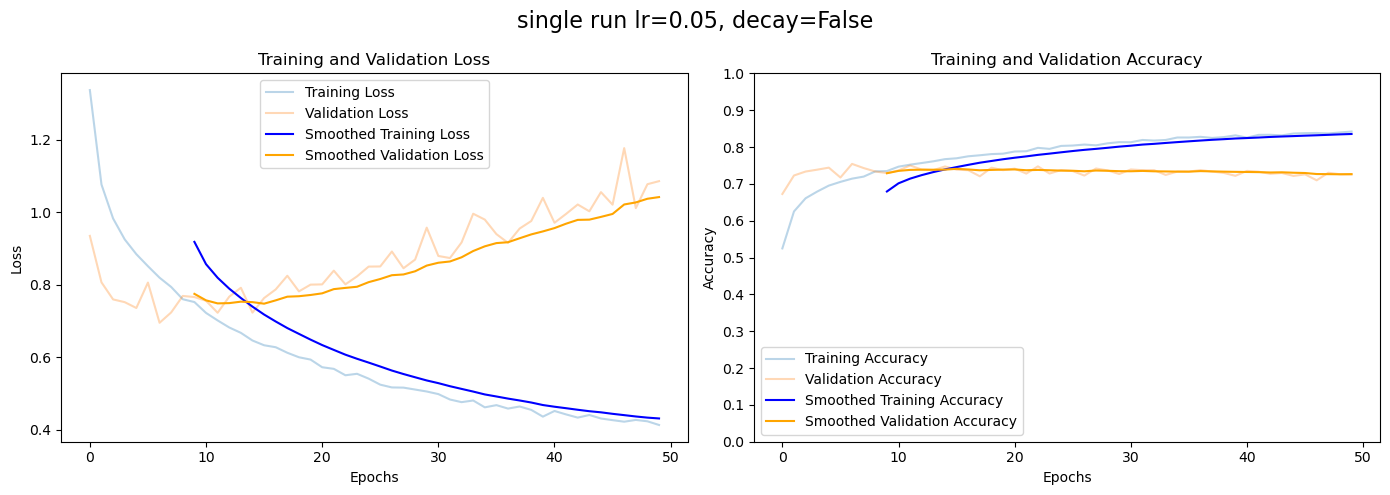

TESTING COMPLETE!!
Test Loss: 1.2231, Test Acc: 0.7110
              precision    recall  f1-score   support

       plane       0.77      0.72      0.74      1000
         car       0.85      0.83      0.84      1000
        bird       0.53      0.66      0.58      1000
         cat       0.55      0.43      0.49      1000
        deer       0.63      0.69      0.66      1000
         dog       0.62      0.65      0.63      1000
        frog       0.76      0.79      0.78      1000
       horse       0.79      0.74      0.76      1000
        ship       0.82      0.83      0.83      1000
       truck       0.84      0.76      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000

MODEL:  1
seed: 5
Epoch [1/50] - Train Loss: 1.3451, Acc: 0.5257 | Val Loss: 0.9061, Acc: 0.6826
Epoch [2/50] - Train Loss: 1.0545, Acc: 0.6341 | Val Loss: 0.7817, Acc: 0.7333
Epoch [3/5

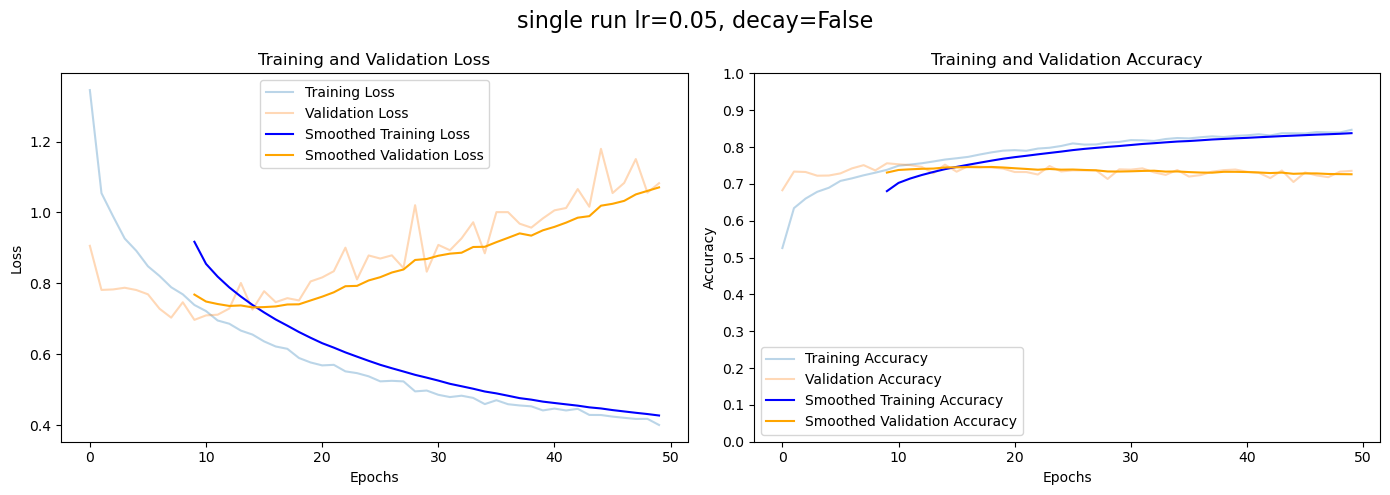

TESTING COMPLETE!!
Test Loss: 1.2536, Test Acc: 0.7105
              precision    recall  f1-score   support

       plane       0.72      0.79      0.75      1000
         car       0.84      0.88      0.86      1000
        bird       0.59      0.60      0.59      1000
         cat       0.50      0.52      0.51      1000
        deer       0.67      0.63      0.65      1000
         dog       0.60      0.63      0.62      1000
        frog       0.77      0.78      0.77      1000
       horse       0.78      0.71      0.74      1000
        ship       0.80      0.84      0.82      1000
       truck       0.88      0.73      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

average for 
Model:  1


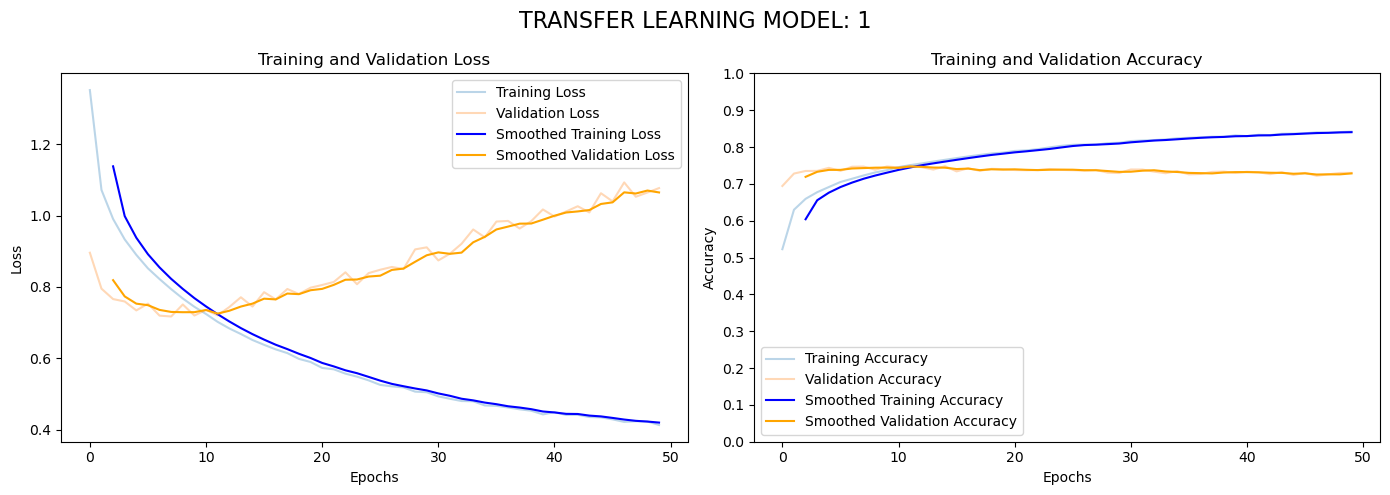

In [13]:
# do transfer learning

num_epochs = 50
learning_rate = 0.05
random_seeds = list(range(1,6))

path_to_save = f'./run_data/transfer_learning/transfer_learning_data_{num_epochs}_epochs_lr_{learning_rate}.json'
path_to_load = f'./run_data/transfer_learning/transfer_learning_data_{num_epochs}_epochs_lr_{learning_rate}.json'

models = [0, 1]
averaged_results = {i:{} for i in models}

save_experiment = True

# train them both on the swapped train and val data - test data same
for i, model in enumerate(models):
    epoch_train_losses_by_run = []
    epoch_val_losses_by_run = []
    epoch_train_accuracies_by_run = []
    epoch_val_accuracies_by_run = []
    test_losses = []
    test_accuracies = []
    reports = []
    
    for random_seed in random_seeds:
        print('MODEL: ', i) 
        print('seed:', random_seed)
        torch.manual_seed(random_seed)
        if i == 0:
            pretrained_model_non_dropout = torch.load('./models/trained_model_0.pth')
            pretrained_model_non_dropout.fc1 =  nn.Linear(in_features=64 * 4 * 4, out_features=64)
            pretrained_model_non_dropout.fc2 = nn.Linear(in_features=64, out_features=10)
            model = pretrained_model_non_dropout
        elif i == 1:
            pretrained_model_best_dropout = torch.load('./models/trained_model_1.pth')
            pretrained_model_best_dropout.fc1 =  nn.Linear(in_features=64 * 4 * 4, out_features=64)
            pretrained_model_best_dropout.fc2 = nn.Linear(in_features=64, out_features=10)
            model = pretrained_model_best_dropout
        model.to(device)
        criterion = nn.CrossEntropyLoss()
        optimiser = optim.SGD(model.parameters(), lr=learning_rate)
        model, train_epoch_losses, train_epoch_accuracy, val_epoch_losses, val_epoch_accuracy, _,_ = run_training_and_validation(model, device, learning_rate, num_epochs, criterion, optimiser, swapped_train_dataloader, swapped_val_dataloader, metrics = False, manual_lr_schedule=False, plot=True)
        epoch_train_losses_by_run.append(train_epoch_losses)
        epoch_val_losses_by_run.append(val_epoch_losses)
        epoch_train_accuracies_by_run.append(train_epoch_accuracy)
        epoch_val_accuracies_by_run.append(val_epoch_accuracy)
        
        test_loss, test_accuracy, report = run_testing(model, device, criterion, test_dataloader)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)
        reports.append(report)
        
    average_train_losses = [sum(epoch_losses) / len(epoch_losses) for epoch_losses in zip(*epoch_train_losses_by_run)]
    average_val_losses = [sum(epoch_losses) / len(epoch_losses) for epoch_losses in zip(*epoch_val_losses_by_run)]
    average_train_accuracies = [sum(epoch_accuracies) / len(epoch_accuracies) for epoch_accuracies in zip(*epoch_train_accuracies_by_run)]
    average_val_accuracies =  [sum(epoch_accuracies) / len(epoch_accuracies) for epoch_accuracies in zip(*epoch_val_accuracies_by_run)]
    average_test_loss = sum(test_losses)/len(test_losses)
    average_test_accuracy = sum(test_accuracies)/len(test_accuracies)
    
    averaged_results[i] = {'seeds':random_seeds,'av_train_losses': average_train_losses,
                                       'av_val_losses': average_val_losses,
                                       'av_train_acc': average_train_accuracies,
                                       'av_val_acc': average_val_accuracies,
                                       'all_train_losses':epoch_train_losses_by_run,
                                       'all_val_losses': epoch_val_losses_by_run,
                                       'all_train_accuracies': epoch_train_accuracies_by_run,
                                       'all_val_accuracies': epoch_val_accuracies_by_run,
                                       'all_test_losses':test_losses, 
                                       'all_test_accuracies':test_accuracies,
                                       'av_test_loss': average_test_loss,
                                       'av_test_accuracy':average_test_accuracy}
    print('average for ')
    print('Model: ', i) 
    plot_single_train_val_smoothed(average_train_losses,average_val_losses,average_train_accuracies,average_val_accuracies, num_epochs, smoothing_window=3, title=f'TRANSFER LEARNING MODEL: {i}')
    


if save_experiment:
    with open(path_to_save, 'w') as file:
        json.dump(averaged_results, file, indent=4)  # 'indent' makes the output formatted and easier to read

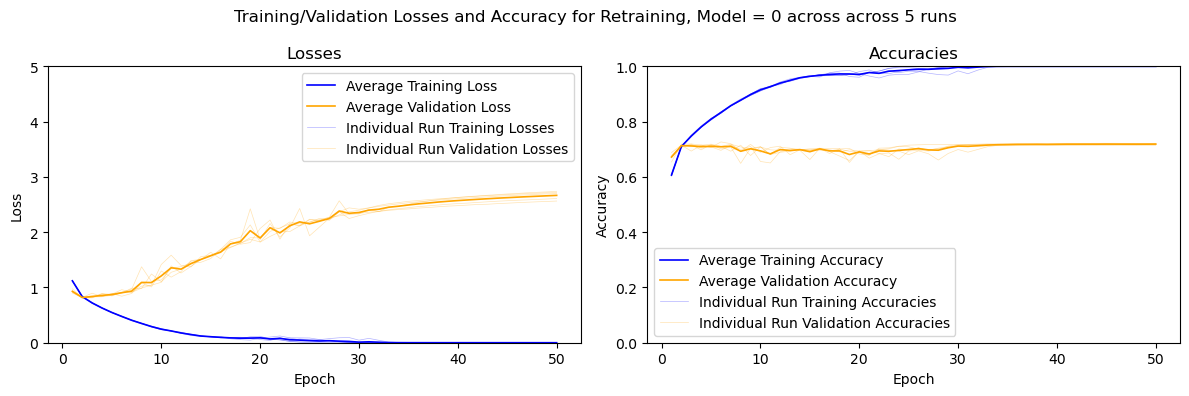

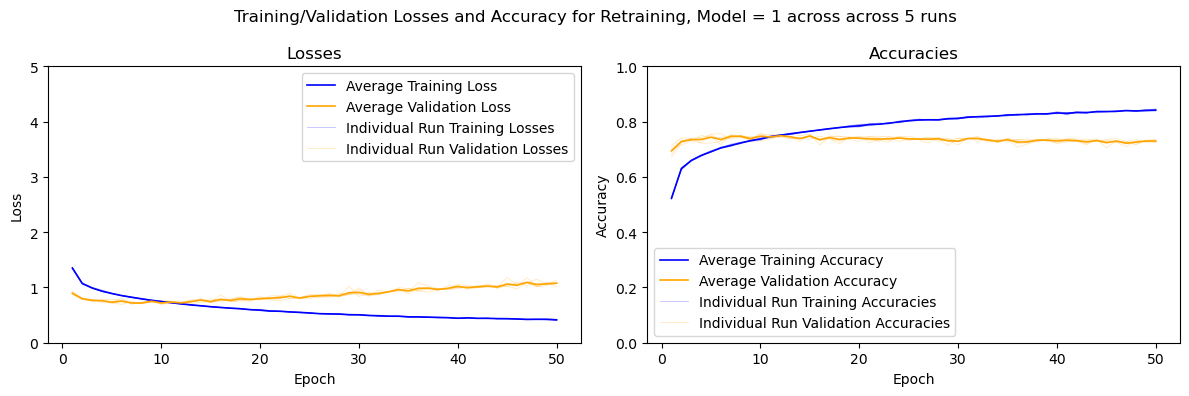

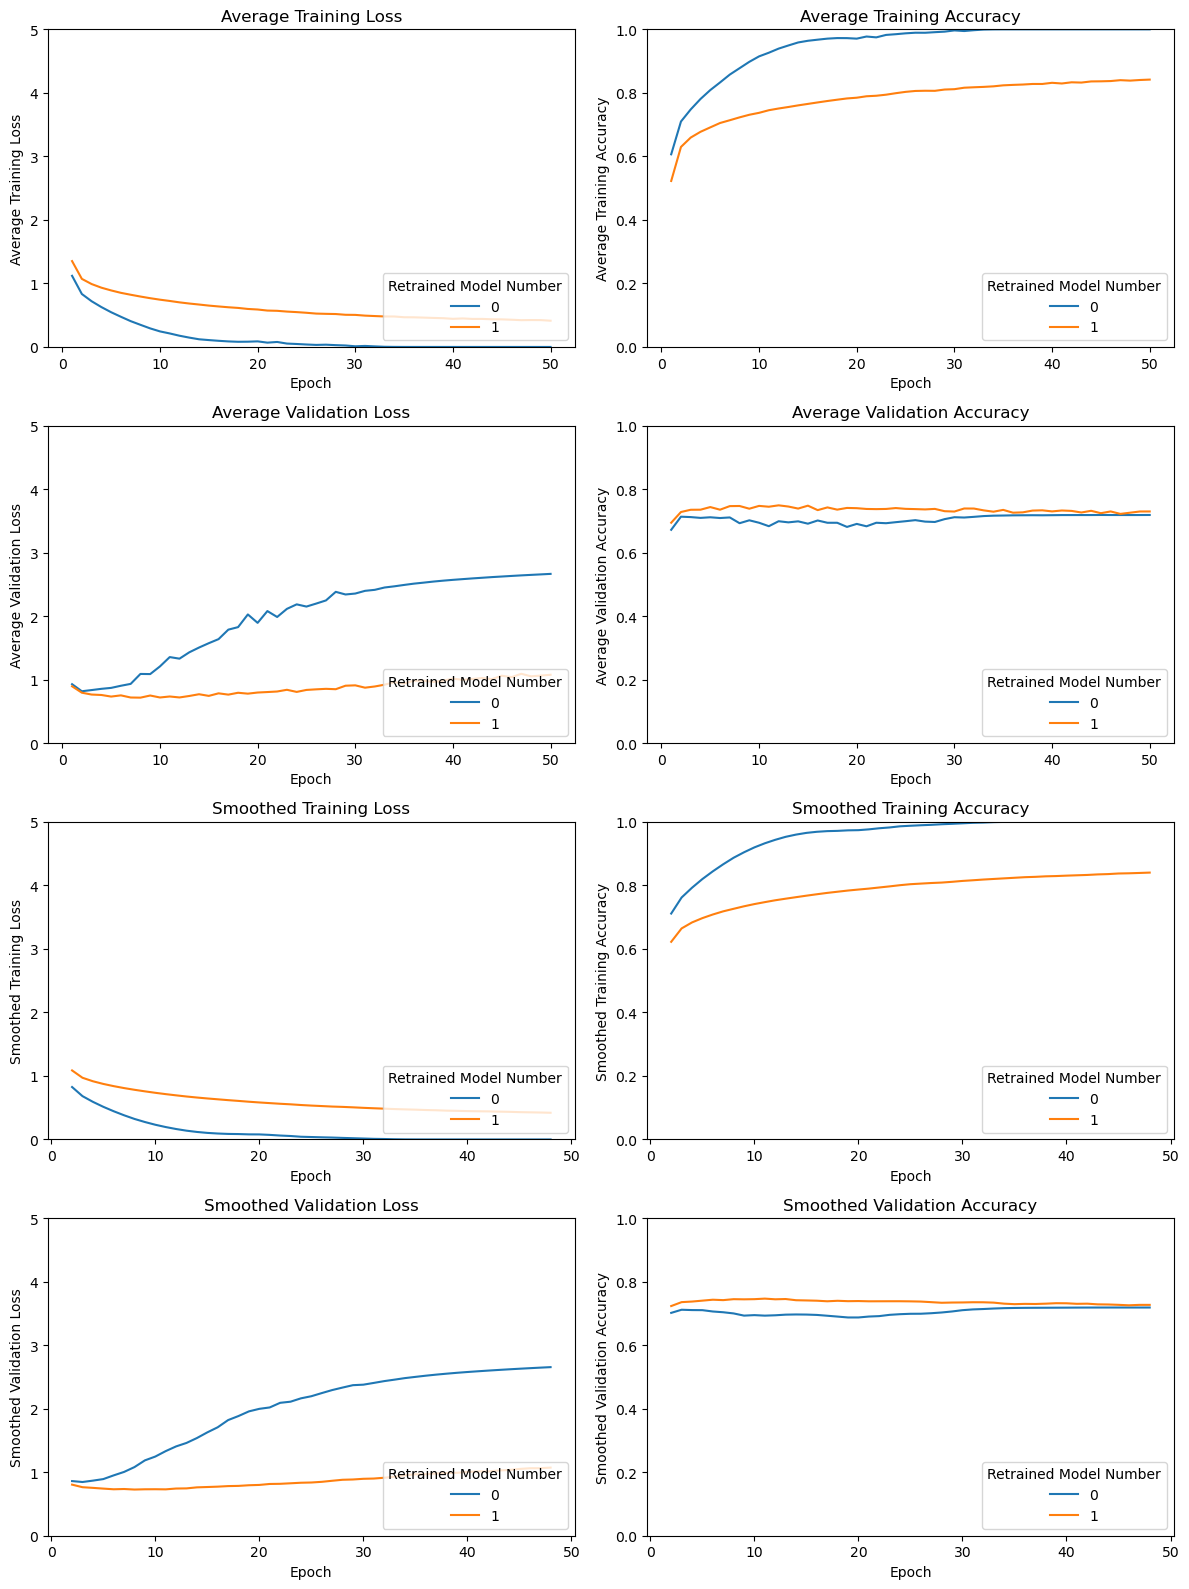

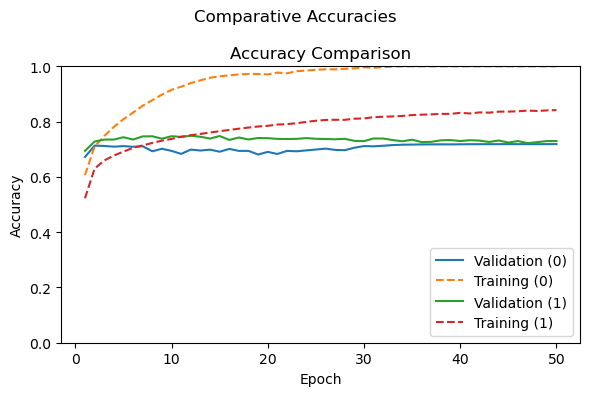

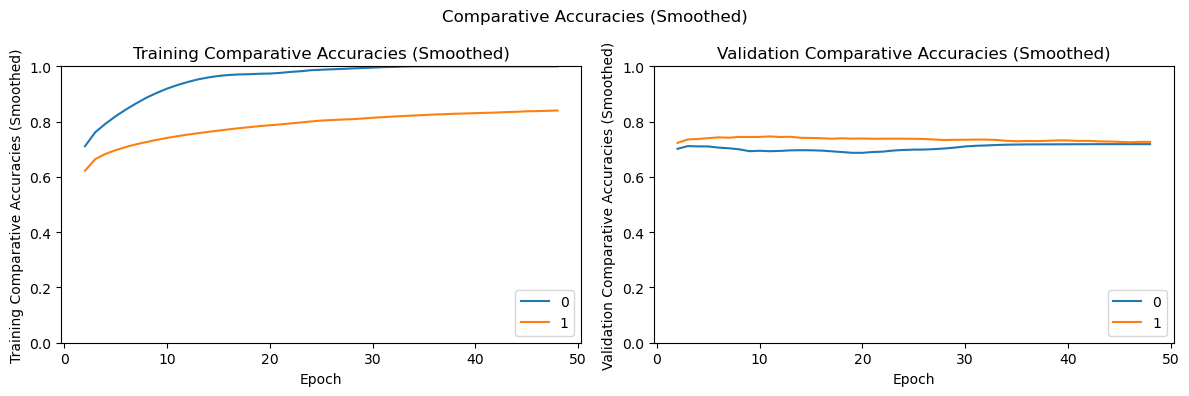

hi


In [5]:
num_epochs = 50
learning_rate = 0.05
random_seeds = list(range(1,6))

path_to_save = f'./run_data/transfer_learning/transfer_learning_data_{num_epochs}_epochs_lr_{learning_rate}.json'
path_to_load = f'./run_data/transfer_learning/transfer_learning_data_{num_epochs}_epochs_lr_{learning_rate}.json'


transfer_learned_data = path_to_load
plot_all_models_performance_from_disk(transfer_learned_data, enforce_axis=True, variable_name='Retraining, Model')
plot_performance_comparison_from_file(transfer_learned_data, enforce_axis=True, variable_name='Retrained Model Number')
display_accuracy_heatmap(transfer_learned_data)